# Miami Grand Prix
The Miami Grand Prix is a Formula One Grand Prix which was held for the first time during the 2022 season, with the event taking place at the Miami International Autodrome on a ten-year contract. 

In [456]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## A little recap about what happened last year
Before to know what will happen in the grand prix, I consider that is neccesary to get to know what happened last year in order to have a reference to know what will happen this year in Miami.
In this case, I decided to take qualyfing and race as a reference to try to predict with the data obtained in the free practice how the weekend will unfold.

In [457]:
response = urlopen("https://api.openf1.org/v1/sessions?year=2023&country_code=USA&circuit_short_name=Miami")
data = json.loads(response.read().decode('utf-8'))
calendar = pd.DataFrame(data)
calendar

location  country_key country_code   country_name  circuit_key  \
0    Miami           19          USA  United States          151   
1    Miami           19          USA  United States          151   
2    Miami           19          USA  United States          151   
3    Miami           19          USA  United States          151   
4    Miami           19          USA  United States          151   

  circuit_short_name session_type session_name                 date_start  \
0              Miami     Practice   Practice 1  2023-05-05T18:00:00+00:00   
1              Miami     Practice   Practice 2  2023-05-05T21:30:00+00:00   
2              Miami     Practice   Practice 3  2023-05-06T16:30:00+00:00   
3              Miami   Qualifying   Qualifying  2023-05-06T20:00:00+00:00   
4              Miami         Race         Race  2023-05-07T19:30:00+00:00   

                    date_end gmt_offset  session_key  meeting_key  year  
0  2023-05-05T19:00:00+00:00  -04:00:00         9071         1208  2023  
1  2023-05-05T22:30:00+00:00  -04:00:00         9072         1208  2023  
2  2023-05-06T17:30:00+00:00  -04:00:00         9073         1208  2023  
3  2023-05-06T21:00:00+00:00  -04:00:00         9074         1208  2023  
4  2023-05-07T21:30:00+00:00  -04:00:00         9078         1208  2023

In [458]:
country_key='country_key=19'
country_code="country_code='USA'"
circuit_key='circuit_key=151'
year = 'year=2024'

### Qualyfing
In qualyfing,I will obtain the data related at the fastest driver on track to take as a reference his time and also his car data(RPM,speed,etc). With these data, it can see which gear will be used or at which speed a turn is taken.

In [459]:
session_key='session_key=9074'
url = 'https://api.openf1.org/v1/laps?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
qualyfing = pd.DataFrame(data)
qualyfing.query("is_pit_out_lap== False")

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
16          1208         9074             23       216     184.0     338.0   
17          1208         9074              2       167     153.0     292.0   
18          1208         9074             24       219     189.0     332.0   
19          1208         9074             77       222     191.0     332.0   
20          1208         9074             22       219     188.0     333.0   
..           ...          ...            ...       ...       ...       ...   
289         1208         9074             20       194     173.0     285.0   
290         1208         9074             16       199     178.0     302.0   
291         1208         9074             55       177     170.0     253.0   
302         1208         9074             55       156       NaN       NaN   
303         1208         9074             63       181       NaN       NaN   

                           date_start  lap_duration  is_pit_out_lap  \
16   2023-05-06T20:01:50.246000+00:00        90.967           False   
17   2023-05-06T20:02:00.746000+00:00       123.876           False   
18   2023-05-06T20:02:05.042000+00:00        90.162           False   
19   2023-05-06T20:02:09.495000+00:00        89.964           False   
20   2023-05-06T20:02:15.917000+00:00        90.117           False   
..                                ...           ...             ...   
289  2023-05-06T20:52:23.629000+00:00       104.994           False   
290  2023-05-06T20:52:39.067000+00:00       104.964           False   
291  2023-05-06T20:52:44.988000+00:00       113.182           False   
302  2023-05-06T20:57:44.389000+00:00           NaN           False   
303  2023-05-06T20:57:49.249000+00:00           NaN           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
16              31.047             34.427             25.493   
17              48.318             43.388             32.170   
18              30.449             34.235             25.478   
19              30.501             34.138             25.325   
20              30.545             34.221             25.351   
..                 ...                ...                ...   
289             35.208             37.125             32.661   
290             35.819             37.057             32.088   
291             38.317             40.602             34.263   
302             33.154                NaN                NaN   
303             30.689                NaN                NaN   

                                     segments_sector_1  \
16   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
17   [2049, 2049, 2049, 2049, 2048, 2048, 2048, 204...   
18   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
19   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
20   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
289  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
290  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
291  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
302  [2048, 2048, 2049, 2049, 2049, 2049, 2049, 204...   
303  [2049, 2049, 2048, 2048, 2049, 2048, 2048, 204...   

                                     segments_sector_2  \
16   [2049, 2049, 2051, 2049, 2049, 2049, 2049, 204...   
17   [2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...   
18   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
19   [2051, 2049, 2049, 2049, 2049, 2049, 2051, 204...   
20   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
289  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
290  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
291  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
302  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
303  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                              segments_sector_3  lap

In [460]:
qualyfing.query("date_start > '2023-05-06T20:45:23.629000'").loc[qualyfing.query("date_start > '2023-05-06T20:45:23.629000'")['lap_duration'].idxmin()]

meeting_key                                                       1208
session_key                                                       9074
driver_number                                                       11
i1_speed                                                           223
i2_speed                                                         195.0
st_speed                                                         340.0
date_start                            2023-05-06T20:50:13.991000+00:00
lap_duration                                                    86.841
is_pit_out_lap                                                   False
duration_sector_1                                               28.942
duration_sector_2                                               33.049
duration_sector_3                                                24.85
segments_sector_1    [2051, 2049, 2049, 2051, 2051, 2049, 2049, 205...
segments_sector_2    [2051, 2049, 2049, 2051, 2049, 2049, 2051, 205...
segmen

In [461]:
from datetime import datetime, timedelta
startfastestlap = datetime(2023,5,6,20,50,13,99100)
startfastestlap+timedelta(seconds=86.841)

datetime.datetime(2023, 5, 6, 20, 51, 39, 940100)

To obtain a clean analysis, seconds within his fastest lap will be taken to know how develop the car when it is in its maxium performance.

In [462]:
driver_number='&driver_number=11'
url = "https://api.openf1.org/v1/car_data?"

urltotal = url+session_key+driver_number

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
fastestCarOnTrackData = pd.DataFrame(data)
fastestCarOnTrackData= fastestCarOnTrackData.query("date>='2023-05-06T20:50:13.991000' and date <= '2023-05-06T20:51:39.940100'").reset_index()

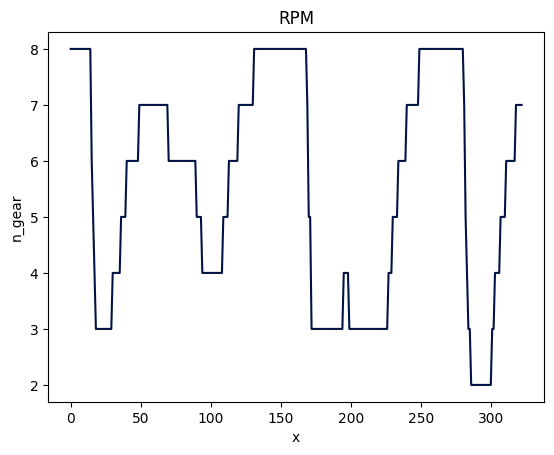

In [463]:
plt.plot(fastestCarOnTrackData.index, fastestCarOnTrackData.n_gear,color="#001344")
plt.title("RPM")
plt.xlabel("x")
plt.ylabel("n_gear")
plt.show()

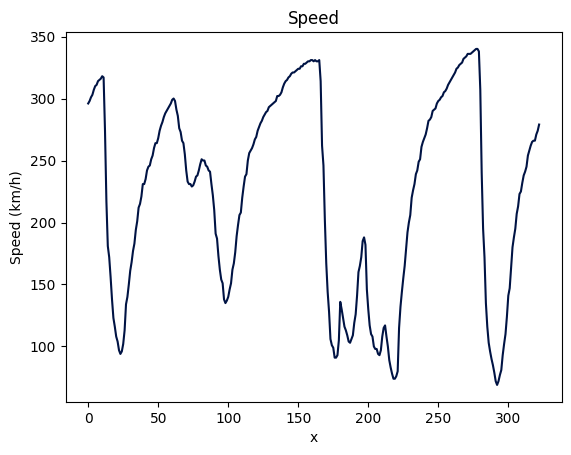

In [464]:
plt.plot(fastestCarOnTrackData.index, fastestCarOnTrackData.speed,color="#001344")
plt.title("Speed")
plt.xlabel("x")
plt.ylabel("Speed (km/h)")
plt.show()

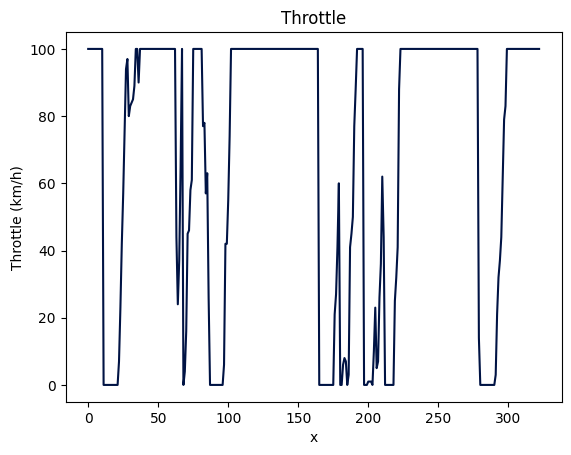

In [465]:
plt.plot(fastestCarOnTrackData.index, fastestCarOnTrackData.throttle,color="#001344")
plt.title("Throttle")
plt.xlabel("x")
plt.ylabel("Throttle (km/h)")
plt.show()


## Race
Some things that it could be interesting to take into account it could be the time spent in the box stops and the race pace in each sector to compare with the data obtained in the race.

In [466]:
session_key='session_key=9078'
url = 'https://api.openf1.org/v1/laps?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
race = pd.DataFrame(data)
race

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0            1208         9078              1     212.0       186       306   
1            1208         9078              2     202.0       183       272   
2            1208         9078              4     202.0       184       266   
3            1208         9078             10     213.0       184       299   
4            1208         9078             11     212.0       186       297   
...           ...          ...            ...       ...       ...       ...   
1133         1208         9078             31     216.0       188       309   
1134         1208         9078             44     214.0       189       317   
1135         1208         9078             55     217.0       191       318   
1136         1208         9078             63     216.0       189       316   
1137         1208         9078             77     216.0       190       319   

                            date_start  lap_duration  is_pit_out_lap  \
0                                 None           NaN           False   
1                                 None           NaN           False   
2                                 None           NaN           False   
3                                 None           NaN           False   
4                                 None           NaN           False   
...                                ...           ...             ...   
1133  2023-05-07T21:00:52.858000+00:00        91.429           False   
1134  2023-05-07T21:00:46.749000+00:00        90.669           False   
1135  2023-05-07T21:00:32.233000+00:00        91.463           False   
1136  2023-05-07T21:00:28.483000+00:00        91.015           False   
1137  2023-05-07T21:01:05.952000+00:00        91.894           False   

      duration_sector_1  duration_sector_2  duration_sector_3  \
0                   NaN             36.216             26.263   
1                   NaN             38.209             26.488   
2                   NaN             38.745                NaN   
3                   NaN             35.744             26.425   
4                   NaN             35.141             26.229   
...                 ...                ...                ...   
1133             30.862             34.838             25.729   
1134             30.349             34.629             25.691   
1135             31.046             34.781             25.636   
1136             30.739             34.683             25.593   
1137             30.911             35.154             25.829   

                                      segments_sector_1  \
0     [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
1     [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
2     [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3     [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4     [2064, 2049, 2051, 2051, 2049, 2051, 2051, 204...   
...                                                 ...   
1133  [None, 2048, 2048, 2048, 2048, 2049, 2048, 204...   
1134  [None, 2049, 2048, 2048, 2048, 2049, 2051, 204...   
1135  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1136  [None, 2048, 2048, 2048, 2048, 2049, 2048, 204...   
1137  [None, 2048, 2048, 2048, 2048, 2049, 2049, 204...   

                                      segments_sector_2  \
0     [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
1     [2049, 2049, 2049, 2051, 2049, 2049, 2049, 204...   
2     [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3     [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4     [2049, 2049, 2049, 2049, 2049, 2051, 2051, 205...   
...                                                 ...   
1133  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1134  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1135  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1136  [2049, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1137  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204.

In [467]:
# Name of the drivers
url = 'https://api.openf1.org/v1/drivers?'
# In this case, due to Open URL does not refresh well the feature drivers, I will catch Practice 1 drivers as a reference.
#session_key = 'session_key=9472'
urltotal = url+session_key

response = urlopen(urltotal)
drivers = json.loads(response.read().decode('utf-8'))
drivers = pd.DataFrame(drivers)
# Restore the session key
#session_key='session_key=9481'
drivers

driver_number broadcast_name        full_name name_acronym  \
0               1   M VERSTAPPEN   Max VERSTAPPEN          VER   
1               2     L SARGEANT   Logan SARGEANT          SAR   
2               4       L NORRIS     Lando NORRIS          NOR   
3              10        P GASLY     Pierre GASLY          GAS   
4              11        S PEREZ     Sergio PEREZ          PER   
5              14       F ALONSO  Fernando ALONSO          ALO   
6              16      C LECLERC  Charles LECLERC          LEC   
7              18       L STROLL     Lance STROLL          STR   
8              20    K MAGNUSSEN  Kevin MAGNUSSEN          MAG   
9              21     N DE VRIES    Nyck DE VRIES          DEV   
10             22      Y TSUNODA     Yuki TSUNODA          TSU   
11             23        A ALBON  Alexander ALBON          ALB   
12             24         G ZHOU      ZHOU Guanyu          ZHO   
13             27   N HULKENBERG  Nico HULKENBERG          HUL   
14             31         E OCON     Esteban OCON          OCO   
15             44     L HAMILTON   Lewis HAMILTON          HAM   
16             55        C SAINZ     Carlos SAINZ          SAI   
17             63      G RUSSELL   George RUSSELL          RUS   
18             77       V BOTTAS  Valtteri BOTTAS          BOT   
19             81      O PIASTRI    Oscar PIASTRI          PIA   

          team_name team_colour first_name   last_name  \
0   Red Bull Racing      3671C6        Max  Verstappen   
1          Williams      37BEDD      Logan    Sargeant   
2           McLaren      F58020      Lando      Norris   
3            Alpine      2293D1     Pierre       Gasly   
4   Red Bull Racing      3671C6     Sergio       Perez   
5      Aston Martin      358C75   Fernando      Alonso   
6           Ferrari      F91536    Charles     Leclerc   
7      Aston Martin      358C75      Lance      Stroll   
8      Haas F1 Team      B6BABD      Kevin   Magnussen   
9        AlphaTauri      5E8FAA       Nyck    De Vries   
10       AlphaTauri      5E8FAA       Yuki     Tsunoda   
11         Williams      37BEDD  Alexander       Albon   
12       Alfa Romeo      C92D4B     Guanyu        Zhou   
13     Haas F1 Team      B6BABD       Nico  Hulkenberg   
14           Alpine      2293D1    Esteban        Ocon   
15         Mercedes      6CD3BF      Lewis    Hamilton   
16          Ferrari      F91536     Carlos       Sainz   
17         Mercedes      6CD3BF     George     Russell   
18       Alfa Romeo      C92D4B   Valtteri      Bottas   
19          McLaren      F58020      Oscar     Piastri   

                                         headshot_url country_code  \
0   https://www.formula1.com/content/dam/fom-websi...          NED   
1   https://www.formula1.com/content/dam/fom-websi...          USA   
2   https://www.formula1.com/content/dam/fom-websi...          GBR   
3   https://www.formula1.com/content/dam/fom-websi...          FRA   
4   https://www.formula1.com/content/dam/fom-websi...          MEX   
5   https://www.formula1.com/content/dam/fom-websi...          ESP   
6   https://www.formula1.com/content/dam/fom-websi...          MON   
7   https://www.formula1.com/content/dam/fom-websi...          CAN   
8   https://www.formula1.com/content/dam/fom-websi...          DEN   
9   https://www.formula1.com/content/dam/fom-websi...          NED   
10  https://www.formula1.com/content/dam/fom-websi...          JPN   
11  https://www.formula1.com/content/dam/fom-websi...          THA   
12  https://www.formula1.com/content/dam/fom-websi...          CHN   
13  https://www.formula1.com/content/dam/fom-websi...          GER   
14  https://www.formula1.com/content/dam/fom-websi...          FRA   
15  https://www.formula1.com/content/dam/fom-websi...          GBR   
16  https://www.formula1.com/content/dam/fom-websi...          ESP   
17  https://www.formula1.com/content/dam/fom-websi...          GBR   
18  https://www.formula1.com/content/dam/fom-websi...          FIN  

### Pits

In [468]:
session_key='session_key=9078'
url = 'https://api.openf1.org/v1/pit?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
pits = pd.DataFrame(data)
pits

Empty DataFrame
Columns: []
Index: []

### Stints

In [469]:
url = 'https://api.openf1.org/v1/stints?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
stintInformation = pd.DataFrame(data)
stintInformation

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1208         9078             1              2          1        2   
1          1208         9078             1              4          1        4   
2          1208         9078             1             81          1        5   
3          1208         9078             1             20          1       14   
4          1208         9078             1             10          1       15   
5          1208         9078             1             21          1       15   
6          1208         9078             1             77          1       15   
7          1208         9078             1             16          1       17   
8          1208         9078             1             63          1       17   
9          1208         9078             1             55          1       18   
10         1208         9078             1             11          1       20   
11         1208         9078             1             23          1       22   
12         1208         9078             1             14          1       24   
13         1208         9078             1             24          1       31   
14         1208         9078             1             27          1       33   
15         1208         9078             1             22          1       36   
16         1208         9078             1             44          1       37   
17         1208         9078             1             31          1       39   
18         1208         9078             1             18          1       42   
19         1208         9078             1              1          1       45   
20         1208         9078             2              2          3       56   
21         1208         9078             2              4          5       57   
22         1208         9078             2             81          6       56   
23         1208         9078             2             20         15       57   
24         1208         9078             2             10         16       57   
25         1208         9078             2             21         16       57   
26         1208         9078             2             77         16       57   
27         1208         9078             2             16         18       57   
28         1208         9078             2             63         18       57   
29         1208         9078             2             55         19       57   
30         1208         9078             2             11         21       57   
31         1208         9078             2             23         23       57   
32         1208         9078             2             14         25       57   
33         1208         9078             2             24         32       57   
34         1208         9078             2             27         34       57   
35         1208         9078             2             22         37       57   
36         1208         9078             2             44         38       57   
37         1208         9078             2             31         40       57   
38         1208         9078             2             18         43       57   
39         1208         9078             2              1         46       57   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
1      SOFT                  0  
2      SOFT                  0  
3    MEDIUM                  0  
4    MEDIUM                  0  
5    MEDIUM                  0  
6    MEDIUM                  0  
7    MEDIUM                  0  
8    MEDIUM                  0  
9    MEDIUM                  0  
10   MEDIUM                  0  
11   MEDIUM                  0  
12   MEDIUM                  1  
13     HARD                  0  
14     HARD                  0  
15     HARD                  0  
16     HARD                  0  
17     HARD                  0  
18     HARD                  1  
19     HARD           

In [470]:
def stint_configuration(stintInformation):
    stintsDataFrame = pd.DataFrame()
    for index,row in stintInformation.iterrows():
        number_driver = row.driver_number
        acronym_driver = drivers.query('driver_number == @number_driver').name_acronym.to_string(index=False)
        full_name = drivers.query('driver_number == @number_driver').full_name.to_string(index=False)
        team_name = drivers.query('driver_number == @number_driver').team_name.to_string(index=False)
        if row.lap_start != row.lap_end:
            contador = row.lap_start
            while contador <=row.lap_end :
                new_row = {'driver_number':row.driver_number,'compound':row.compound,'lap_number':contador,'name_acronym':acronym_driver,'full_name':full_name,'team_name':team_name}
                stintsDataFrame = pd.concat([stintsDataFrame, pd.DataFrame([new_row])], ignore_index=True)
                contador+=1
        else:
        
            new_row = {'driver_number':row.driver_number,'compound':row.compound,'lap_number':row.lap_start,'name_acronym':acronym_driver,'full_name':full_name,'team_name':team_name}
            stintsDataFrame =pd.concat([stintsDataFrame, pd.DataFrame([new_row])], ignore_index=True)
    return stintsDataFrame

In [471]:
stintsDataFrame =stint_configuration(stintInformation)
jointables2 = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0            1208         9078              1     212.0       186       306   
1            1208         9078              2     202.0       183       272   
2            1208         9078              4     202.0       184       266   
3            1208         9078             10     213.0       184       299   
4            1208         9078             11     212.0       186       297   
...           ...          ...            ...       ...       ...       ...   
1133         1208         9078             31     216.0       188       309   
1134         1208         9078             44     214.0       189       317   
1135         1208         9078             55     217.0       191       318   
1136         1208         9078             63     216.0       189       316   
1137         1208         9078             77     216.0       190       319   

                            date_start  lap_duration  is_pit_out_lap  \
0                                 None           NaN           False   
1                                 None           NaN           False   
2                                 None           NaN           False   
3                                 None           NaN           False   
4                                 None           NaN           False   
...                                ...           ...             ...   
1133  2023-05-07T21:00:52.858000+00:00        91.429           False   
1134  2023-05-07T21:00:46.749000+00:00        90.669           False   
1135  2023-05-07T21:00:32.233000+00:00        91.463           False   
1136  2023-05-07T21:00:28.483000+00:00        91.015           False   
1137  2023-05-07T21:01:05.952000+00:00        91.894           False   

      duration_sector_1  duration_sector_2  duration_sector_3  \
0                   NaN             36.216             26.263   
1                   NaN             38.209             26.488   
2                   NaN             38.745                NaN   
3                   NaN             35.744             26.425   
4                   NaN             35.141             26.229   
...                 ...                ...                ...   
1133             30.862             34.838             25.729   
1134             30.349             34.629             25.691   
1135             31.046             34.781             25.636   
1136             30.739             34.683             25.593   
1137             30.911             35.154             25.829   

                                      segments_sector_1  \
0     [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
1     [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
2     [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3     [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4     [2064, 2049, 2051, 2051, 2049, 2051, 2051, 204...   
...                                                 ...   
1133  [None, 2048, 2048, 2048, 2048, 2049, 2048, 204...   
1134  [None, 2049, 2048, 2048, 2048, 2049, 2051, 204...   
1135  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1136  [None, 2048, 2048, 2048, 2048, 2049, 2048, 204...   
1137  [None, 2048, 2048, 2048, 2048, 2049, 2049, 204...   

                                      segments_sector_2  \
0     [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
1     [2049, 2049, 2049, 2051, 2049, 2049, 2049, 204...   
2     [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3     [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4     [2049, 2049, 2049, 2049, 2049, 2051, 2051, 205...   
...                                                 ...   
1133  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1134  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1135  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1136  [2049, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1137  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204.

### Fastest lap per compound

In [472]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
1124         1208         9078             14     216.0       189       321   
1100         1208         9078              1       NaN       191       324   
42           1208         9078              4     210.0       185       280   

                            date_start  lap_duration  is_pit_out_lap  \
1124  2023-05-07T21:00:22.124000+00:00        90.519           False   
1100  2023-05-07T20:58:26.282000+00:00        89.708           False   
42    2023-05-07T19:37:11.258000+00:00        93.869           False   

      duration_sector_1  duration_sector_2  duration_sector_3  \
1124             30.435             34.583             25.501   
1100             30.233             34.098             25.377   
42               32.114             35.502             26.253   

                                      segments_sector_1  \
1124  [None, 2048, 2048, 2049, 2049, 2049, 2049, 205...   
1100  [None, 2048, 2048, 2049, 2051, 2051, 2048, 204...   
42    [2048, 2049, 2049, 2049, 2048, 2049, 2049, 204...   

                                      segments_sector_2  \
1124  [2049, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
1100  [2049, 2049, 2048, 2048, 2048, 2049, 2048, 204...   
42    [2048, 2048, 2049, 2049, 2049, 2048, 2049, 204...   

                               segments_sector_3  lap_number compound  \
1124  [2048, 2048, 2048, 2048, 2048, 2048, 2064]          57     HARD   
1100     [2049, 2048, 2048, 2048, 2048, 2048, 0]          56   MEDIUM   
42    [2048, 2049, 2049, 2049, 2048, 2048, 2064]           3     SOFT   

     name_acronym        full_name        team_name  
1124          ALO  Fernando ALONSO     Aston Martin  
1100          VER   Max VERSTAPPEN  Red Bull Racing  
42            NOR     Lando NORRIS          McLaren

### Sector 1

In [473]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

duration_sector_1
team_name                         
Red Bull Racing          31.216704
Mercedes                 31.523111
Aston Martin             31.561626
Ferrari                  31.624157
McLaren                  31.652475
Alpine                   31.655290
Alfa Romeo               31.667623
Haas F1 Team             31.681654
AlphaTauri               31.711132
Williams                 31.879830

### Sector 2

In [474]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

duration_sector_2
team_name                         
Red Bull Racing          34.860787
Mercedes                 35.093806
Ferrari                  35.116278
Aston Martin             35.176336
Alpine                   35.200673
Williams                 35.256123
AlphaTauri               35.282415
Alfa Romeo               35.329255
Haas F1 Team             35.329617
McLaren                  35.466129

### Sector 3

In [475]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

duration_sector_3
team_name                         
Red Bull Racing          25.749204
Aston Martin             25.787234
Ferrari                  25.840880
Mercedes                 25.871259
Haas F1 Team             25.894252
Alpine                   25.895701
AlphaTauri               25.952887
Alfa Romeo               25.970160
Williams                 26.022547
McLaren                  26.177119

In [476]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
MEDIUM       92.661014
HARD         92.763436
SOFT         93.926667

# FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX
First of all it is neccesary to obtain all the data of the 2024 sessions in order to obtain some data as session_key,country_key,country_code and circuit_key

In [477]:
response = urlopen("https://api.openf1.org/v1/sessions?year=2024&country_code=USA&circuit_short_name=Miami")
data = json.loads(response.read().decode('utf-8'))
calendar = pd.DataFrame(data)
calendar

session_key       session_name                 date_start  \
0         9497         Practice 1  2024-05-03T16:30:00+00:00   
1         9502  Sprint Qualifying  2024-05-03T20:30:00+00:00   
2         9506             Sprint  2024-05-04T16:00:00+00:00   
3         9498         Qualifying  2024-05-04T20:00:00+00:00   
4         9507               Race  2024-05-05T20:00:00+00:00   

                    date_end gmt_offset session_type  meeting_key location  \
0  2024-05-03T17:30:00+00:00  -04:00:00     Practice         1234    Miami   
1  2024-05-03T21:14:00+00:00  -04:00:00   Qualifying         1234    Miami   
2  2024-05-04T16:30:00+00:00  -04:00:00         Race         1234    Miami   
3  2024-05-04T21:00:00+00:00  -04:00:00   Qualifying         1234    Miami   
4  2024-05-05T22:00:00+00:00  -04:00:00         Race         1234    Miami   

   country_key country_code   country_name  circuit_key circuit_short_name  \
0           19          USA  United States          151              Miami   
1           19          USA  United States          151              Miami   
2           19          USA  United States          151              Miami   
3           19          USA  United States          151              Miami   
4           19          USA  United States          151              Miami   

   year  
0  2024  
1  2024  
2  2024  
3  2024  
4  2024

## Setup

In [478]:
session_key='session_key=9497'
country_key='country_key=19'
country_code="country_code='USA'"
circuit_key='circuit_key=151'
year = 'year=2024'

## Free Practice 1

In [479]:
url = 'https://api.openf1.org/v1/laps?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
practice1 = pd.DataFrame(data)
practice1

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0           1234         9497             20     204.0     175.0     307.0   
1           1234         9497             31     197.0     147.0     286.0   
2           1234         9497             81     196.0      87.0     144.0   
3           1234         9497              4     173.0     132.0     292.0   
4           1234         9497             10     199.0     164.0     275.0   
..           ...          ...            ...       ...       ...       ...   
458         1234         9497             81     169.0     145.0     196.0   
459         1234         9497              4     214.0     140.0     225.0   
460         1234         9497             24     210.0     158.0     134.0   
461         1234         9497             22     169.0     152.0     248.0   
462         1234         9497             18     217.0     177.0     187.0   

                           date_start  lap_duration  is_pit_out_lap  \
0    2024-05-03T16:30:02.658000+00:00           NaN            True   
1    2024-05-03T16:30:06.896000+00:00           NaN            True   
2    2024-05-03T16:30:10.445000+00:00           NaN            True   
3    2024-05-03T16:30:21.335000+00:00           NaN            True   
4    2024-05-03T16:30:24.612000+00:00           NaN            True   
..                                ...           ...             ...   
458  2024-05-03T17:33:36.162000+00:00       140.311           False   
459  2024-05-03T17:33:44.937000+00:00       144.745           False   
460  2024-05-03T17:33:48.274000+00:00       140.400           False   
461  2024-05-03T17:33:49.428000+00:00       142.068           False   
462  2024-05-03T17:33:52.346000+00:00           NaN           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
0                  NaN             37.730             27.186   
1                  NaN             40.554             28.801   
2                  NaN             41.754             32.018   
3                  NaN             41.737             34.479   
4                  NaN             38.336             28.832   
..                 ...                ...                ...   
458             61.548             42.331             36.432   
459             59.782             45.996             38.967   
460             52.957             43.906             43.537   
461             59.837             47.976             34.255   
462             68.611             38.583                NaN   

                                     segments_sector_1  \
0    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
1    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
2    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
3    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
4    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 205...   
..                                                 ...   
458  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
459  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
460  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
461  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
462  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                                     segments_sector_2  \
0    [2051, 2049, 2049, 2049, 2049, 2051, 2049, 205...   
1    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
2    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4    [2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...   
..                                                 ...   
458  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
459  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
460  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
461  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
462  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                              segments_sector_3  lap

In [480]:
#Stints
url = 'https://api.openf1.org/v1/stints?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
stintInformation = pd.DataFrame(data)
stintInformation

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1234         9497             1              4          1        2   
1          1234         9497             1             14          1        2   
2          1234         9497             1             18          1        2   
3          1234         9497             1              2          1        3   
4          1234         9497             1             16          1        4   
..          ...          ...           ...            ...        ...      ...   
77         1234         9497             5             11         22       24   
78         1234         9497             4              1         22       26   
79         1234         9497             4             23         23       25   
80         1234         9497             6             44         23       25   
81         1234         9497             5             63         23       27   

   compound  tyre_age_at_start  
0      HARD                  0  
1    MEDIUM                  0  
2    MEDIUM                  0  
3      HARD                  0  
4      HARD                  0  
..      ...                ...  
77   MEDIUM                 17  
78     SOFT                  3  
79     HARD                 13  
80   MEDIUM                 18  
81     SOFT                  0  

[82 rows x 8 columns]

In [481]:
# Name of the drivers
url = 'https://api.openf1.org/v1/drivers?'
# In this case, due to Open URL does not refresh well the feature drivers, I will catch Practice 1 drivers as a reference.
#session_key = 'session_key=9472'
urltotal = url+session_key

response = urlopen(urltotal)
drivers = json.loads(response.read().decode('utf-8'))
drivers = pd.DataFrame(drivers)
# Restore the session key
#session_key='session_key=9481'
drivers

session_key  meeting_key broadcast_name country_code first_name  \
0          9497         1234   M VERSTAPPEN          NED        Max   
1          9497         1234     L SARGEANT          USA      Logan   
2          9497         1234    D RICCIARDO          AUS     Daniel   
3          9497         1234       L NORRIS          GBR      Lando   
4          9497         1234        P GASLY          FRA     Pierre   
5          9497         1234        S PEREZ          MEX     Sergio   
6          9497         1234       F ALONSO          ESP   Fernando   
7          9497         1234      C LECLERC          MON    Charles   
8          9497         1234       L STROLL          CAN      Lance   
9          9497         1234    K MAGNUSSEN          DEN      Kevin   
10         9497         1234      Y TSUNODA          JPN       Yuki   
11         9497         1234        A ALBON          THA  Alexander   
12         9497         1234         G ZHOU          CHN     Guanyu   
13         9497         1234   N HULKENBERG          GER       Nico   
14         9497         1234         E OCON          FRA    Esteban   
15         9497         1234     L HAMILTON          GBR      Lewis   
16         9497         1234        C SAINZ          ESP     Carlos   
17         9497         1234      G RUSSELL          GBR     George   
18         9497         1234       V BOTTAS          FIN   Valtteri   
19         9497         1234      O PIASTRI          AUS      Oscar   

           full_name                                       headshot_url  \
0     Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
1     Logan SARGEANT  https://media.formula1.com/d_driver_fallback_i...   
2   Daniel RICCIARDO  https://media.formula1.com/d_driver_fallback_i...   
3       Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
4       Pierre GASLY  https://media.formula1.com/d_driver_fallback_i...   
5       Sergio PEREZ  https://media.formula1.com/d_driver_fallback_i...   
6    Fernando ALONSO  https://media.formula1.com/d_driver_fallback_i...   
7    Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
8       Lance STROLL  https://media.formula1.com/d_driver_fallback_i...   
9    Kevin MAGNUSSEN  https://media.formula1.com/d_driver_fallback_i...   
10      Yuki TSUNODA  https://media.formula1.com/d_driver_fallback_i...   
11   Alexander ALBON  https://media.formula1.com/d_driver_fallback_i...   
12       ZHOU Guanyu  https://media.formula1.com/d_driver_fallback_i...   
13   Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   
14      Esteban OCON  https://media.formula1.com/d_driver_fallback_i...   
15    Lewis HAMILTON  https://media.formula1.com/d_driver_fallback_i...   
16      Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   
17    George RUSSELL  https://media.formula1.com/d_driver_fallback_i...   
18   Valtteri BOTTAS  https://media.formula1.com/d_driver_fallback_i...   
19     Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   

     last_name  driver_number team_colour        team_name name_acronym  
0   Verstappen              1      3671C6  Red Bull Racing          VER  
1     Sargeant              2      64C4FF         Williams          SAR  
2    Ricciardo              3      6692FF               RB          RIC  
3       Norris              4      FF8000          McLaren          NOR  
4        Gasly             10      0093CC           Alpine          GAS  
5        Perez             11      3671C6  Red Bull Racing          PER  
6       Alonso             14      229971     Aston Martin          ALO  
7      Leclerc             16      E80020          Ferrari          LEC  
8       Stroll             18      229971     Aston Martin          STR  
9    Magnussen             20      B6BABD     Haas F1 Team          MAG  
10     Tsunoda             22      6692FF               RB          TSU  
11       Albon             23      64C4FF       

In [482]:
stintsDataFrame =stint_configuration(stintInformation)
jointables2 = pd.merge(practice1,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0           1234         9497             20     204.0     175.0     307.0   
1           1234         9497             31     197.0     147.0     286.0   
2           1234         9497             81     196.0      87.0     144.0   
3           1234         9497              4     173.0     132.0     292.0   
4           1234         9497             10     199.0     164.0     275.0   
..           ...          ...            ...       ...       ...       ...   
458         1234         9497             81     169.0     145.0     196.0   
459         1234         9497              4     214.0     140.0     225.0   
460         1234         9497             24     210.0     158.0     134.0   
461         1234         9497             22     169.0     152.0     248.0   
462         1234         9497             18     217.0     177.0     187.0   

                           date_start  lap_duration  is_pit_out_lap  \
0    2024-05-03T16:30:02.658000+00:00           NaN            True   
1    2024-05-03T16:30:06.896000+00:00           NaN            True   
2    2024-05-03T16:30:10.445000+00:00           NaN            True   
3    2024-05-03T16:30:21.335000+00:00           NaN            True   
4    2024-05-03T16:30:24.612000+00:00           NaN            True   
..                                ...           ...             ...   
458  2024-05-03T17:33:36.162000+00:00       140.311           False   
459  2024-05-03T17:33:44.937000+00:00       144.745           False   
460  2024-05-03T17:33:48.274000+00:00       140.400           False   
461  2024-05-03T17:33:49.428000+00:00       142.068           False   
462  2024-05-03T17:33:52.346000+00:00           NaN           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
0                  NaN             37.730             27.186   
1                  NaN             40.554             28.801   
2                  NaN             41.754             32.018   
3                  NaN             41.737             34.479   
4                  NaN             38.336             28.832   
..                 ...                ...                ...   
458             61.548             42.331             36.432   
459             59.782             45.996             38.967   
460             52.957             43.906             43.537   
461             59.837             47.976             34.255   
462             68.611             38.583                NaN   

                                     segments_sector_1  \
0    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
1    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
2    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
3    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
4    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 205...   
..                                                 ...   
458  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
459  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
460  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
461  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
462  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                                     segments_sector_2  \
0    [2051, 2049, 2049, 2049, 2049, 2051, 2049, 205...   
1    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
2    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4    [2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...   
..                                                 ...   
458  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
459  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
460  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
461  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
462  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                              segments_sector_3  lap

### Data tyres

In [483]:
def define_colour(compound):
    if compound == "SOFT":
        colour = "red"
    elif compound == "MEDIUM":
        colour = "yellow"
    elif compound == "HARD":
        colour = "grey"
    elif compound == "INTERMEDIATE":
        colour = "green"
    else:
        colour = "blue"
    return colour

In [484]:
def show_plot(arrayDataframes,colour):
    figure, axis = plt.subplots(len(arrayDataframes),figsize=(15,85))
    #plt.xlim(92, 96)
    i=0
    for arr in arrayDataframes:
        arr.reset_index(drop=True, inplace=True)
        axis[(i)].plot( arr.lap_duration,marker ="o",color=colour,label = str(arr.full_name[0]) )
        axis[i].set_xlabel("Lap time")
        axis[i].set_ylabel("Lap Time Seconds")
        axis[i].legend()
        i = i+1

In [485]:
def obtain_data_tyres(dataset,compound,race):
    extra = ''
    if race == False:
        extra = ' and lap_duration <97'
    else:
        extra = 'and lap_duration < 105'
    setTyres = dataset.query('compound == @compound '+extra)
    drivers_number = []
    set_dict = {}
    for index,row in setTyres.iterrows():
        if row.driver_number not in drivers_number:
            set_dict[row.driver_number] = []
            drivers_number.append(row.driver_number)

        set_dict[row.driver_number].append(row)

    arrayDataframes = []
    for valor in set_dict.values():
        arrayDataframes.append(pd.DataFrame(valor))
    colour = define_colour(compound)
    show_plot(arrayDataframes,colour)

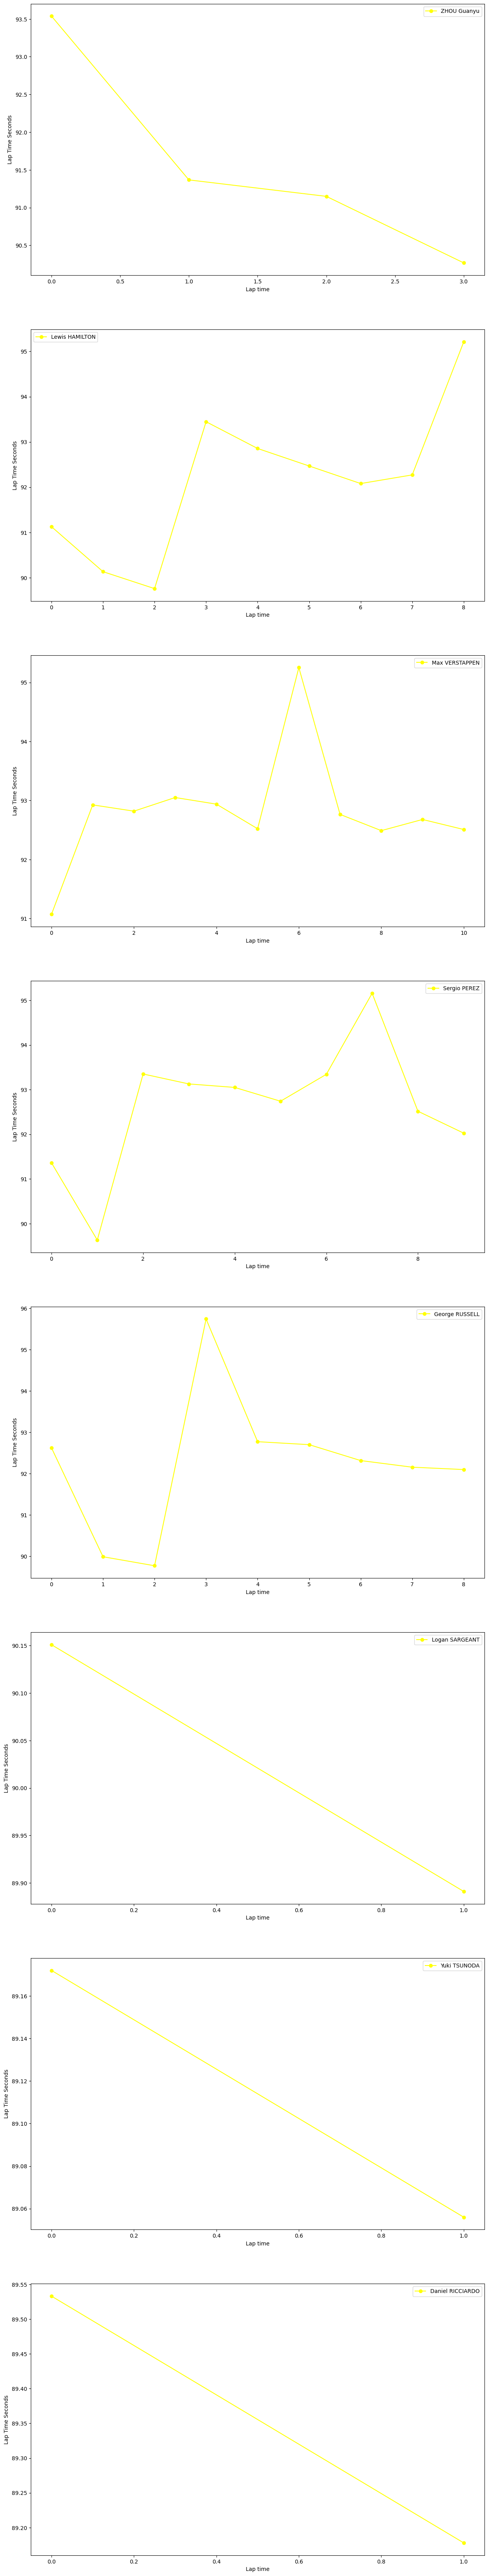

In [486]:
obtain_data_tyres(jointables2,"MEDIUM",False)

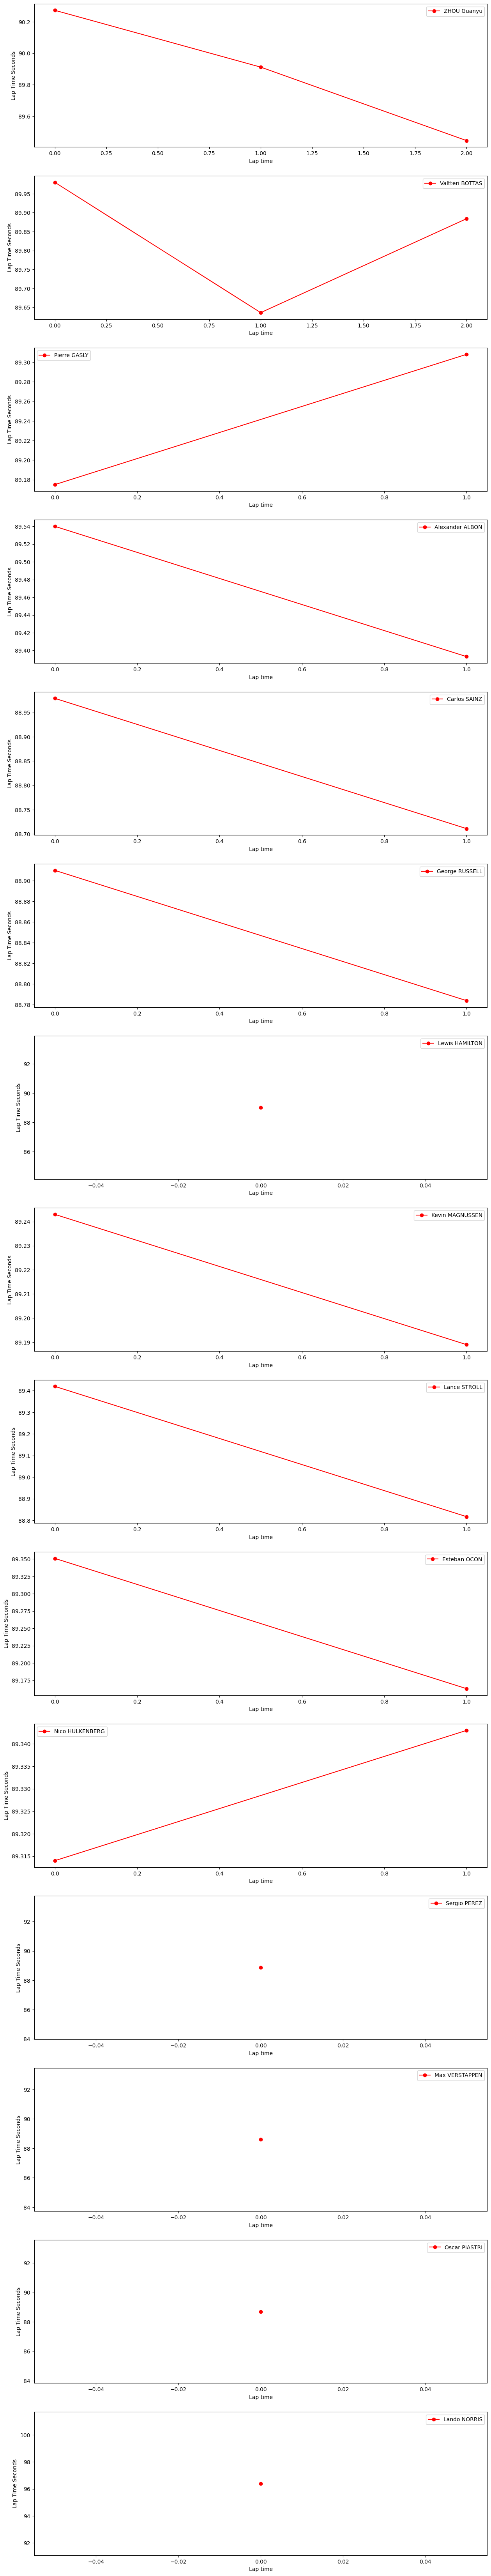

In [487]:
obtain_data_tyres(jointables2,"SOFT",False)

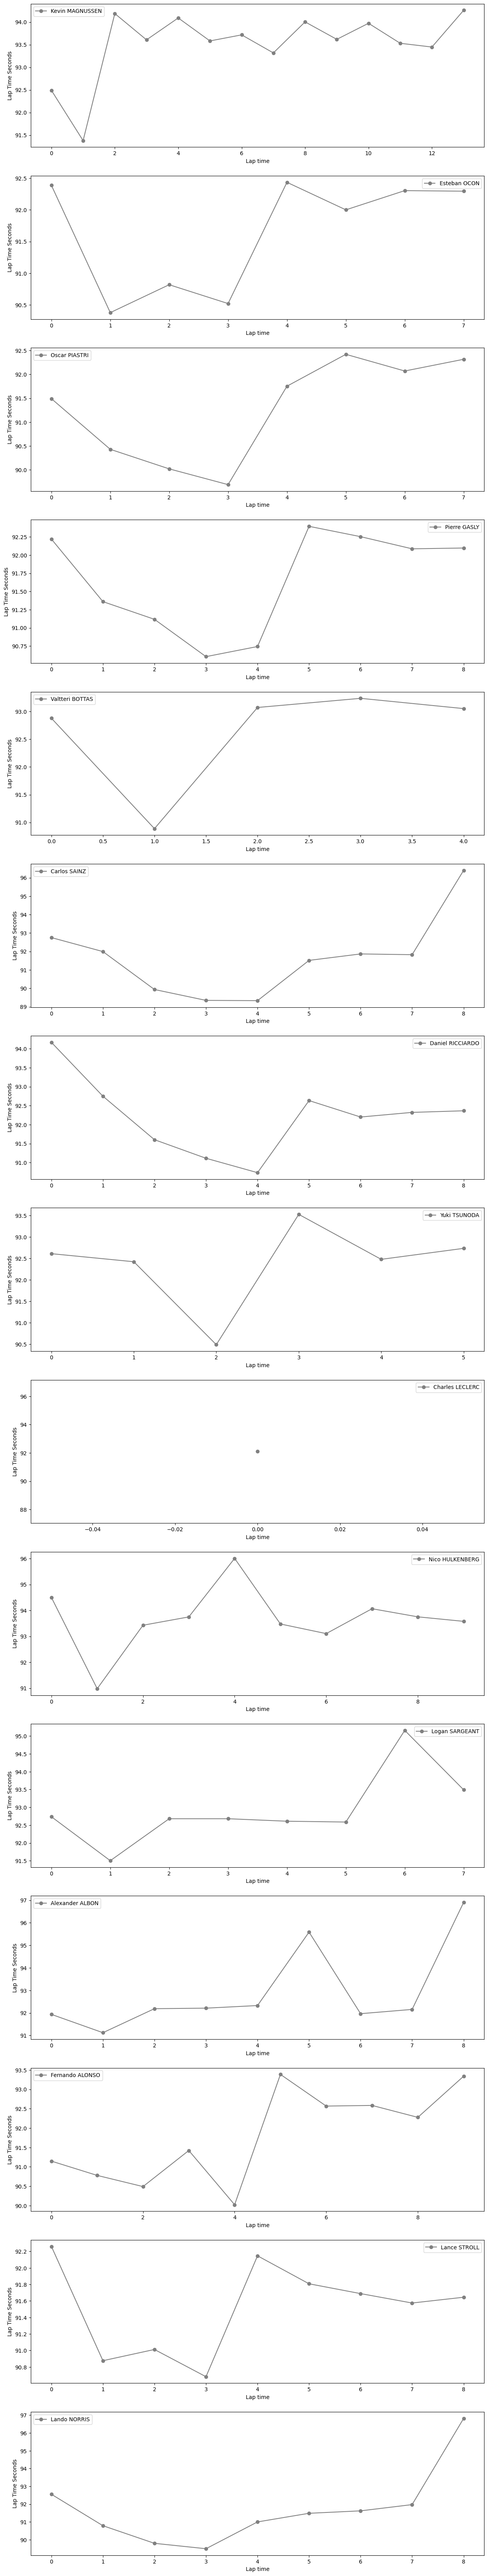

In [488]:
obtain_data_tyres(jointables2,"HARD",False)

In [489]:
# Source: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
def obtainchart(xvariable,yvariable,dataset):
    plt.figure(figsize=(12, 9))
    plots = sns.barplot(x=xvariable, y=yvariable, data=dataset,color='red')
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.3f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 7),
                       textcoords='offset points')
    plt.show()

### Top speed

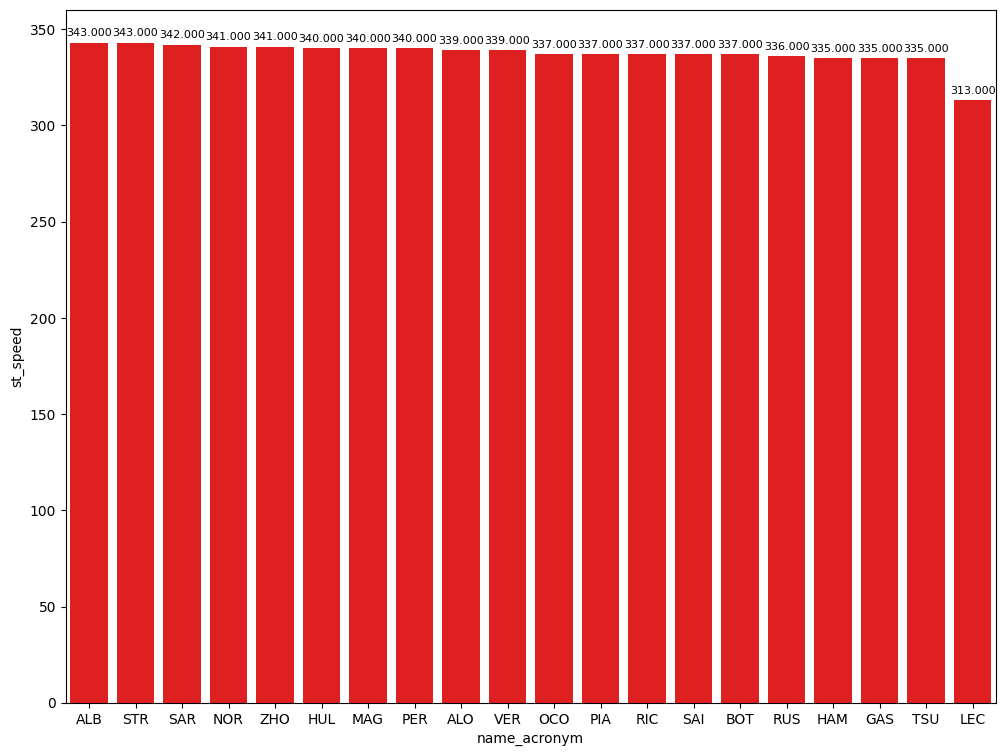

In [490]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("name_acronym","st_speed",top_speed)

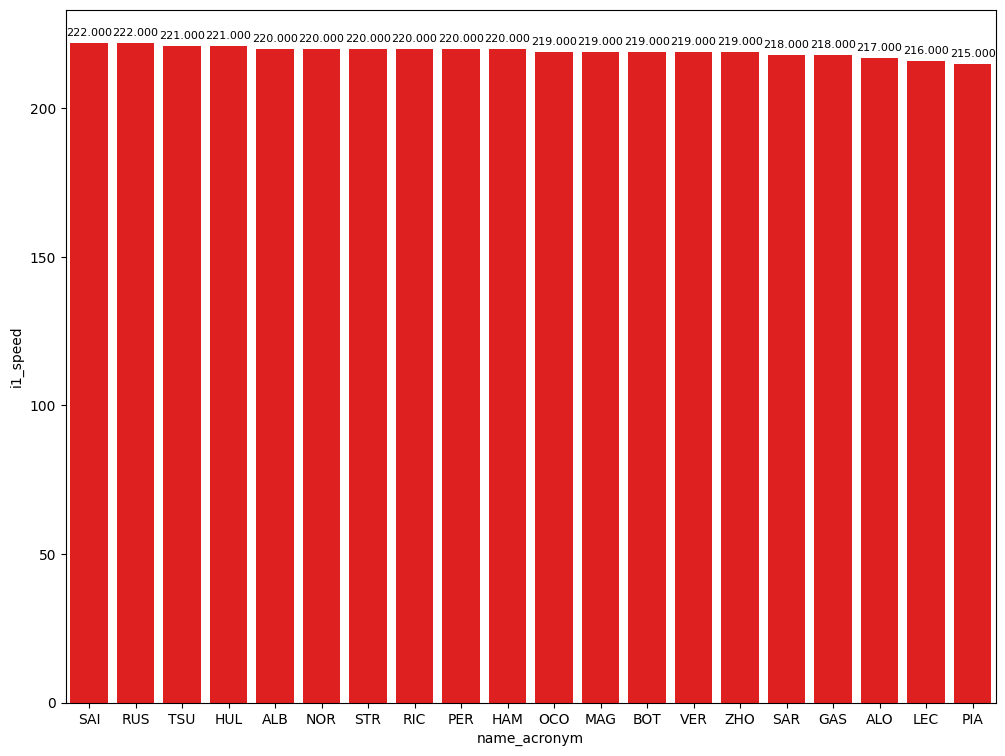

In [491]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("name_acronym","i1_speed",top_speed)

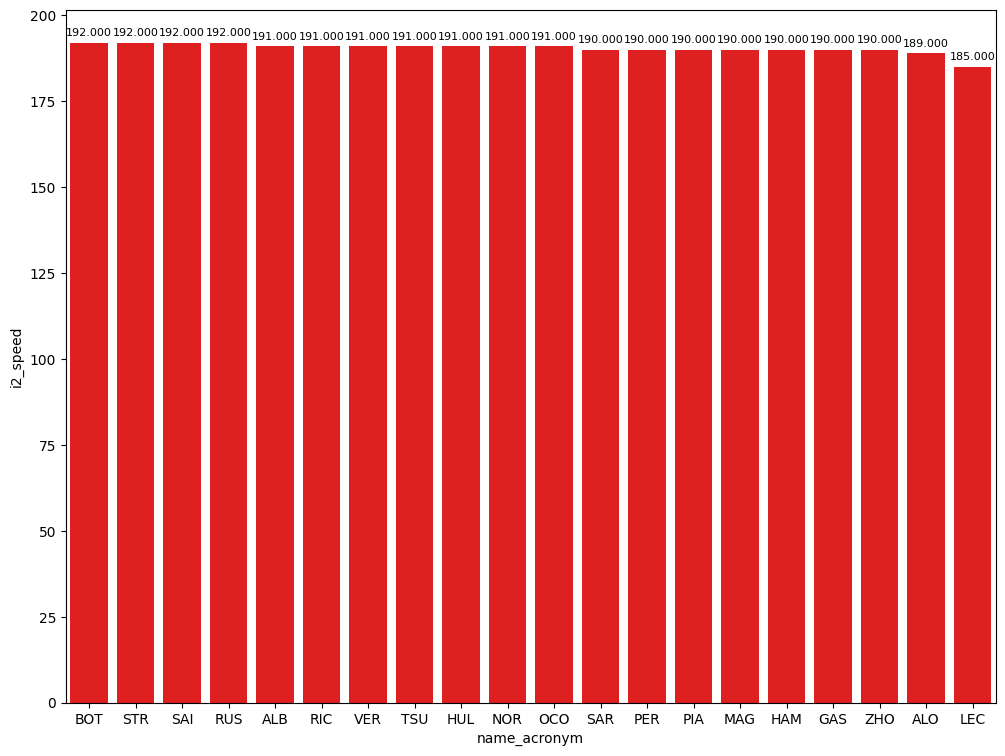

In [492]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound

In [493]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
212    Carlos SAINZ     HARD             29.814             34.156   
406    Yuki TSUNODA   MEDIUM             30.010             33.803   
395  Max VERSTAPPEN     SOFT             29.606             33.604   

     duration_sector_3  lap_duration  
212             25.361        89.331  
406             25.243        89.056  
395             25.385        88.595

### Fastest lap

In [494]:
def obtain_fastest_lap(driver,dataset,newdataset):
    fastest_lap = dataset.query("driver_number == @driver").lap_duration.min()
    team_name = dataset.query("driver_number == @driver").head(1).team_name.to_string(index=False)
    #team_colour = dataset.query("driver_number == @driver").head(1).team_colour.to_string(index=False)
    name_acronym = dataset.query('driver_number == @driver').head(1).name_acronym.to_string(index=False)
    new_row = {'driver_number':driver,'fastest_lap':fastest_lap,'name_acronym': name_acronym, 'team_name':team_name}
    newdataset =pd.concat([newdataset, pd.DataFrame([new_row])], ignore_index=True)
    return newdataset

In [495]:
def obtain_deltas(dataset,array):
    fastest_lap = dataset.fastest_lap.min()
    for row in dataset.iterrows():
        lap = row[1][1]
        delta = lap-fastest_lap
        array.append(delta)
    return array

In [496]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =obtain_fastest_lap(driver,practiceCleaned,newdataset)

In [497]:
arr= obtain_deltas(newdataset,[])
newdataset.insert(3,'delta',arr)

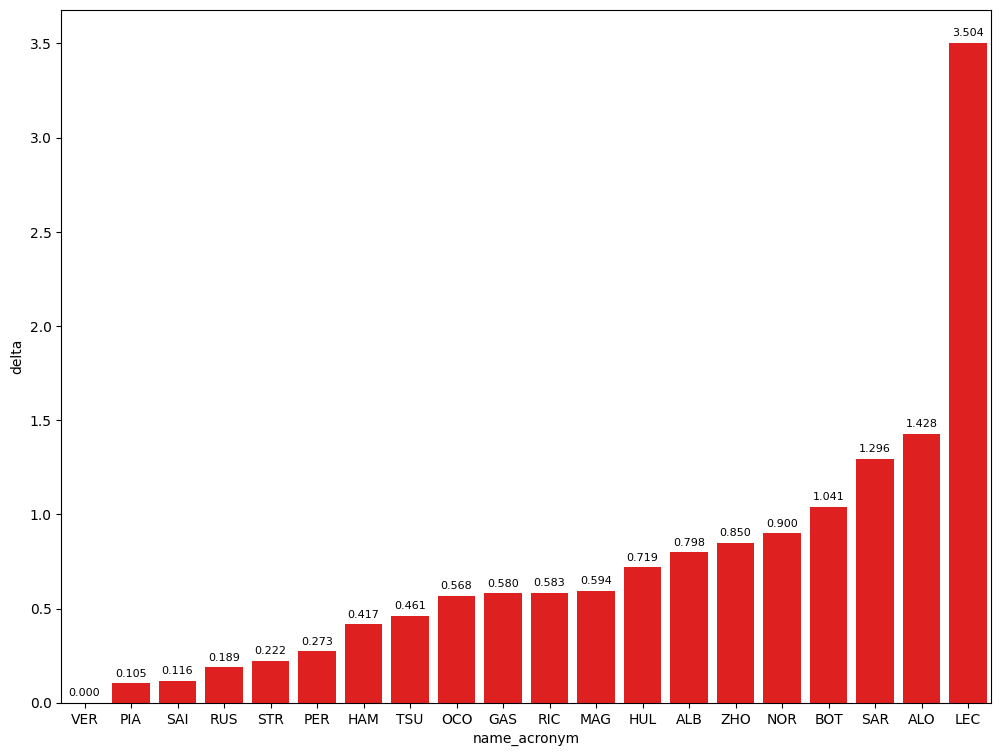

In [498]:
dt = newdataset.sort_values(ascending=True,by='delta')
obtainchart("name_acronym","delta",dt)

### Track dominance

In [499]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

duration_sector_1         full_name compound  lap_duration  lap_number
398             29.473    George RUSSELL     SOFT        88.784          23
352             29.575    Lewis HAMILTON     SOFT        89.012          20
395             29.606    Max VERSTAPPEN     SOFT        88.595          22
400             29.612      Carlos SAINZ     SOFT        88.711          21
404             29.729      Lando NORRIS     SOFT        96.398          18
401             29.746     Oscar PIASTRI     SOFT        88.700          21
327             29.748      Pierre GASLY     SOFT        89.175          20
411             29.791      Esteban OCON     SOFT        89.163          21
407             29.814      Lance STROLL     SOFT        88.817          22
349             29.861      Yuki TSUNODA   MEDIUM        89.172          19
396             29.870   Valtteri BOTTAS     SOFT        89.884          20
399             29.907  Daniel RICCIARDO   MEDIUM        89.178          24
376             29.929      Sergio PEREZ     SOFT        88.868          19
353             29.993   Kevin MAGNUSSEN     SOFT        89.243          21
402             30.045       ZHOU Guanyu     SOFT        89.445          21
363             30.222   Nico HULKENBERG     SOFT        89.314          20
378             30.258   Alexander ALBON     SOFT        89.393          20
326             30.301   Fernando ALONSO     HARD        90.023          14
322             30.525    Logan SARGEANT   MEDIUM        90.151          16
29              30.804   Charles LECLERC     HARD        92.099           2

In [500]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

duration_sector_2         full_name compound  lap_duration  lap_number
395             33.604    Max VERSTAPPEN     SOFT        88.595          22
404             33.706      Lando NORRIS     SOFT        96.398          18
418             33.802   Nico HULKENBERG     SOFT        89.343          23
406             33.803      Yuki TSUNODA   MEDIUM        89.056          22
401             33.858     Oscar PIASTRI     SOFT        88.700          21
376             33.900      Sergio PEREZ     SOFT        88.868          19
400             33.904      Carlos SAINZ     SOFT        88.711          21
407             33.916      Lance STROLL     SOFT        88.817          22
345             33.965    George RUSSELL     SOFT        88.910          20
328             33.969   Alexander ALBON     SOFT        89.540          17
399             34.008  Daniel RICCIARDO   MEDIUM        89.178          24
414             34.033   Kevin MAGNUSSEN     SOFT        89.189          24
411             34.127      Esteban OCON     SOFT        89.163          21
327             34.133      Pierre GASLY     SOFT        89.175          20
369             34.179    Logan SARGEANT   MEDIUM        89.891          19
402             34.181       ZHOU Guanyu     SOFT        89.445          21
362             34.209   Valtteri BOTTAS     SOFT        89.636          18
352             34.210    Lewis HAMILTON     SOFT        89.012          20
326             34.369   Fernando ALONSO     HARD        90.023          14
29              35.199   Charles LECLERC     HARD        92.099           2

In [501]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

duration_sector_3         full_name compound  lap_duration  lap_number
418             24.939   Nico HULKENBERG     SOFT        89.343          23
378             24.992   Alexander ALBON     SOFT        89.393          20
376             25.039      Sergio PEREZ     SOFT        88.868          19
407             25.087      Lance STROLL     SOFT        88.817          22
401             25.096     Oscar PIASTRI     SOFT        88.700          21
353             25.134   Kevin MAGNUSSEN     SOFT        89.243          21
369             25.145    Logan SARGEANT   MEDIUM        89.891          19
400             25.195      Carlos SAINZ     SOFT        88.711          21
402             25.219       ZHOU Guanyu     SOFT        89.445          21
359             25.222      Esteban OCON     SOFT        89.351          18
352             25.227    Lewis HAMILTON     SOFT        89.012          20
406             25.243      Yuki TSUNODA   MEDIUM        89.056          22
399             25.263  Daniel RICCIARDO   MEDIUM        89.178          24
398             25.277    George RUSSELL     SOFT        88.784          23
327             25.294      Pierre GASLY     SOFT        89.175          20
237             25.302      Lando NORRIS     HARD        89.798           8
362             25.323   Valtteri BOTTAS     SOFT        89.636          18
326             25.353   Fernando ALONSO     HARD        90.023          14
395             25.385    Max VERSTAPPEN     SOFT        88.595          22
29              26.096   Charles LECLERC     HARD        92.099           2

In [502]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 95").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         89.267115
MEDIUM       91.750022
HARD         92.107432

### Long laps

In [503]:
def getinfolonglaps(dataset,driver_number,team,lap_duration_min=90,lap_duration_max=95):
    dataset = dataset.query("is_pit_out_lap == False and driver_number == @driver_number and team_name == @team and lap_duration < @lap_duration_max and lap_duration > @lap_duration_min ")
    return dataset[['full_name','compound','date_start','lap_number','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

#### Red Bull Racing

In [504]:
stintInformation.query('driver_number == 1 or driver_number == 11')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1234         9497             1              1          1        5   
7          1234         9497             1             11          1        5   
26         1234         9497             2             11          6        8   
32         1234         9497             2              1          6       18   
44         1234         9497             3             11          9       18   
62         1234         9497             3              1         19       21   
63         1234         9497             4             11         19       21   
77         1234         9497             5             11         22       24   
78         1234         9497             4              1         22       26   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
7    MEDIUM                  0  
26   MEDIUM                  4  
32   MEDIUM                  4  
44   MEDIUM                  7  
62     SOFT                  0  
63     SOFT                  0  
77   MEDIUM                 17  
78     SOFT                  3

In [505]:
getinfolonglaps(jointables2,1,'Red Bull Racing',90,95)

full_name compound                        date_start  lap_number  \
32   Max VERSTAPPEN   MEDIUM  2024-05-03T16:33:32.677000+00:00           2   
127  Max VERSTAPPEN   MEDIUM  2024-05-03T16:53:02.293000+00:00           7   
143  Max VERSTAPPEN   MEDIUM  2024-05-03T16:54:35.355000+00:00           8   
158  Max VERSTAPPEN   MEDIUM  2024-05-03T16:56:08.113000+00:00           9   
171  Max VERSTAPPEN   MEDIUM  2024-05-03T16:57:42.711000+00:00          10   
181  Max VERSTAPPEN   MEDIUM  2024-05-03T16:59:14.126000+00:00          11   
205  Max VERSTAPPEN   MEDIUM  2024-05-03T17:02:21.908000+00:00          13   
222  Max VERSTAPPEN   MEDIUM  2024-05-03T17:03:55.129000+00:00          14   
239  Max VERSTAPPEN   MEDIUM  2024-05-03T17:05:27.160000+00:00          15   
254  Max VERSTAPPEN   MEDIUM  2024-05-03T17:06:59.773000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
32              30.747             34.684             25.640        91.071  
127             31.654             35.126             26.145        92.925  
143             31.653             35.103             26.063        92.819  
158             31.672             35.319             26.059        93.050  
171             31.514             35.369             26.055        92.938  
181             31.529             35.102             25.890        92.521  
205             31.626             35.220             25.918        92.764  
222             31.503             35.184             25.802        92.489  
239             31.388             35.272             26.018        92.678  
254             31.257             35.295             25.956        92.508

In [506]:
getinfolonglaps(jointables2,11,'Red Bull Racing',90,95)

full_name compound                        date_start  lap_number  \
34   Sergio PEREZ   MEDIUM  2024-05-03T16:33:37.127000+00:00           2   
177  Sergio PEREZ   MEDIUM  2024-05-03T16:58:56.401000+00:00           9   
187  Sergio PEREZ   MEDIUM  2024-05-03T17:00:29.750000+00:00          10   
202  Sergio PEREZ   MEDIUM  2024-05-03T17:02:02.889000+00:00          11   
218  Sergio PEREZ   MEDIUM  2024-05-03T17:03:36.051000+00:00          12   
234  Sergio PEREZ   MEDIUM  2024-05-03T17:05:08.678000+00:00          13   
264  Sergio PEREZ   MEDIUM  2024-05-03T17:08:17.168000+00:00          15   
279  Sergio PEREZ   MEDIUM  2024-05-03T17:09:49.699000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
34              31.073             34.698             25.590        91.361  
177             31.701             35.498             26.151        93.350  
187             31.461             35.638             26.028        93.127  
202             31.613             35.424             26.012        93.049  
218             31.578             35.091             26.071        92.740  
234             31.665             35.401             26.276        93.342  
264             31.508             35.157             25.851        92.516  
279             31.458             34.777             25.790        92.025

#### Ferrari

In [507]:
stintInformation.query('driver_number == 16 or driver_number == 55')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1234         9497             1             16          1        4   
11         1234         9497             1             55          1        5   
31         1234         9497             2             55          6       17   
60         1234         9497             3             55         18       20   
72         1234         9497             4             55         21       25   

   compound  tyre_age_at_start  
4      HARD                  0  
11     HARD                  0  
31     HARD                  4  
60     SOFT                  0  
72     SOFT                  3

In [508]:
getinfolonglaps(jointables2,55,'Ferrari',90,98)

full_name compound                        date_start  lap_number  \
25   Carlos SAINZ     HARD  2024-05-03T16:32:55.244000+00:00           2   
43   Carlos SAINZ     HARD  2024-05-03T16:34:27.125000+00:00           3   
248  Carlos SAINZ     HARD  2024-05-03T17:06:41.245000+00:00          13   
263  Carlos SAINZ     HARD  2024-05-03T17:08:12.691000+00:00          14   
278  Carlos SAINZ     HARD  2024-05-03T17:09:44.617000+00:00          15   
289  Carlos SAINZ     HARD  2024-05-03T17:11:16.403000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
25              31.148             35.477             26.128        92.753  
43              30.964             35.151             25.879        91.994  
248             30.613             34.954             25.949        91.516  
263             30.629             35.249             25.988        91.866  
278             30.695             35.060             26.070        91.825  
289             30.574             35.069             30.759        96.402

#### McLaren

In [509]:
stintInformation.query('driver_number == 4 or driver_number == 81')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1234         9497             1              4          1        2   
19         1234         9497             1             81          1        6   
22         1234         9497             2              4          3        7   
35         1234         9497             2             81          7        9   
42         1234         9497             3              4          8       17   
46         1234         9497             3             81         10       14   
52         1234         9497             4             81         15       20   
59         1234         9497             4              4         18       19   
67         1234         9497             5              4         20       22   
73         1234         9497             5             81         21       25   

   compound  tyre_age_at_start  
0      HARD                  0  
19     HARD                  0  
22     HARD                  1  
35     HARD                  5  
42     HARD                  6  
46     HARD                  8  
52     HARD                 13  
59     SOFT                  0  
67     HARD                 16  
73     SOFT                  0

In [510]:
getinfolonglaps(jointables2,4,'McLaren',90,95)

full_name compound                        date_start  lap_number  \
93   Lando NORRIS     HARD  2024-05-03T16:49:09.790000+00:00           3   
125  Lando NORRIS     HARD  2024-05-03T16:52:50.600000+00:00           5   
294  Lando NORRIS     HARD  2024-05-03T17:12:09.131000+00:00          12   
302  Lando NORRIS     HARD  2024-05-03T17:13:40.162000+00:00          13   
310  Lando NORRIS     HARD  2024-05-03T17:15:11.897000+00:00          14   
315  Lando NORRIS     HARD  2024-05-03T17:16:43.266000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
93              31.385             35.093             26.077        92.555  
125             30.366             34.618             25.804        90.788  
294             30.549             34.796             25.656        91.001  
302             30.779             34.907             25.800        91.486  
310             30.891             34.977             25.755        91.623  
315             30.920             35.082             25.972        91.974

In [511]:
getinfolonglaps(jointables2,81,'McLaren',90,95)

full_name compound                        date_start  lap_number  \
20   Oscar PIASTRI     HARD  2024-05-03T16:32:03.324000+00:00           2   
92   Oscar PIASTRI     HARD  2024-05-03T16:49:01.946000+00:00           7   
214  Oscar PIASTRI     HARD  2024-05-03T17:03:20.897000+00:00          10   
293  Oscar PIASTRI     HARD  2024-05-03T17:12:05.728000+00:00          15   
301  Oscar PIASTRI     HARD  2024-05-03T17:13:37.382000+00:00          16   
309  Oscar PIASTRI     HARD  2024-05-03T17:15:09.739000+00:00          17   
314  Oscar PIASTRI     HARD  2024-05-03T17:16:41.801000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
20              30.837             34.915             25.739        91.491  
92              30.422             34.389             25.620        90.431  
214             30.182             34.407             25.433        90.022  
293             30.968             34.937             25.847        91.752  
301             31.331             35.081             26.007        92.419  
309             31.231             34.787             26.052        92.070  
314             31.093             35.194             26.028        92.315

#### Mercedes

In [512]:
stintInformation.query('driver_number == 44 or driver_number == 63')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1234         9497             1             44          1        5   
12         1234         9497             1             63          1        5   
27         1234         9497             2             44          6        8   
29         1234         9497             2             63          6       10   
43         1234         9497             3             44          9       11   
48         1234         9497             3             63         11       19   
51         1234         9497             4             44         12       19   
68         1234         9497             5             44         20       22   
69         1234         9497             4             63         20       22   
80         1234         9497             6             44         23       25   
81         1234         9497             5             63         23       27   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
12   MEDIUM                  0  
27   MEDIUM                  4  
29   MEDIUM                  4  
43   MEDIUM                  7  
48   MEDIUM                  9  
51   MEDIUM                 10  
68     SOFT                  0  
69     SOFT                  0  
80   MEDIUM                 18  
81     SOFT                  0

In [513]:
getinfolonglaps(jointables2,44,'Mercedes',90,95)

full_name compound                        date_start  lap_number  \
24   Lewis HAMILTON   MEDIUM  2024-05-03T16:32:46.629000+00:00           2   
89   Lewis HAMILTON   MEDIUM  2024-05-03T16:48:40.981000+00:00           6   
227  Lewis HAMILTON   MEDIUM  2024-05-03T17:04:28.013000+00:00          12   
243  Lewis HAMILTON   MEDIUM  2024-05-03T17:06:01.455000+00:00          13   
259  Lewis HAMILTON   MEDIUM  2024-05-03T17:07:34.285000+00:00          14   
273  Lewis HAMILTON   MEDIUM  2024-05-03T17:09:06.732000+00:00          15   
284  Lewis HAMILTON   MEDIUM  2024-05-03T17:10:38.817000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              30.205             35.255             25.667        91.127  
89              29.935             34.714             25.484        90.133  
227             31.485             35.689             26.272        93.446  
243             31.233             35.496             26.126        92.855  
259             31.163             35.387             25.918        92.468  
273             30.760             35.260             26.060        92.080  
284             30.949             35.379             25.943        92.271

In [514]:
getinfolonglaps(jointables2,63,'Mercedes',90,95)

full_name compound                        date_start  lap_number  \
37   George RUSSELL   MEDIUM  2024-05-03T16:33:44.497000+00:00           2   
219  George RUSSELL   MEDIUM  2024-05-03T17:03:40.582000+00:00          12   
235  George RUSSELL   MEDIUM  2024-05-03T17:05:13.378000+00:00          13   
250  George RUSSELL   MEDIUM  2024-05-03T17:06:46.074000+00:00          14   
265  George RUSSELL   MEDIUM  2024-05-03T17:08:18.350000+00:00          15   
291  George RUSSELL   MEDIUM  2024-05-03T17:11:30.393000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
37              31.644             35.102             25.875        92.621  
219             30.858             35.695             26.217        92.770  
235             30.940             35.618             26.140        92.698  
250             30.958             35.585             25.770        92.313  
265             31.136             35.302             25.715        92.153  
291             30.778             35.266             26.052        92.096

#### Aston Martin

In [515]:
stintInformation.query('driver_number == 14 or driver_number == 18')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1234         9497             1             14          1        2   
2          1234         9497             1             18          1        2   
20         1234         9497             2             14          3        3   
21         1234         9497             2             18          3        3   
24         1234         9497             3             14          4       10   
25         1234         9497             3             18          4       18   
49         1234         9497             4             14         11       23   
64         1234         9497             4             18         19       26   

   compound  tyre_age_at_start  
1    MEDIUM                  0  
2    MEDIUM                  0  
20     HARD                  0  
21     HARD                  0  
24     HARD                  0  
25     HARD                  0  
49     HARD                  7  
64     SOFT                  0

In [516]:
getinfolonglaps(jointables2,14,'Aston Martin',90,95)

full_name compound                        date_start  lap_number  \
88   Fernando ALONSO     HARD  2024-05-03T16:48:19.719000+00:00           4   
121  Fernando ALONSO     HARD  2024-05-03T16:52:04.735000+00:00           6   
154  Fernando ALONSO     HARD  2024-05-03T16:55:47.668000+00:00           8   
299  Fernando ALONSO     HARD  2024-05-03T17:13:12.570000+00:00          11   
326  Fernando ALONSO     HARD  2024-05-03T17:18:52.307000+00:00          14   
357  Fernando ALONSO     HARD  2024-05-03T17:22:40.164000+00:00          16   
371  Fernando ALONSO     HARD  2024-05-03T17:24:13.476000+00:00          17   
383  Fernando ALONSO     HARD  2024-05-03T17:25:46.061000+00:00          18   
397  Fernando ALONSO     HARD  2024-05-03T17:27:18.707000+00:00          19   
412  Fernando ALONSO     HARD  2024-05-03T17:28:51.033000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
88              30.924             34.544             25.680        91.148  
121             30.578             34.631             25.570        90.779  
154             30.394             34.476             25.621        90.491  
299             30.770             34.906             25.746        91.422  
326             30.301             34.369             25.353        90.023  
357             31.546             35.806             26.035        93.387  
371             31.099             35.475             25.995        92.569  
383             30.945             35.365             26.276        92.586  
397             30.929             35.381             25.968        92.278  
412             31.582             35.680             26.078        93.340

In [517]:
getinfolonglaps(jointables2,18,'Aston Martin',90,95)

full_name compound                        date_start  lap_number  \
91   Lance STROLL     HARD  2024-05-03T16:48:54.743000+00:00           4   
122  Lance STROLL     HARD  2024-05-03T16:52:12.563000+00:00           6   
156  Lance STROLL     HARD  2024-05-03T16:56:02.091000+00:00           8   
184  Lance STROLL     HARD  2024-05-03T16:59:51.560000+00:00          10   
213  Lance STROLL     HARD  2024-05-03T17:03:14.516000+00:00          12   
230  Lance STROLL     HARD  2024-05-03T17:04:46.663000+00:00          13   
245  Lance STROLL     HARD  2024-05-03T17:06:18.592000+00:00          14   
261  Lance STROLL     HARD  2024-05-03T17:07:50.099000+00:00          15   
275  Lance STROLL     HARD  2024-05-03T17:09:21.742000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
91              31.183             35.059             26.019        92.261  
122             30.764             34.710             25.402        90.876  
156             30.955             34.507             25.550        91.012  
184             30.467             34.794             25.421        90.682  
213             31.079             35.188             25.880        92.147  
230             30.998             35.055             25.755        91.808  
245             30.974             35.068             25.647        91.689  
261             30.866             35.115             25.594        91.575  
275             30.817             35.132             25.696        91.645

#### RB

In [518]:
stintInformation.query('driver_number == 3 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6          1234         9497             1              3          1        5   
8          1234         9497             1             22          1        5   
30         1234         9497             2             22          6       11   
33         1234         9497             2              3          6       19   
50         1234         9497             3             22         12       16   
57         1234         9497             4             22         17       17   
58         1234         9497             5             22         18       18   
65         1234         9497             6             22         19       26   
66         1234         9497             3              3         20       20   
75         1234         9497             4              3         21       28   

   compound  tyre_age_at_start  
6      HARD                  0  
8      HARD                  0  
30     HARD                  4  
33     HARD                  4  
50     HARD                  0  
57     HARD                 15  
58     HARD                  0  
65   MEDIUM                  0  
66     HARD                 18  
75   MEDIUM                  0

In [519]:
getinfolonglaps(jointables2,3,'RB',90,95)

full_name compound                        date_start  lap_number  \
26   Daniel RICCIARDO     HARD  2024-05-03T16:32:57.799000+00:00           2   
44   Daniel RICCIARDO     HARD  2024-05-03T16:34:31.830000+00:00           3   
94   Daniel RICCIARDO     HARD  2024-05-03T16:49:13.901000+00:00           6   
129  Daniel RICCIARDO     HARD  2024-05-03T16:53:10.030000+00:00           8   
164  Daniel RICCIARDO     HARD  2024-05-03T16:57:04.680000+00:00          10   
228  Daniel RICCIARDO     HARD  2024-05-03T17:04:30.669000+00:00          14   
244  Daniel RICCIARDO     HARD  2024-05-03T17:06:03.143000+00:00          15   
260  Daniel RICCIARDO     HARD  2024-05-03T17:07:35.336000+00:00          16   
274  Daniel RICCIARDO     HARD  2024-05-03T17:09:07.725000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
26              32.209             35.758             26.200        94.167  
44              31.504             35.352             25.893        92.749  
94              31.062             34.801             25.741        91.604  
129             30.790             34.554             25.771        91.115  
164             30.554             34.495             25.687        90.736  
228             31.286             35.439             25.909        92.634  
244             31.426             35.051             25.724        92.201  
260             31.353             35.215             25.755        92.323  
274             31.293             35.226             25.846        92.365

In [520]:
getinfolonglaps(jointables2,22,'RB',90,95)

full_name compound                        date_start  lap_number  \
27   Yuki TSUNODA     HARD  2024-05-03T16:33:11.991000+00:00           2   
85   Yuki TSUNODA     HARD  2024-05-03T16:47:57.572000+00:00           6   
119  Yuki TSUNODA     HARD  2024-05-03T16:51:46.082000+00:00           8   
211  Yuki TSUNODA     HARD  2024-05-03T17:02:49.852000+00:00          12   
226  Yuki TSUNODA     HARD  2024-05-03T17:04:23.381000+00:00          13   
242  Yuki TSUNODA     HARD  2024-05-03T17:05:55.792000+00:00          14   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
27              31.170             35.656             25.788        92.614  
85              32.202             34.644             25.580        92.426  
119             30.482             34.378             25.632        90.492  
211             32.215             35.161             26.155        93.531  
226             31.106             35.233             26.143        92.482  
242             31.444             35.237             26.057        92.738

#### Williams

In [521]:
stintInformation.query('driver_number == 2 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1234         9497             1              2          1        3   
15         1234         9497             1             23          1        6   
23         1234         9497             2              2          4        7   
36         1234         9497             2             23          7       14   
41         1234         9497             3              2          8       15   
53         1234         9497             3             23         15       22   
56         1234         9497             4              2         16       21   
76         1234         9497             5              2         22       24   
79         1234         9497             4             23         23       25   

   compound  tyre_age_at_start  
3      HARD                  0  
15     HARD                  0  
23     HARD                  2  
36     HARD                  5  
41     HARD                  6  
53     SOFT                  0  
56   MEDIUM                  0  
76   MEDIUM                  6  
79     HARD                 13

In [522]:
getinfolonglaps(jointables2,2,'Williams',90,95)

full_name compound                        date_start  lap_number  \
84   Logan SARGEANT     HARD  2024-05-03T16:47:48.857000+00:00           4   
96   Logan SARGEANT     HARD  2024-05-03T16:49:21.612000+00:00           5   
149  Logan SARGEANT     HARD  2024-05-03T16:55:02.245000+00:00           8   
160  Logan SARGEANT     HARD  2024-05-03T16:56:34.834000+00:00           9   
173  Logan SARGEANT     HARD  2024-05-03T16:58:07.597000+00:00          10   
183  Logan SARGEANT     HARD  2024-05-03T16:59:40.154000+00:00          11   
210  Logan SARGEANT     HARD  2024-05-03T17:02:47.896000+00:00          13   
322  Logan SARGEANT   MEDIUM  2024-05-03T17:18:10.359000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
84              31.477             35.512             25.747        92.736  
96              31.313             34.647             25.542        91.502  
149             31.747             34.967             25.966        92.680  
160             31.790             35.018             25.872        92.680  
173             31.672             35.141             25.797        92.610  
183             31.568             35.240             25.779        92.587  
210             32.678             34.983             25.831        93.492  
322             30.525             34.425             25.201        90.151

In [523]:
getinfolonglaps(jointables2,23,'Williams',90,95)

full_name compound                        date_start  lap_number  \
86   Alexander ALBON     HARD  2024-05-03T16:48:03.488000+00:00           2   
115  Alexander ALBON     HARD  2024-05-03T16:51:30.611000+00:00           4   
165  Alexander ALBON     HARD  2024-05-03T16:57:12.709000+00:00           7   
176  Alexander ALBON     HARD  2024-05-03T16:58:44.889000+00:00           8   
185  Alexander ALBON     HARD  2024-05-03T17:00:17.085000+00:00           9   
217  Alexander ALBON     HARD  2024-05-03T17:03:25.089000+00:00          11   
233  Alexander ALBON     HARD  2024-05-03T17:04:57.066000+00:00          12   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
86              31.500             34.948             25.489        91.937  
115             31.237             34.531             25.356        91.124  
165             31.513             35.089             25.588        92.190  
176             31.446             34.987             25.780        92.213  
185             31.526             35.033             25.770        92.329  
217             31.315             34.816             25.837        91.968  
233             31.305             35.188             25.664        92.157

#### Kick Sauber

In [524]:
stintInformation.query('driver_number == 24 or driver_number == 77')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
16         1234         9497             1             24          1        6   
18         1234         9497             1             77          1        6   
34         1234         9497             2             77          7        9   
37         1234         9497             2             24          7       14   
45         1234         9497             3             77         10       14   
54         1234         9497             4             77         15       24   
55         1234         9497             3             24         15       25   

   compound  tyre_age_at_start  
16   MEDIUM                  0  
18     HARD                  0  
34     HARD                  0  
37   MEDIUM                  0  
45     HARD                  0  
54     SOFT                  0  
55     SOFT                  0

In [525]:
getinfolonglaps(jointables2,24,'Kick Sauber',90,95)

full_name compound                        date_start  lap_number  \
22   ZHOU Guanyu   MEDIUM  2024-05-03T16:32:18.563000+00:00           2   
95   ZHOU Guanyu   MEDIUM  2024-05-03T16:49:17.744000+00:00           7   
131  ZHOU Guanyu   MEDIUM  2024-05-03T16:53:14.549000+00:00           9   
179  ZHOU Guanyu   MEDIUM  2024-05-03T16:59:03.346000+00:00          12   
311  ZHOU Guanyu     SOFT  2024-05-03T17:15:43.512000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              32.070             35.519             25.949        93.538  
95              30.851             34.781             25.735        91.367  
131             30.852             34.605             25.692        91.149  
179             30.329             34.500             25.438        90.267  
311             30.485             34.465             25.323        90.273

In [526]:
getinfolonglaps(jointables2,77,'Kick Sauber',90,95)

full_name compound                        date_start  lap_number  \
23   Valtteri BOTTAS     HARD  2024-05-03T16:32:24.441000+00:00           2   
133  Valtteri BOTTAS     HARD  2024-05-03T16:53:23.825000+00:00           7   
221  Valtteri BOTTAS     HARD  2024-05-03T17:03:49.160000+00:00          10   
238  Valtteri BOTTAS     HARD  2024-05-03T17:05:22.188000+00:00          11   
253  Valtteri BOTTAS     HARD  2024-05-03T17:06:55.502000+00:00          12   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              31.411             35.484             25.985        92.880  
133             30.654             34.517             25.716        90.887  
221             31.338             35.425             26.311        93.074  
238             31.646             35.444             26.149        93.239  
253             31.553             35.445             26.056        93.054

#### Haas

In [527]:
stintInformation.query('driver_number == 20 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
9          1234         9497             1             27          1        5   
14         1234         9497             1             20          1        6   
28         1234         9497             2             27          6        9   
40         1234         9497             2             20          7       20   
47         1234         9497             3             27         10       19   
70         1234         9497             4             27         20       26   
74         1234         9497             3             20         21       27   

   compound  tyre_age_at_start  
9      HARD                  0  
14     HARD                  0  
28     HARD                  0  
40     HARD                  5  
47     HARD                  0  
70     SOFT                  0  
74     SOFT                  0

In [528]:
getinfolonglaps(jointables2,20,'Haas F1 Team',90,95)

full_name compound                        date_start  lap_number  \
16   Kevin MAGNUSSEN     HARD  2024-05-03T16:31:43.853000+00:00           2   
28   Kevin MAGNUSSEN     HARD  2024-05-03T16:33:16.315000+00:00           3   
116  Kevin MAGNUSSEN     HARD  2024-05-03T16:51:37.552000+00:00           7   
130  Kevin MAGNUSSEN     HARD  2024-05-03T16:53:11.658000+00:00           8   
146  Kevin MAGNUSSEN     HARD  2024-05-03T16:54:45.283000+00:00           9   
159  Kevin MAGNUSSEN     HARD  2024-05-03T16:56:19.334000+00:00          10   
172  Kevin MAGNUSSEN     HARD  2024-05-03T16:57:52.889000+00:00          11   
182  Kevin MAGNUSSEN     HARD  2024-05-03T16:59:26.605000+00:00          12   
193  Kevin MAGNUSSEN     HARD  2024-05-03T17:00:59.921000+00:00          13   
206  Kevin MAGNUSSEN     HARD  2024-05-03T17:02:34.003000+00:00          14   
223  Kevin MAGNUSSEN     HARD  2024-05-03T17:04:07.626000+00:00          15   
240  Kevin MAGNUSSEN     HARD  2024-05-03T17:05:41.569000+00:00          16   
256  Kevin MAGNUSSEN     HARD  2024-05-03T17:07:15.113000+00:00          17   
270  Kevin MAGNUSSEN     HARD  2024-05-03T17:08:48.613000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
16              31.631             35.176             25.684        92.491  
28              30.766             35.004             25.609        91.379  
116             32.210             35.583             26.395        94.188  
130             31.924             35.438             26.245        93.607  
146             32.113             35.759             26.219        94.091  
159             31.816             35.468             26.299        93.583  
172             31.706             35.663             26.348        93.717  
182             31.526             35.655             26.137        93.318  
193             31.840             35.673             26.491        94.004  
206             31.833             35.544             26.241        93.618  
223             32.088             35.618             26.267        93.973  
240             31.663             35.574             26.294        93.531  
256             31.650             35.578             26.220        93.448  
270             31.683             35.452             27.125        94.260

In [529]:
getinfolonglaps(jointables2,27,'Haas F1 Team',90,95)

full_name compound                        date_start  lap_number  \
38   Nico HULKENBERG     HARD  2024-05-03T16:33:46.118000+00:00           2   
123  Nico HULKENBERG     HARD  2024-05-03T16:52:28.777000+00:00           6   
215  Nico HULKENBERG     HARD  2024-05-03T17:03:21.692000+00:00          10   
232  Nico HULKENBERG     HARD  2024-05-03T17:04:56.162000+00:00          11   
262  Nico HULKENBERG     HARD  2024-05-03T17:08:04.974000+00:00          13   
277  Nico HULKENBERG     HARD  2024-05-03T17:09:38.427000+00:00          14   
287  Nico HULKENBERG     HARD  2024-05-03T17:11:11.448000+00:00          15   
296  Nico HULKENBERG     HARD  2024-05-03T17:12:45.552000+00:00          16   
305  Nico HULKENBERG     HARD  2024-05-03T17:14:19.227000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
38              32.403             36.371             25.728        94.502  
123             30.700             34.710             25.572        90.982  
215             31.884             35.464             26.081        93.429  
232             31.690             35.709             26.351        93.750  
262             31.679             35.653             26.145        93.477  
277             31.795             35.359             25.952        93.106  
287             32.147             35.812             26.107        94.066  
296             31.938             35.594             26.221        93.753  
305             31.814             35.650             26.115        93.579

#### Alpine

In [530]:
stintInformation.query('driver_number == 10 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1234         9497             1             10          1        6   
17         1234         9497             1             31          1        6   
38         1234         9497             2             31          7       17   
39         1234         9497             2             10          7       19   
61         1234         9497             3             31         18       24   
71         1234         9497             3             10         20       28   

   compound  tyre_age_at_start  
13     HARD                  0  
17     HARD                  0  
38     HARD                  5  
39     HARD                  5  
61     SOFT                  0  
71     SOFT                  0

In [531]:
getinfolonglaps(jointables2,10,'Alpine',90,95)

full_name compound                        date_start  lap_number  \
21   Pierre GASLY     HARD  2024-05-03T16:32:08.594000+00:00           2   
97   Pierre GASLY     HARD  2024-05-03T16:49:25.904000+00:00           7   
128  Pierre GASLY     HARD  2024-05-03T16:53:05.839000+00:00           9   
161  Pierre GASLY     HARD  2024-05-03T16:56:45.655000+00:00          11   
189  Pierre GASLY     HARD  2024-05-03T17:00:39.131000+00:00          13   
204  Pierre GASLY     HARD  2024-05-03T17:02:09.922000+00:00          14   
220  Pierre GASLY     HARD  2024-05-03T17:03:42.326000+00:00          15   
236  Pierre GASLY     HARD  2024-05-03T17:05:14.553000+00:00          16   
251  Pierre GASLY     HARD  2024-05-03T17:06:46.663000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
21              30.885             35.517             25.818        92.220  
97              30.632             34.906             25.822        91.360  
128             30.401             34.893             25.823        91.117  
161             30.049             34.552             26.003        90.604  
189             30.173             34.902             25.668        90.743  
204             30.878             35.407             26.110        92.395  
220             30.911             35.396             25.946        92.253  
236             31.020             35.290             25.776        92.086  
251             31.093             35.442             25.562        92.097

In [532]:
getinfolonglaps(jointables2,31,'Alpine',90,95)

full_name compound                        date_start  lap_number  \
19   Esteban OCON     HARD  2024-05-03T16:31:54.601000+00:00           2   
138  Esteban OCON     HARD  2024-05-03T16:53:41.306000+00:00           7   
169  Esteban OCON     HARD  2024-05-03T16:57:28.283000+00:00           9   
194  Esteban OCON     HARD  2024-05-03T17:01:10.915000+00:00          11   
207  Esteban OCON     HARD  2024-05-03T17:02:41.375000+00:00          12   
224  Esteban OCON     HARD  2024-05-03T17:04:13.833000+00:00          13   
241  Esteban OCON     HARD  2024-05-03T17:05:45.872000+00:00          14   
257  Esteban OCON     HARD  2024-05-03T17:07:18.158000+00:00          15   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
19              31.235             35.406             25.746        92.387  
138             30.246             34.594             25.539        90.379  
169             30.491             34.739             25.589        90.819  
194             30.280             34.660             25.582        90.522  
207             31.016             35.437             25.981        92.434  
224             30.845             35.275             25.880        92.000  
241             30.968             35.380             25.955        92.303  
257             31.051             35.260             25.983        92.294

## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [533]:
url = 'https://api.openf1.org/v1/race_control?'
session_key = 'session_key=9502'
urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
race_control = pd.DataFrame(data)
race_control

session_key  meeting_key                       date category       flag  \
0          9502         1234  2024-05-03T20:15:09+00:00    Other       None   
1          9502         1234  2024-05-03T20:17:12+00:00    Other       None   
2          9502         1234  2024-05-03T20:17:12+00:00    Other       None   
3          9502         1234  2024-05-03T20:17:12+00:00    Other       None   
4          9502         1234  2024-05-03T20:17:12+00:00    Other       None   
5          9502         1234  2024-05-03T20:17:12+00:00    Other       None   
6          9502         1234  2024-05-03T20:17:12+00:00    Other       None   
7          9502         1234  2024-05-03T20:17:33+00:00    Other       None   
8          9502         1234  2024-05-03T20:17:33+00:00    Other       None   
9          9502         1234  2024-05-03T20:21:02+00:00    Other       None   
10         9502         1234  2024-05-03T20:21:27+00:00    Other       None   
11         9502         1234  2024-05-03T20:21:32+00:00    Other       None   
12         9502         1234  2024-05-03T20:21:43+00:00    Other       None   
13         9502         1234  2024-05-03T20:22:00+00:00    Other       None   
14         9502         1234  2024-05-03T20:30:00+00:00     Flag      GREEN   
15         9502         1234  2024-05-03T20:34:29+00:00    Other       None   
16         9502         1234  2024-05-03T20:40:06+00:00    Other       None   
17         9502         1234  2024-05-03T20:40:29+00:00    Other       None   
18         9502         1234  2024-05-03T20:40:30+00:00    Other       None   
19         9502         1234  2024-05-03T20:40:52+00:00    Other       None   
20         9502         1234  2024-05-03T20:42:00+00:00     Flag  CHEQUERED   
21         9502         1234  2024-05-03T20:42:25+00:00    Other       None   
22         9502         1234  2024-05-03T20:43:20+00:00    Other       None   
23         9502         1234  2024-05-03T20:45:39+00:00    Other       None   
24         9502         1234  2024-05-03T20:45:55+00:00    Other       None   
25         9502         1234  2024-05-03T20:49:01+00:00     Flag      GREEN   
26         9502         1234  2024-05-03T20:49:12+00:00    Other       None   
27         9502         1234  2024-05-03T20:58:30+00:00    Other       None   
28         9502         1234  2024-05-03T20:59:00+00:00     Flag  CHEQUERED   
29         9502         1234  2024-05-03T20:59:09+00:00    Other       None   
30         9502         1234  2024-05-03T21:00:27+00:00    Other       None   
31         9502         1234  2024-05-03T21:00:54+00:00    Other       None   
32         9502         1234  2024-05-03T21:02:08+00:00    Other       None   
33         9502         1234  2024-05-03T21:02:21+00:00    Other       None   
34         9502         1234  2024-05-03T21:06:00+00:00     Flag      GREEN   
35         9502         1234  2024-05-03T21:14:00+00:00     Flag  CHEQUERED   
36         9502         1234  2024-05-03T21:14:17+00:00    Other       None   
37         9502         1234  2024-05-03T21:16:46+00:00    Other       None   
38         9502         1234  2024-05-03T21:17:38+00:00    Other       None   

   lap_number                                            message  \
0        None       RISK OF RAIN FOR F1 SPRINT QUALIFYING IS 0 %   
1        None                             DRS DISABLED IN ZONE 1   
2        None                             DRS DISABLED IN ZONE 2   
3        None                             DRS DISABLED IN ZONE 3   
4        None                             DRS DISABLED IN ZONE 1   
5        None                             DRS DISABLED IN ZONE 2   
6        None                             DRS DISABLED IN ZONE 3   
7        None            PINK HEAD PADDING MATERIAL MUST BE USED   
8        None            PINK HEAD PADDING MATERIAL MUST BE USED   
9        None                              DRS ENABLED IN ZONE 2   
10       None                              DRS ENABLED IN ZONE 3   
11       None              

In [534]:
url = 'https://api.openf1.org/v1/laps?'
urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
qualyfing = pd.DataFrame(data)
qualyfing

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0           1234         9502             16       188       173       306   
1           1234         9502             24       195       164       244   
2           1234         9502             77       187       175       309   
3           1234         9502             18       195       121       129   
4           1234         9502             14       196       177       252   
..           ...          ...            ...       ...       ...       ...   
225         1234         9502             14       182       164       181   
226         1234         9502              4       178       146       194   
227         1234         9502             16       175       163       209   
228         1234         9502             55       158       149       206   
229         1234         9502             81       154       159       180   

                           date_start  lap_duration  is_pit_out_lap  \
0    2024-05-03T20:30:12.305000+00:00           NaN            True   
1    2024-05-03T20:30:49.100000+00:00           NaN            True   
2    2024-05-03T20:30:51.208000+00:00           NaN            True   
3    2024-05-03T20:30:57.954000+00:00           NaN            True   
4    2024-05-03T20:31:09.554000+00:00           NaN            True   
..                                ...           ...             ...   
225  2024-05-03T21:14:30.157000+00:00           NaN           False   
226  2024-05-03T21:14:38.112000+00:00           NaN           False   
227  2024-05-03T21:14:44.881000+00:00           NaN           False   
228  2024-05-03T21:14:54.973000+00:00           NaN           False   
229  2024-05-03T21:15:06.325000+00:00           NaN           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
0                  NaN             39.759             27.194   
1                  NaN             40.146             28.288   
2                  NaN             40.524             27.016   
3                  NaN             39.212             31.037   
4                  NaN             38.869             29.920   
..                 ...                ...                ...   
225             41.770             43.543                NaN   
226             36.404             42.375                NaN   
227             37.160             44.554                NaN   
228             42.180             45.026                NaN   
229             42.917             39.923                NaN   

                                     segments_sector_1  \
0    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
1    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
2    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
3    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
4    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
225  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
226  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
227  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
228  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
229  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                                     segments_sector_2  \
0    [2049, 2049, 2049, 2049, 2051, 2049, 2051, 205...   
1    [2051, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
2    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3    [2049, 2049, 2049, 2051, 2049, 2051, 2049, 205...   
4    [2049, 2049, 2049, 2049, 2049, 2049, 2051, 204...   
..                                                 ...   
225  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
226  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
227  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
228  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
229  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                              segments_sector_3  lap

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted were deleted from dataset in order to obtain only the valid laps for the analysis.

In [535]:
ids_deleted = [36,87,69,103,176]
for idv in ids_deleted:
    qualyfing = qualyfing.drop(idv)

In [536]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
150         1234         9502              4       223       192       339   

                           date_start  lap_duration  is_pit_out_lap  \
150  2024-05-03T20:52:53.980000+00:00        87.597           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
150             29.112             33.438             25.047   

                                     segments_sector_1  \
150  [2049, 2049, 2051, 2049, 2051, 2049, 2049, 204...   

                                     segments_sector_2      segments_sector_3  \
150  [2051, 2051, 2051, 2049, 2049, 2051, 2049, 204...  [0, 0, 0, 0, 0, 0, 0]   

     lap_number  
150           8

The fastest lap  is 87.597 seconds (1.35.606= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (93.72879 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [537]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 93.72879")
competitiveLaps

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
15          1234         9502             24       220       189       333   
16          1234         9502             77       216       192       322   
19          1234         9502             18       220       192       337   
21          1234         9502             14       218       189       336   
23          1234         9502             55       221       189       338   
..           ...          ...            ...       ...       ...       ...   
215         1234         9502             14       213       193       333   
216         1234         9502              4       223       193       338   
217         1234         9502             16       223       192       336   
218         1234         9502             55       225       193       336   
220         1234         9502             81       220       191       336   

                           date_start  lap_duration  is_pit_out_lap  \
15   2024-05-03T20:32:35.093000+00:00        89.705           False   
16   2024-05-03T20:32:38.734000+00:00        90.060           False   
19   2024-05-03T20:32:47.890000+00:00        88.960           False   
21   2024-05-03T20:32:58.376000+00:00        89.069           False   
23   2024-05-03T20:33:09.405000+00:00        89.772           False   
..                                ...           ...             ...   
215  2024-05-03T21:13:01.833000+00:00        88.419           False   
216  2024-05-03T21:13:09.666000+00:00        88.472           False   
217  2024-05-03T21:13:17.105000+00:00        87.749           False   
218  2024-05-03T21:13:26.601000+00:00        88.103           False   
220  2024-05-03T21:13:37.983000+00:00        88.161           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
15              30.157             34.093             25.455   
16              30.322             34.271             25.467   
19              29.672             34.176             25.112   
21              29.674             34.075             25.320   
23              30.340             34.189             25.243   
..                 ...                ...                ...   
215             29.469             33.878             25.072   
216             29.806             33.742             24.924   
217             29.233             33.570             24.946   
218             29.208             33.593             25.302   
220             29.575             33.609             24.977   

                                     segments_sector_1  \
15   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
16   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
19   [2049, 2049, 2051, 2049, 2049, 2049, 2049, 204...   
21   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
23   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
215  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
216  [2051, 2049, 2051, 2049, 2049, 2049, 2049, 204...   
217  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
218  [2049, 2049, 2049, 2049, 2049, 2049, 2051, 205...   
220  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   

                                     segments_sector_2  \
15   [2049, 2049, 2049, 2049, 2049, 2049, 2051, 204...   
16   [2049, 2049, 2049, 2051, 2051, 2049, 2049, 204...   
19   [2049, 2049, 2049, 2049, 2049, 2051, 2049, 204...   
21   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 205...   
23   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
215  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
216  [2051, 2051, 2051, 2049, 2049, 2049, 2049, 204...   
217  [2049, 2049, 2049, 2049, 2049, 2049, 2051, 204...   
218  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
220  [2049, 2049, 2049, 2049, 2049, 2051, 2049, 205...   

                              segments_sector_3  lap

In [538]:
def obtain_information_qualy(driver,dataset,newdataset):
    fastest_lap = dataset.query("driver_number == @driver").lap_duration.min()
    fastest_lap_absolute = dataset.lap_duration.min()
    delta = fastest_lap - fastest_lap_absolute
    st_speed = dataset.query("driver_number == @driver").st_speed.min()
    i1_speed = dataset.query("driver_number == @driver").i1_speed.min()
    i2_speed = dataset.query("driver_number == @driver").i2_speed.min()
    new_row = {'driver_number':driver,'fastest_lap':fastest_lap,'delta': delta,'st_speed':st_speed,'i1_speed':i1_speed,'i2_speed':i2_speed}
    newdataset =pd.concat([newdataset, pd.DataFrame([new_row])], ignore_index=True)
    return newdataset

In [539]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

driver_number  fastest_lap  delta  st_speed  i1_speed  i2_speed  \
5               4       87.597  0.000       338       220       189   
8               1       87.641  0.044       337       218       191   
7              16       87.749  0.152       335       220       187   
6              11       87.865  0.268       340       221       190   
14              3       88.044  0.447       334       211       189   
9              81       88.056  0.459       336       217       191   
4              55       88.103  0.506       336       221       189   
3              14       88.189  0.592       333       213       189   
2              18       88.323  0.726       335       219       186   
10             27       88.330  0.733       338       210       191   
15             63       88.343  0.746       334       219       191   
13             44       88.371  0.774       332       220       189   
12             20       88.377  0.780       339       215       187   
11             31       88.379  0.782       336       219       190   
16             22       88.687  1.090       334       220       191   
19             10       89.185  1.588       336       219       189   
0              24       89.267  1.670       333       220       189   
1              77       89.360  1.763       322       216       191   
17              2       89.551  1.954       343       216       188   
18             23       89.858  2.261       342       219       188   

    session_key  meeting_key broadcast_name country_code first_name  \
5          9497         1234       L NORRIS          GBR      Lando   
8          9497         1234   M VERSTAPPEN          NED        Max   
7          9497         1234      C LECLERC          MON    Charles   
6          9497         1234        S PEREZ          MEX     Sergio   
14         9497         1234    D RICCIARDO          AUS     Daniel   
9          9497         1234      O PIASTRI          AUS      Oscar   
4          9497         1234        C SAINZ          ESP     Carlos   
3          9497         1234       F ALONSO          ESP   Fernando   
2          9497         1234       L STROLL          CAN      Lance   
10         9497         1234   N HULKENBERG          GER       Nico   
15         9497         1234      G RUSSELL          GBR     George   
13         9497         1234     L HAMILTON          GBR      Lewis   
12         9497         1234    K MAGNUSSEN          DEN      Kevin   
11         9497         1234         E OCON          FRA    Esteban   
16         9497         1234      Y TSUNODA          JPN       Yuki   
19         9497         1234        P GASLY          FRA     Pierre   
0          9497         1234         G ZHOU          CHN     Guanyu   
1          9497         1234       V BOTTAS          FIN   Valtteri   
17         9497         1234     L SARGEANT          USA      Logan   
18         9497         1234        A ALBON          THA  Alexander   

           full_name                                       headshot_url  \
5       Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
8     Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
7    Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
6       Sergio PEREZ  https://media.formula1.com/d_driver_fallback_i...   
14  Daniel RICCIARDO  https://media.formula1.com/d_driver_fallback_i...   
9      Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
4       Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   
3    Fernando ALONSO  https://media.formula1.com/d_driver_fallback_i...   
2       Lance STROLL  https://media.formula1.com/d_driver_fallback_i...   
10   Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   
15    George RUSSELL  https://media.formula1.com/d_driver_fallback_i...   
13    Lewis HAMILTON  https://media.formula1.com/d_driver_fallback_i...   
12   Kevin MAGNUSSEN  https://media.formula1.

#### Best lap per driver compared with the best lap of the session in dry conditions

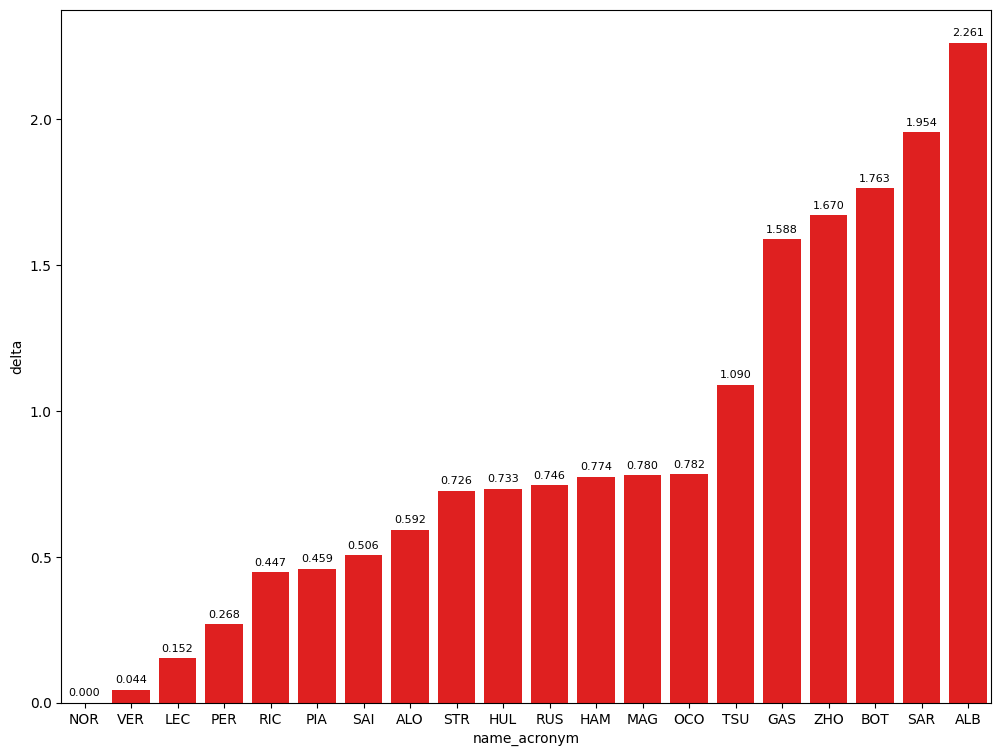

In [540]:
obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

In [541]:
def obtain_difference_regard_reference(row,reference,newdataset):
    difference_sector_1 = row.duration_sector_1 - reference.duration_sector_1.iloc[0]
    difference_sector_2 = row.duration_sector_2 - reference.duration_sector_2.iloc[0]
    difference_sector_3 = row.duration_sector_3 - reference.duration_sector_3.iloc[0]
    lap_duration = row.lap_duration - reference.lap_duration.iloc[0]
    new_row = {'driver_number':row.driver_number,'lap_duration':lap_duration,'difference_sector_1':difference_sector_1 ,'difference_sector_2':difference_sector_2,'difference_sector_3':difference_sector_3,'name_acronym':row.name_acronym   }
    
    newdataset =pd.concat([newdataset, pd.DataFrame([new_row])], ignore_index=True)
    return newdataset

In [542]:
# Function done to obtain more information about the qualyfing session
def obtainInfoAboutQualySession(dataset,fecha):
    sessiondataset =dataset.query(fecha).sort_values(by='lap_duration')
    isFastestLap = []
    for index,row in sessiondataset.iterrows():
        driver = row.driver_number
        fastest_lap = sessiondataset.query("driver_number == @driver").lap_duration.min()
        if row.lap_duration == fastest_lap:
            isFastestLap.append(True)
        else:
            isFastestLap.append(False)
    sessiondataset['isFastestLap'] = isFastestLap
    return sessiondataset

In [543]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
0            1234           9502             24       220       189       333   
1            1234           9502             24       221       190       338   
2            1234           9502             77       216       192       322   
3            1234           9502             77       221       191       340   
4            1234           9502             77       220       191       338   
..            ...            ...            ...       ...       ...       ...   
67           1234           9502             22       221       191       334   
68           1234           9502              2       220       189       344   
69           1234           9502              2       216       188       343   
70           1234           9502             23       219       188       342   
71           1234           9502             10       219       189       336   

                          date_start  lap_duration  is_pit_out_lap  \
0   2024-05-03T20:32:35.093000+00:00        89.705           False   
1   2024-05-03T20:36:00.365000+00:00        89.267           False   
2   2024-05-03T20:32:38.734000+00:00        90.060           False   
3   2024-05-03T20:36:03.125000+00:00        89.545           False   
4   2024-05-03T20:39:32.553000+00:00        89.360           False   
..                               ...           ...             ...   
67  2024-05-03T20:40:31.729000+00:00        88.687           False   
68  2024-05-03T20:35:19.150000+00:00        89.551           False   
69  2024-05-03T20:41:04.780000+00:00        90.035           False   
70  2024-05-03T20:35:23.394000+00:00        89.858           False   
71  2024-05-03T20:39:50.219000+00:00        89.185           False   

    duration_sector_1  ...  meeting_key_y  broadcast_name country_code  \
0              30.157  ...           1234          G ZHOU          CHN   
1              29.733  ...           1234          G ZHOU          CHN   
2              30.322  ...           1234        V BOTTAS          FIN   
3              30.063  ...           1234        V BOTTAS          FIN   
4              29.968  ...           1234        V BOTTAS          FIN   
..                ...  ...            ...             ...          ...   
67             29.799  ...           1234       Y TSUNODA          JPN   
68             30.214  ...           1234      L SARGEANT          USA   
69             31.046  ...           1234      L SARGEANT          USA   
70             30.210  ...           1234         A ALBON          THA   
71             29.683  ...           1234         P GASLY          FRA   

   first_name        full_name  \
0      Guanyu      ZHOU Guanyu   
1      Guanyu      ZHOU Guanyu   
2    Valtteri  Valtteri BOTTAS   
3    Valtteri  Valtteri BOTTAS   
4    Valtteri  Valtteri BOTTAS   
..        ...              ...   
67       Yuki     Yuki TSUNODA   
68      Logan   Logan SARGEANT   
69      Logan   Logan SARGEANT   
70  Alexander  Alexander ALBON   
71     Pierre     Pierre GASLY   

                                         headshot_url  last_name  team_colour  \
0   https://media.formula1.com/d_driver_fallback_i...       Zhou       52E252   
1   https://media.formula1.com/d_driver_fallback_i...       Zhou       52E252   
2   https://media.formula1.com/d_driver_fallback_i...     Bottas       52E252   
3   https://media.formula1.com/d_driver_fallback_i...     Bottas       52E252   
4   https://media.formula1.com/d_driver_fallback_i...     Bottas       52E252   
..                                                ...        ...          ...   
67  https://media.formula1.com/d_driver_fallback_i...    Tsunoda       6692FF   
68  https://media.formula1.com/d_driver_fallback_i...   Sargeant       64C4FF   
69  https://media.formula1.com/d_driver_fallback_i...   Sargeant       64C4FF   
70  https://media.formula1.com/d_driver_fallback_i...      Albon       64C4FF   
7

In [544]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-05-03T20:49:01+00:00'"
maximumDateQ2 = "date_start <'2024-05-03T21:06:00+00:00' and date_start >='2024-05-03T20:49:01+00:00'"
maximumDateQ3 = "date_start >'2024-05-03T21:06:00+00:00'"

### Sprint Qualyfing 1

In [545]:
q1Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
21           1234           9502              4       222       192       338   
38           1234           9502             81       218       192       341   
11           1234           9502             14       219       192       337   
34           1234           9502              1       219       191       340   
51           1234           9502             20       219       191       340   
63           1234           9502             63       219       191       336   
16           1234           9502             55       221       192       338   
29           1234           9502             16       220       187       340   
24           1234           9502             11       223       191       340   
67           1234           9502             22       221       191       334   
59           1234           9502              3       220       191       336   
55           1234           9502             44       221       189       335   
6            1234           9502             18       221       186       336   
47           1234           9502             31       219       190       339   
42           1234           9502             27       210       191       343   
71           1234           9502             10       219       189       336   
1            1234           9502             24       221       190       338   
4            1234           9502             77       220       191       338   
68           1234           9502              2       220       189       344   
70           1234           9502             23       219       188       342   

                          date_start  lap_duration  is_pit_out_lap  \
21  2024-05-03T20:38:55.444000+00:00        87.939           False   
38  2024-05-03T20:41:35.401000+00:00        88.056           False   
11  2024-05-03T20:41:29.515000+00:00        88.192           False   
34  2024-05-03T20:39:21.245000+00:00        88.194           False   
51  2024-05-03T20:40:00.607000+00:00        88.377           False   
63  2024-05-03T20:40:58.582000+00:00        88.387           False   
16  2024-05-03T20:40:11.638000+00:00        88.435           False   
29  2024-05-03T20:40:51.931000+00:00        88.537           False   
24  2024-05-03T20:33:35.027000+00:00        88.681           False   
67  2024-05-03T20:40:31.729000+00:00        88.687           False   
59  2024-05-03T20:40:36.660000+00:00        88.700           False   
55  2024-05-03T20:40:42.031000+00:00        88.736           False   
6   2024-05-03T20:41:23.864000+00:00        88.807           False   
47  2024-05-03T20:39:40.670000+00:00        88.873           False   
42  2024-05-03T20:40:46.290000+00:00        89.040           False   
71  2024-05-03T20:39:50.219000+00:00        89.185           False   
1   2024-05-03T20:36:00.365000+00:00        89.267           False   
4   2024-05-03T20:39:32.553000+00:00        89.360           False   
68  2024-05-03T20:35:19.150000+00:00        89.551           False   
70  2024-05-03T20:35:23.394000+00:00        89.858           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
21             29.441  ...        L NORRIS           GBR      Lando   
38             29.366  ...       O PIASTRI           AUS      Oscar   
11             29.299  ...        F ALONSO           ESP   Fernando   
34             29.522  ...    M VERSTAPPEN           NED        Max   
51             29.569  ...     K MAGNUSSEN           DEN      Kevin   
63             29.370  ...       G RUSSELL           GBR     George   
16             29.435  ...         C SAINZ           ESP     Carlos   
29             29.486  ...       C LECLERC           MON    Charles   
24             29.614  ...         S PEREZ           MEX     Sergio   
67             29.799  ...       Y TSUNODA           JPN       Yuki   
59             29.615  ...     D RICCIARDO        

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [546]:
#Reference
P15 = q1Data[14:15]
P15

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
42           1234           9502             27       210       191       343   

                          date_start  lap_duration  is_pit_out_lap  \
42  2024-05-03T20:40:46.290000+00:00         89.04           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
42              29.67  ...    N HULKENBERG           GER       Nico   

          full_name                                       headshot_url  \
42  Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   

     last_name  team_colour     team_name name_acronym isFastestLap  
42  Hulkenberg       B6BABD  Haas F1 Team          HUL         True  

[1 rows x 28 columns]

In [547]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Nico HULKENBERG Sector 1:  29.67 Sector 2:  34.404 Sector 3:  24.966


In [548]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             10         0.145                0.013               -0.217   
1             24         0.227                0.063               -0.140   
2             77         0.320                0.298               -0.410   
3              2         0.511                0.544               -0.124   
4             23         0.818                0.540               -0.027   

   difference_sector_3 name_acronym  
0                0.349          GAS  
1                0.304          ZHO  
2                0.432          BOT  
3                0.091          SAR  
4                0.305          ALB

### Best sector per driver

In [549]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
ALO                      29.299
PIA                      29.366
RUS                      29.370
SAI                      29.435
NOR                      29.441
HAM                      29.469
LEC                      29.486
VER                      29.522
MAG                      29.569
PER                      29.614
RIC                      29.615
STR                      29.618
OCO                      29.630
HUL                      29.670
GAS                      29.683
ZHO                      29.733
TSU                      29.799
BOT                      29.968
ALB                      30.210
SAR                      30.214

In [550]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
NOR                      33.439
VER                      33.623
PIA                      33.701
ALO                      33.702
TSU                      33.735
MAG                      33.775
RUS                      33.849
RIC                      33.860
LEC                      33.880
STR                      33.909
SAI                      33.953
BOT                      33.994
OCO                      34.017
PER                      34.064
HAM                      34.101
GAS                      34.187
ZHO                      34.264
SAR                      34.280
ALB                      34.377
HUL                      34.404

In [551]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
HUL                      24.966
PIA                      24.989
PER                      25.003
MAG                      25.033
SAI                      25.047
VER                      25.049
SAR                      25.057
NOR                      25.059
TSU                      25.153
HAM                      25.166
RUS                      25.168
LEC                      25.171
ALO                      25.191
RIC                      25.225
OCO                      25.226
ZHO                      25.270
ALB                      25.271
STR                      25.280
GAS                      25.315
BOT                      25.398

### Sprint Qualyfing 2

In [552]:
q2Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
22           1234           9502              4       223       192       339   
25           1234           9502             11       221       191       341   
30           1234           9502             16       223       191       337   
35           1234           9502              1       221       191       339   
60           1234           9502              3       221       190       335   
39           1234           9502             81       217       191       337   
12           1234           9502             14       219       192       335   
18           1234           9502             55       222       192       337   
7            1234           9502             18       220       192       340   
43           1234           9502             27       220       192       340   
64           1234           9502             63       222       191       334   
56           1234           9502             44       221       191       332   
48           1234           9502             31       220       191       338   
52           1234           9502             20       218       191       339   

                          date_start  lap_duration  is_pit_out_lap  \
22  2024-05-03T20:52:53.980000+00:00        87.597           False   
25  2024-05-03T20:51:20.473000+00:00        87.865           False   
30  2024-05-03T20:52:13.574000+00:00        87.977           False   
35  2024-05-03T20:56:55.270000+00:00        88.001           False   
60  2024-05-03T20:51:46.715000+00:00        88.122           False   
39  2024-05-03T20:52:44.149000+00:00        88.163           False   
12  2024-05-03T20:51:57.751000+00:00        88.189           False   
18  2024-05-03T20:58:07.311000+00:00        88.262           False   
7   2024-05-03T20:51:30.151000+00:00        88.323           False   
43  2024-05-03T20:51:12.194000+00:00        88.330           False   
64  2024-05-03T20:52:36.333000+00:00        88.343           False   
56  2024-05-03T20:52:21.747000+00:00        88.371           False   
48  2024-05-03T20:52:05.214000+00:00        88.379           False   
52  2024-05-03T20:51:02.403000+00:00        88.614           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
22             29.112  ...        L NORRIS           GBR      Lando   
25             29.367  ...         S PEREZ           MEX     Sergio   
30             29.365  ...       C LECLERC           MON    Charles   
35             29.279  ...    M VERSTAPPEN           NED        Max   
60             29.338  ...     D RICCIARDO           AUS     Daniel   
39             29.227  ...       O PIASTRI           AUS      Oscar   
12             29.472  ...        F ALONSO           ESP   Fernando   
18             29.313  ...         C SAINZ           ESP     Carlos   
7              29.544  ...        L STROLL           CAN      Lance   
43             29.491  ...    N HULKENBERG           GER       Nico   
64             29.317  ...       G RUSSELL           GBR     George   
56             29.242  ...      L HAMILTON           GBR      Lewis   
48             29.501  ...          E OCON           FRA    Esteban   
52             29.898  ...     K MAGNUSSEN           DEN      Kevin   

           full_name                                       headshot_url  \
22      Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
25      Sergio PEREZ  https://media.formula1.com/d_driver_fallback_i...   
30   Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
35    Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
60  Daniel RICCIARDO  https://media.formula1.com/d_driver_fallback_i...   
39     Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
12   Fernando ALONSO  https://media.formula1.com/d_driver_fallback_i...   
18      Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [553]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Nico HULKENBERG Sector 1:  29.491 Sector 2:  33.872 Sector 3:  24.967


In [554]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             63         0.013               -0.174               -0.004   
1             44         0.041               -0.249                0.085   
2             31         0.049                0.010               -0.013   
3             20         0.284                0.407               -0.128   

   difference_sector_3 name_acronym  
0                0.191          RUS  
1                0.205          HAM  
2                0.052          OCO  
3                0.005          MAG

### Best sector per driver

In [555]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
NOR                      29.112
PIA                      29.227
HAM                      29.242
VER                      29.279
SAI                      29.313
RUS                      29.317
RIC                      29.338
LEC                      29.365
PER                      29.367
ALO                      29.472
HUL                      29.491
OCO                      29.501
STR                      29.544
MAG                      29.898

In [556]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
NOR                      33.438
PER                      33.514
ALO                      33.596
LEC                      33.597
RIC                      33.634
PIA                      33.651
VER                      33.719
STR                      33.725
MAG                      33.744
OCO                      33.859
SAI                      33.866
RUS                      33.868
HUL                      33.872
HAM                      33.957

In [557]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
HUL                      24.967
MAG                      24.972
PER                      24.984
VER                      25.003
LEC                      25.015
OCO                      25.019
NOR                      25.047
STR                      25.054
SAI                      25.083
ALO                      25.121
RIC                      25.150
RUS                      25.158
HAM                      25.172
PIA                      25.285

### Sprint Qualyfing 3

In [558]:
q3Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
36           1234           9502              1       219       191       337   
32           1234           9502             16       223       192       336   
26           1234           9502             11       221       190       340   
61           1234           9502              3       222       190       334   
19           1234           9502             55       225       193       336   
40           1234           9502             81       220       191       336   
9            1234           9502             18       221       192       335   
13           1234           9502             14       213       193       333   
23           1234           9502              4       223       193       338   
45           1234           9502             27       223       191       339   

                          date_start  lap_duration  is_pit_out_lap  \
36  2024-05-03T21:12:32.824000+00:00        87.641           False   
32  2024-05-03T21:13:17.105000+00:00        87.749           False   
26  2024-05-03T21:12:13.777000+00:00        87.876           False   
61  2024-05-03T21:12:42.875000+00:00        88.044           False   
19  2024-05-03T21:13:26.601000+00:00        88.103           False   
40  2024-05-03T21:13:37.983000+00:00        88.161           False   
9   2024-05-03T21:12:50.967000+00:00        88.375           False   
13  2024-05-03T21:13:01.833000+00:00        88.419           False   
23  2024-05-03T21:13:09.666000+00:00        88.472           False   
45  2024-05-03T21:12:02.331000+00:00        88.476           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
36             29.036  ...    M VERSTAPPEN           NED        Max   
32             29.233  ...       C LECLERC           MON    Charles   
26             29.250  ...         S PEREZ           MEX     Sergio   
61             29.266  ...     D RICCIARDO           AUS     Daniel   
19             29.208  ...         C SAINZ           ESP     Carlos   
40             29.575  ...       O PIASTRI           AUS      Oscar   
9              29.541  ...        L STROLL           CAN      Lance   
13             29.469  ...        F ALONSO           ESP   Fernando   
23             29.806  ...        L NORRIS           GBR      Lando   
45             29.712  ...    N HULKENBERG           GER       Nico   

           full_name                                       headshot_url  \
36    Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
32   Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
26      Sergio PEREZ  https://media.formula1.com/d_driver_fallback_i...   
61  Daniel RICCIARDO  https://media.formula1.com/d_driver_fallback_i...   
19      Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   
40     Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
9       Lance STROLL  https://media.formula1.com/d_driver_fallback_i...   
13   Fernando ALONSO  https://media.formula1.com/d_driver_fallback_i...   
23      Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
45   Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   

     last_name  team_colour        team_name name_acronym isFastestLap  
36  Verstappen       3671C6  Red Bull Racing          VER         True  
32     Leclerc       E80020          Ferrari          LEC         True  
26       Perez       3671C6  Red Bull Racing          PER         True  
61   Ricciardo       6692FF               RB          RIC         True  
19       Sainz       E80020          Ferrari          SAI         True  
40     Piastri       FF8000          McLaren          PIA         True  
9       Stroll       229971     Aston Martin          STR         True  
13      Alonso       229971     Aston Martin          ALO         True  
23      Norris       FF8000          McLaren          NOR         True  
45 

In [559]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Max VERSTAPPEN Sector 1:  29.036 Sector 2:  33.644 Sector 3:  24.961


##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [560]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             16         0.108                0.197               -0.074   
1             11         0.235                0.214                0.004   
2              3         0.403                0.230                0.034   
3             55         0.462                0.172               -0.051   
4             81         0.520                0.539               -0.035   
5             18         0.734                0.505                0.190   
6             14         0.778                0.433                0.234   
7              4         0.831                0.770                0.098   
8             27         0.835                0.676                0.075   

   difference_sector_3 name_acronym  
0               -0.015          LEC  
1                0.017          PER  
2                0.139          RIC  
3                0.341          SAI  
4                0.016          PIA  
5                0.039          STR  
6                0.111          ALO  
7               -0.037          NOR  
8                0.084          HUL

### Best sector per driver

In [561]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
VER                      29.036
SAI                      29.208
LEC                      29.233
PER                      29.250
RIC                      29.266
ALO                      29.469
STR                      29.541
PIA                      29.575
HUL                      29.712
NOR                      29.806

In [562]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
LEC                      33.570
SAI                      33.593
PIA                      33.609
VER                      33.644
PER                      33.648
RIC                      33.678
HUL                      33.719
NOR                      33.742
STR                      33.834
ALO                      33.878

In [563]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
NOR                      24.924
LEC                      24.946
VER                      24.961
PIA                      24.977
PER                      24.978
STR                      25.000
HUL                      25.045
ALO                      25.072
RIC                      25.100
SAI                      25.302

### Best sector in the session

In [564]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
VER                      29.036
NOR                      29.112
SAI                      29.208
PIA                      29.227
LEC                      29.233
HAM                      29.242
PER                      29.250
RIC                      29.266
ALO                      29.299
RUS                      29.301
OCO                      29.372
HUL                      29.491
STR                      29.541
MAG                      29.569
TSU                      29.609
GAS                      29.683
ZHO                      29.733
BOT                      29.968
ALB                      30.210
SAR                      30.214

In [565]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
NOR                      33.438
PER                      33.514
LEC                      33.570
SAI                      33.593
ALO                      33.596
PIA                      33.609
VER                      33.623
RIC                      33.634
HUL                      33.719
STR                      33.725
TSU                      33.735
MAG                      33.744
RUS                      33.849
OCO                      33.859
HAM                      33.957
BOT                      33.994
SAR                      34.041
ZHO                      34.093
GAS                      34.187
ALB                      34.377

In [566]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
NOR                      24.924
LEC                      24.946
SAR                      24.948
VER                      24.961
HUL                      24.966
MAG                      24.972
PIA                      24.977
PER                      24.978
STR                      25.000
OCO                      25.019
SAI                      25.047
ALO                      25.072
RIC                      25.100
RUS                      25.134
TSU                      25.153
HAM                      25.166
BOT                      25.266
ZHO                      25.270
ALB                      25.271
GAS                      25.315

## Sprint

In [567]:
session_key = 'session_key=9506'
url = 'https://api.openf1.org/v1/laps?'
urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
sprint = pd.DataFrame(data)
sprint

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0           1234         9506              1     216.0       188       158   
1           1234         9506              2     214.0        49       183   
2           1234         9506              3     212.0       188       176   
3           1234         9506             10     213.0        56       151   
4           1234         9506             11     215.0       189       158   
..           ...          ...            ...       ...       ...       ...   
338         1234         9506             44     210.0       186       318   
339         1234         9506             55     213.0       187       330   
340         1234         9506             63     210.0       186       325   
341         1234         9506             77     214.0       186       335   
342         1234         9506             81     214.0       185       345   

                           date_start  lap_duration  is_pit_out_lap  \
0                                None           NaN           False   
1                                None           NaN           False   
2                                None           NaN           False   
3                                None           NaN           False   
4                                None           NaN           False   
..                                ...           ...             ...   
338  2024-05-04T16:34:09.120000+00:00        92.110           False   
339  2024-05-04T16:33:55.332000+00:00        91.814           False   
340  2024-05-04T16:34:14.503000+00:00        93.150           False   
341  2024-05-04T16:34:15.939000+00:00        92.747           False   
342  2024-05-04T16:33:56.181000+00:00        91.393           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
0                  NaN             34.705             50.505   
1                  NaN             41.811             61.335   
2                  NaN             35.230             53.968   
3                  NaN             41.431             61.209   
4                  NaN             35.253             55.332   
..                 ...                ...                ...   
338             30.637             35.367             26.106   
339             30.879             35.125             25.810   
340             31.732             35.693             25.725   
341             31.541             35.605             25.601   
342             30.675             35.038             25.680   

                                     segments_sector_1  \
0    [2064, 2049, 2051, 2049, 2049, 2051, 2051, 205...   
1    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
2    [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3    [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4    [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
338  [None, 2049, 2048, 2048, 2048, 2048, 2048, 204...   
339  [None, 2048, 2048, 2048, 2049, 2049, 2048, 204...   
340  [2049, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
341  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
342  [None, 2049, 2048, 2049, 2051, 2049, 2048, 204...   

                                     segments_sector_2  \
0    [2049, 2049, 2049, 2049, 2049, 2051, 2051, 205...   
1    [2049, 2051, 2051, 2051, 2049, 2049, 2049, 204...   
2    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
338  [2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...   
339  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
340  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
341  [2048, 2048, 2048, 2049, 2048, 2048, 2048, 204...   
342  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                              segments_sector_3  lap

In [568]:
#Stints
url = 'https://api.openf1.org/v1/stints?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
stintInformation = pd.DataFrame(data)
stintInformation

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1234         9506             1              1          1        1   
1          1234         9506             1              2          1        1   
2          1234         9506             1              3          1        1   
3          1234         9506             1              4          1        1   
4          1234         9506             1             10          1        1   
5          1234         9506             1             11          1        1   
6          1234         9506             1             14          1        1   
7          1234         9506             1             16          1        1   
8          1234         9506             1             20          1        1   
9          1234         9506             1             22          1        1   
10         1234         9506             1             23          1        1   
11         1234         9506             1             24          1        1   
12         1234         9506             1             27          1        1   
13         1234         9506             1             31          1        1   
14         1234         9506             1             44          1        1   
15         1234         9506             1             55          1        1   
16         1234         9506             1             63          1        1   
17         1234         9506             1             77          1        1   
18         1234         9506             1             81          1        1   
19         1234         9506             1             18          1        2   
20         1234         9506             2              1          2        2   
21         1234         9506             2              2          2        2   
22         1234         9506             2              3          2        2   
23         1234         9506             2             10          2        2   
24         1234         9506             2             11          2        2   
25         1234         9506             2             14          2        2   
26         1234         9506             2             16          2        2   
27         1234         9506             2             20          2        2   
28         1234         9506             2             22          2        2   
29         1234         9506             2             23          2        2   
30         1234         9506             2             24          2        2   
31         1234         9506             2             27          2        2   
32         1234         9506             2             31          2        2   
33         1234         9506             2             44          2        2   
34         1234         9506             2             55          2        2   
35         1234         9506             2             63          2        2   
36         1234         9506             2             77          2        2   
37         1234         9506             2             81          2        2   
38         1234         9506             3             14          3       18   
39         1234         9506             3              1          3       20   
40         1234         9506             3              2          3       20   
41         1234         9506             3              3          3       20   
42         1234         9506             3             10          3       20   
43         1234         9506             3             11          3       20   
44         1234         9506             3             16          3       20   
45         1234         9506             3             20          3       20   
46         1234         9506             3             22          3       20   
47         1234         9506             3             23          3       20   
48         1234         9506       

In [569]:
stintsDataFrame =stint_configuration(stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
jointables

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0           1208         9078              1     212.0       186       306   
1           1208         9078              2     202.0       183       272   
2           1208         9078              4     202.0       184       266   
3           1208         9078             10     213.0       184       299   
4           1208         9078             11     212.0       186       297   
..           ...          ...            ...       ...       ...       ...   
338         1208         9078             44     209.0       185       329   
339         1208         9078             55     214.0       187       328   
340         1208         9078             63     214.0       186       319   
341         1208         9078             77     215.0       188       308   
342         1208         9078             81     209.0       186       306   

                           date_start  lap_duration  is_pit_out_lap  \
0                                None           NaN           False   
1                                None           NaN           False   
2                                None           NaN           False   
3                                None           NaN           False   
4                                None           NaN           False   
..                                ...           ...             ...   
338  2023-05-07T20:03:39.397000+00:00        93.390           False   
339  2023-05-07T20:03:39.709000+00:00        92.209           False   
340  2023-05-07T20:03:44.896000+00:00        92.456           False   
341  2023-05-07T20:03:57.959000+00:00        92.981           False   
342  2023-05-07T20:04:02.365000+00:00        94.056           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
0                  NaN             36.216             26.263   
1                  NaN             38.209             26.488   
2                  NaN             38.745                NaN   
3                  NaN             35.744             26.425   
4                  NaN             35.141             26.229   
..                 ...                ...                ...   
338             32.336             35.142             25.912   
339             31.268             35.027             25.914   
340             31.675             35.074             25.707   
341             31.639             35.296             26.046   
342             32.185             35.551             26.320   

                                     segments_sector_1  \
0    [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
1    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
2    [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3    [2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4    [2064, 2049, 2051, 2051, 2049, 2051, 2051, 204...   
..                                                 ...   
338  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
339  [2049, 2048, 2048, 2049, 2048, 2048, 2049, 204...   
340  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
341  [None, 2048, 2048, 2048, 2048, 2049, 2048, 204...   
342  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                                     segments_sector_2  \
0    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
1    [2049, 2049, 2049, 2051, 2049, 2049, 2049, 204...   
2    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
3    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4    [2049, 2049, 2049, 2049, 2049, 2051, 2051, 205...   
..                                                 ...   
338  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
339  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
340  [2049, 2049, 2049, 2049, 2049, 2048, 2048, 204...   
341  [2048, 2048, 2048, 2048, 2048, 2049, 2048, 204...   
342  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                              segments_sector_3  lap

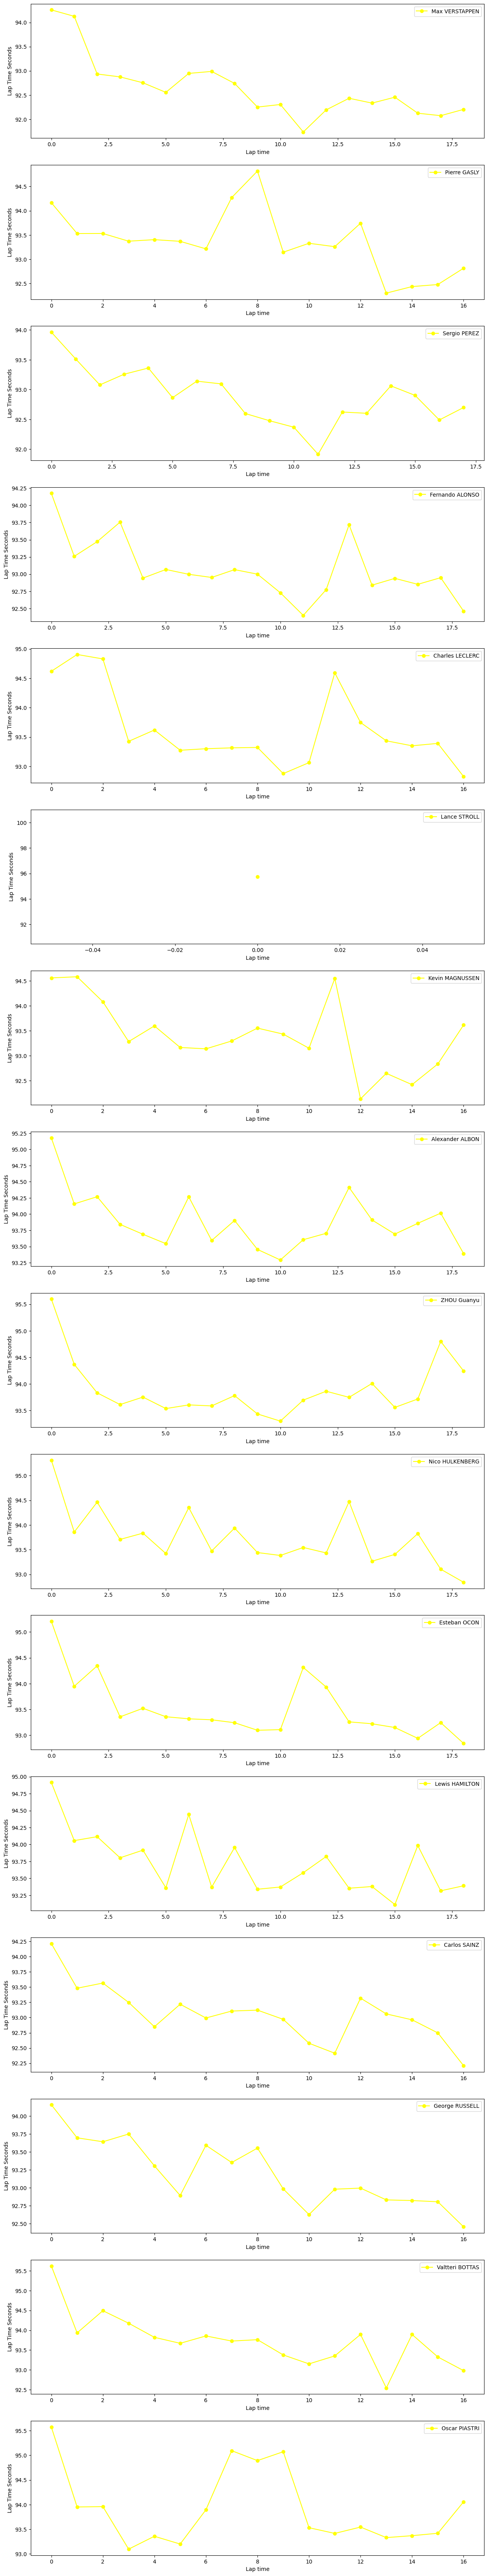

In [570]:
obtain_data_tyres(jointables,"MEDIUM",False)

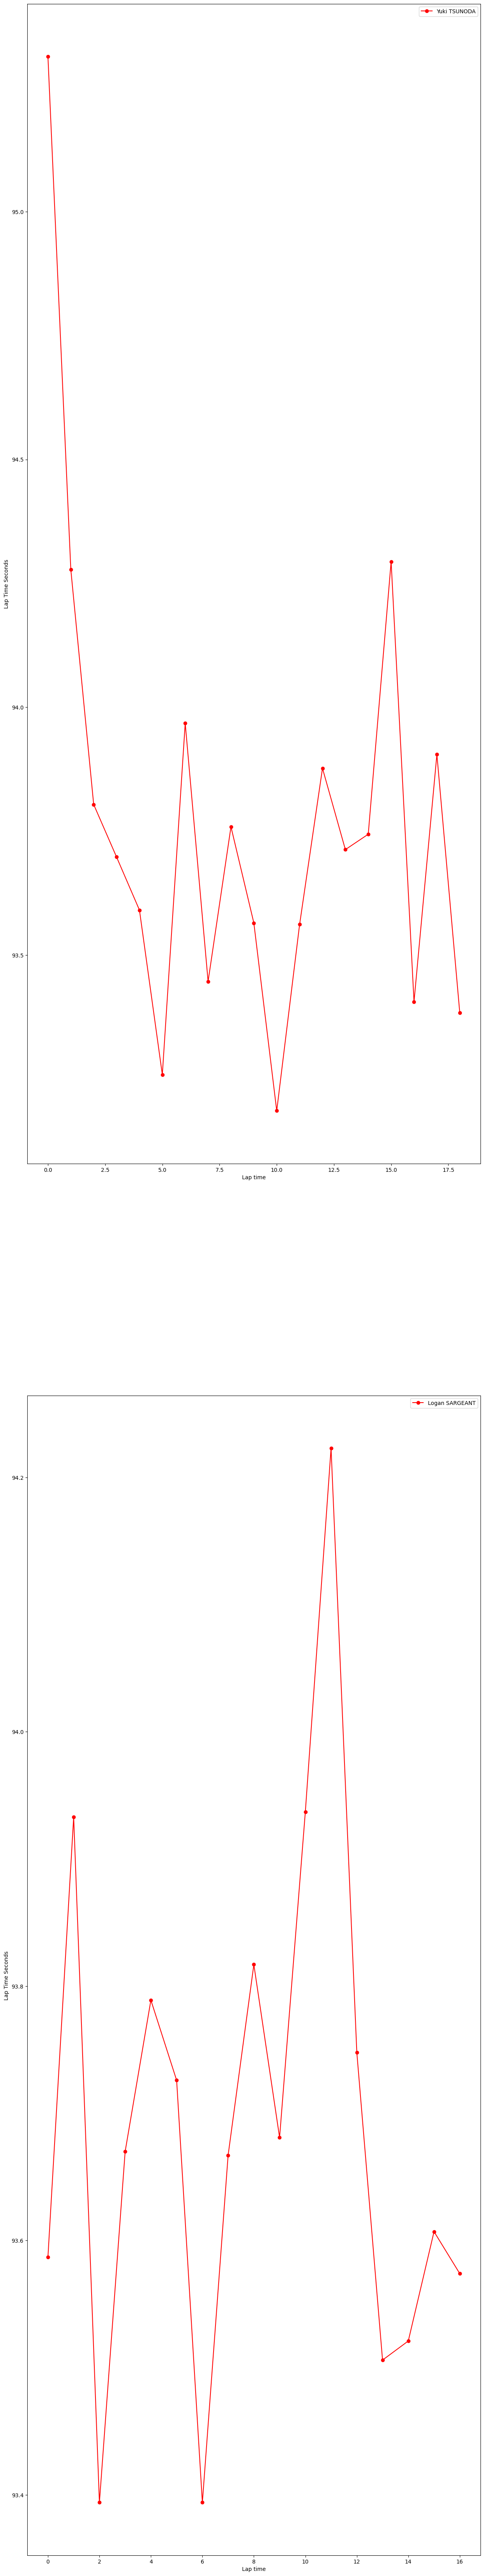

In [571]:
obtain_data_tyres(jointables,"SOFT",False)

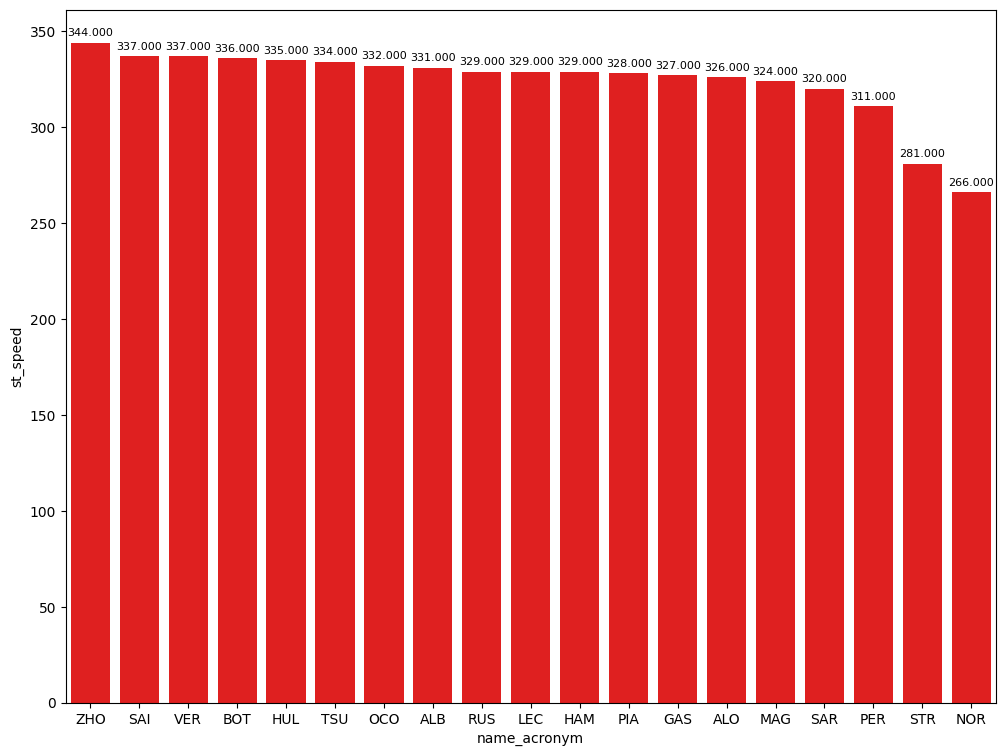

In [572]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("name_acronym","st_speed",top_speed)

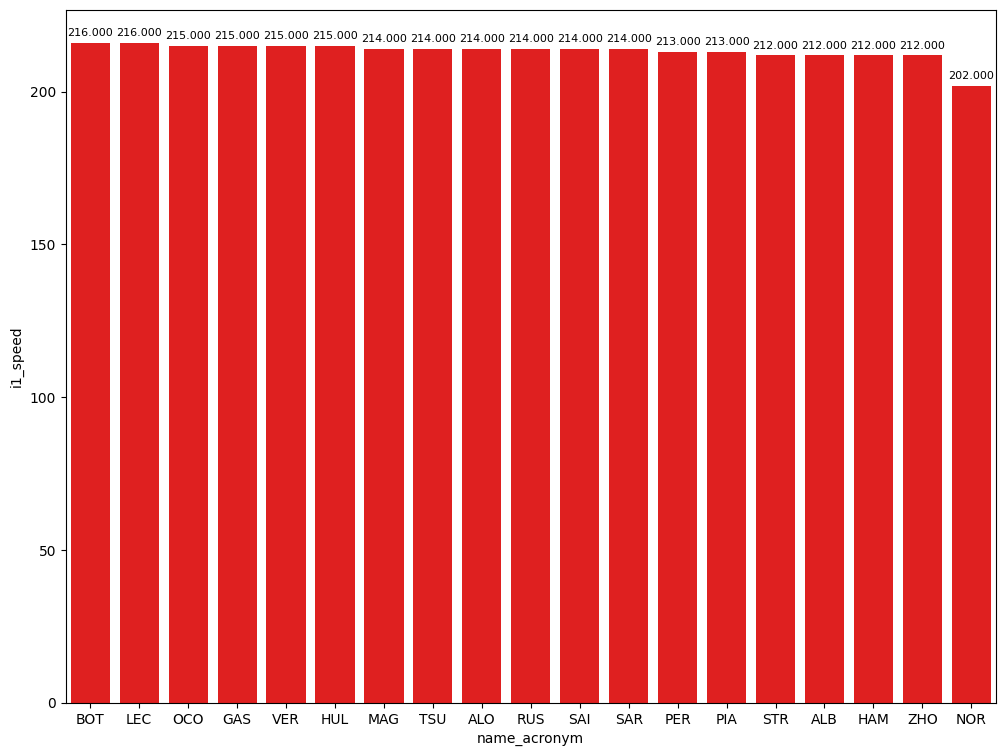

In [573]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("name_acronym","i1_speed",top_speed)

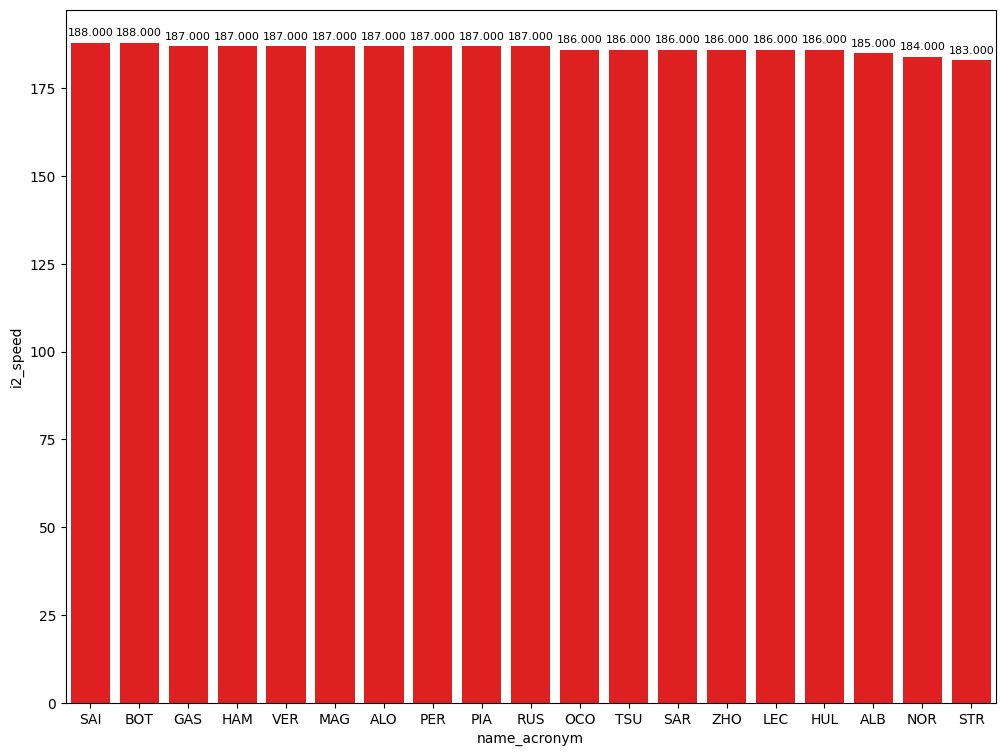

In [574]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("name_acronym","i2_speed",top_speed)

In [575]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
team_name                    
Red Bull Racing     92.695667
Aston Martin        93.103800
Ferrari             93.377600
Alpine              93.415654
Mercedes            93.497844
Haas F1 Team        93.516233
McLaren             93.676083
Kick Sauber         93.742615
RB                  93.744800
Williams            93.768966

In [576]:
def obtain_race_pace(dataset,array):
    fastest_lap = dataset.lap_duration.min()
    for row in dataset.iterrows():
        lap = row[1][0]
        delta = lap-fastest_lap
        array.append(delta)
    return array
arr= obtain_race_pace(race_pace,[])
race_pace.insert(1,'delta',arr)

### Race peace per teams

In [577]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

duration_sector_1
team_name                         
Red Bull Racing          31.653367
Aston Martin             31.837267
McLaren                  31.865333
Haas F1 Team             31.967033
Ferrari                  32.073567
Alpine                   32.082115
Mercedes                 32.129188
Kick Sauber              32.164808
Williams                 32.262034
RB                       32.305667

In [578]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

duration_sector_2
team_name                         
Red Bull Racing          35.103567
Aston Martin             35.340133
Alpine                   35.342462
Ferrari                  35.355300
Mercedes                 35.369875
RB                       35.464867
Haas F1 Team             35.481733
Williams                 35.487759
McLaren                  35.509167
Kick Sauber              35.586885

In [579]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

duration_sector_3
team_name                         
Aston Martin             25.926400
Red Bull Racing          25.938733
Ferrari                  25.948733
RB                       25.974267
Kick Sauber              25.990923
Alpine                   25.991077
Mercedes                 25.998781
Williams                 26.019172
Haas F1 Team             26.067467
McLaren                  26.301583

#### Red Bull Racing

In [580]:
stintInformation.query('driver_number == 1 or driver_number == 11')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1234         9506             1              1          1        1   
5          1234         9506             1             11          1        1   
20         1234         9506             2              1          2        2   
24         1234         9506             2             11          2        2   
39         1234         9506             3              1          3       20   
43         1234         9506             3             11          3       20   

   compound  tyre_age_at_start  
0    MEDIUM                  3  
5    MEDIUM                  3  
20   MEDIUM                  4  
24   MEDIUM                  4  
39   MEDIUM                  0  
43   MEDIUM                  5

In [581]:
getinfolonglaps(jointables,1,'Red Bull Racing')

full_name compound                        date_start  lap_number  \
19   Max VERSTAPPEN   MEDIUM  2023-05-07T19:35:29.666000+00:00           2   
37   Max VERSTAPPEN   MEDIUM  2023-05-07T19:37:03.805000+00:00           3   
54   Max VERSTAPPEN   MEDIUM  2023-05-07T19:38:38.085000+00:00           4   
71   Max VERSTAPPEN   MEDIUM  2023-05-07T19:40:10.897000+00:00           5   
88   Max VERSTAPPEN   MEDIUM  2023-05-07T19:41:43.880000+00:00           6   
105  Max VERSTAPPEN   MEDIUM  2023-05-07T19:43:16.551000+00:00           7   
122  Max VERSTAPPEN   MEDIUM  2023-05-07T19:44:49.191000+00:00           8   
139  Max VERSTAPPEN   MEDIUM  2023-05-07T19:46:22.018000+00:00           9   
156  Max VERSTAPPEN   MEDIUM  2023-05-07T19:47:55.063000+00:00          10   
173  Max VERSTAPPEN   MEDIUM  2023-05-07T19:49:27.859000+00:00          11   
190  Max VERSTAPPEN   MEDIUM  2023-05-07T19:51:00.015000+00:00          12   
207  Max VERSTAPPEN   MEDIUM  2023-05-07T19:52:32.388000+00:00          13   
224  Max VERSTAPPEN   MEDIUM  2023-05-07T19:54:04.044000+00:00          14   
241  Max VERSTAPPEN   MEDIUM  2023-05-07T19:55:36.215000+00:00          15   
258  Max VERSTAPPEN   MEDIUM  2023-05-07T19:57:08.651000+00:00          16   
275  Max VERSTAPPEN   MEDIUM  2023-05-07T19:58:41.103000+00:00          17   
292  Max VERSTAPPEN   MEDIUM  2023-05-07T20:00:13.540000+00:00          18   
309  Max VERSTAPPEN   MEDIUM  2023-05-07T20:01:45.726000+00:00          19   
326  Max VERSTAPPEN   MEDIUM  2023-05-07T20:03:17.756000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
19              32.857             35.277             26.126        94.260  
37              32.337             35.896             25.894        94.127  
54              32.042             34.996             25.897        92.935  
71              32.029             34.998             25.848        92.875  
88              31.893             35.037             25.823        92.753  
105             31.915             34.921             25.719        92.555  
122             32.196             35.116             25.635        92.947  
139             31.890             35.221             25.877        92.988  
156             31.796             35.097             25.847        92.740  
173             31.481             34.914             25.856        92.251  
190             31.628             34.885             25.791        92.304  
207             31.561             34.698             25.477        91.736  
224             31.857             34.654             25.682        92.193  
241             31.829             34.712             25.892        92.433  
258             31.530             34.973             25.830        92.333  
275             31.531             35.006             25.918        92.455  
292             31.411             34.878             25.835        92.124  
309             31.341             34.978             25.754        92.073  
326             31.391             34.966             25.846        92.203

In [582]:
getinfolonglaps(jointables,11,'Red Bull Racing')

full_name compound                        date_start  lap_number  \
22   Sergio PEREZ   MEDIUM  2023-05-07T19:35:24.119000+00:00           2   
40   Sergio PEREZ   MEDIUM  2023-05-07T19:36:58.008000+00:00           3   
57   Sergio PEREZ   MEDIUM  2023-05-07T19:38:31.632000+00:00           4   
74   Sergio PEREZ   MEDIUM  2023-05-07T19:40:04.616000+00:00           5   
91   Sergio PEREZ   MEDIUM  2023-05-07T19:41:37.958000+00:00           6   
108  Sergio PEREZ   MEDIUM  2023-05-07T19:43:11.317000+00:00           7   
125  Sergio PEREZ   MEDIUM  2023-05-07T19:44:44.175000+00:00           8   
142  Sergio PEREZ   MEDIUM  2023-05-07T19:46:17.315000+00:00           9   
159  Sergio PEREZ   MEDIUM  2023-05-07T19:47:50.423000+00:00          10   
176  Sergio PEREZ   MEDIUM  2023-05-07T19:49:23.016000+00:00          11   
193  Sergio PEREZ   MEDIUM  2023-05-07T19:50:55.515000+00:00          12   
210  Sergio PEREZ   MEDIUM  2023-05-07T19:52:27.889000+00:00          13   
227  Sergio PEREZ   MEDIUM  2023-05-07T19:53:59.794000+00:00          14   
244  Sergio PEREZ   MEDIUM  2023-05-07T19:55:32.402000+00:00          15   
261  Sergio PEREZ   MEDIUM  2023-05-07T19:57:04.995000+00:00          16   
278  Sergio PEREZ   MEDIUM  2023-05-07T19:58:38.072000+00:00          17   
295  Sergio PEREZ   MEDIUM  2023-05-07T20:00:10.977000+00:00          18   
312  Sergio PEREZ   MEDIUM  2023-05-07T20:01:43.539000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              32.190             35.391             26.382        93.963  
40              32.014             35.206             26.296        93.516  
57              31.733             35.097             26.249        93.079  
74              31.757             35.309             26.192        93.258  
91              31.794             35.331             26.237        93.362  
108             31.567             35.148             26.150        92.865  
125             31.725             35.236             26.181        93.142  
142             31.871             35.191             26.034        93.096  
159             31.437             35.195             25.967        92.599  
176             31.472             35.036             25.970        92.478  
193             31.364             34.995             26.011        92.370  
210             31.217             34.860             25.839        91.916  
227             31.444             35.229             25.951        92.624  
244             31.404             35.279             25.920        92.603  
261             31.473             35.568             26.022        93.063  
278             31.541             35.382             25.980        92.903  
295             31.403             35.127             25.961        92.491  
312             31.349             35.390             25.961        92.700

#### Ferrari

In [583]:
stintInformation.query('driver_number == 16 or driver_number == 55')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
7          1234         9506             1             16          1        1   
15         1234         9506             1             55          1        1   
26         1234         9506             2             16          2        2   
34         1234         9506             2             55          2        2   
44         1234         9506             3             16          3       20   
52         1234         9506             3             55          3       20   

   compound  tyre_age_at_start  
7    MEDIUM                  0  
15   MEDIUM                  0  
26   MEDIUM                  0  
34   MEDIUM                  1  
44   MEDIUM                  2  
52   MEDIUM                  2

In [584]:
getinfolonglaps(jointables,16,'Ferrari')

full_name compound                        date_start  lap_number  \
24   Charles LECLERC   MEDIUM  2023-05-07T19:35:28.213000+00:00           2   
42   Charles LECLERC   MEDIUM  2023-05-07T19:37:02.946000+00:00           3   
59   Charles LECLERC   MEDIUM  2023-05-07T19:38:37.867000+00:00           4   
76   Charles LECLERC   MEDIUM  2023-05-07T19:40:12.694000+00:00           5   
93   Charles LECLERC   MEDIUM  2023-05-07T19:41:46.146000+00:00           6   
110  Charles LECLERC   MEDIUM  2023-05-07T19:43:19.738000+00:00           7   
127  Charles LECLERC   MEDIUM  2023-05-07T19:44:52.987000+00:00           8   
144  Charles LECLERC   MEDIUM  2023-05-07T19:46:26.314000+00:00           9   
161  Charles LECLERC   MEDIUM  2023-05-07T19:47:59.657000+00:00          10   
178  Charles LECLERC   MEDIUM  2023-05-07T19:49:32.937000+00:00          11   
195  Charles LECLERC   MEDIUM  2023-05-07T19:51:05.827000+00:00          12   
212  Charles LECLERC   MEDIUM  2023-05-07T19:52:38.920000+00:00          13   
229  Charles LECLERC   MEDIUM  2023-05-07T19:54:13.528000+00:00          14   
246  Charles LECLERC   MEDIUM  2023-05-07T19:55:47.136000+00:00          15   
263  Charles LECLERC   MEDIUM  2023-05-07T19:57:20.588000+00:00          16   
314  Charles LECLERC   MEDIUM  2023-05-07T20:02:19.882000+00:00          19   
331  Charles LECLERC   MEDIUM  2023-05-07T20:03:53.287000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              32.698             35.465             26.457        94.620  
42              32.335             36.471             26.100        94.906  
59              33.473             35.411             25.946        94.830  
76              32.034             35.395             25.997        93.426  
93              32.009             35.630             25.980        93.619  
110             31.981             35.304             25.989        93.274  
127             31.856             35.331             26.113        93.300  
144             31.946             35.314             26.055        93.315  
161             31.996             35.371             25.955        93.322  
178             31.896             35.198             25.782        92.876  
195             32.175             35.271             25.617        93.063  
212             33.304             35.571             25.718        94.593  
229             32.339             35.652             25.756        93.747  
246             32.065             35.360             26.010        93.435  
263             31.823             35.459             26.068        93.350  
314             31.831             35.420             26.140        93.391  
331             31.786             35.040             26.000        92.826

In [585]:
getinfolonglaps(jointables,55,'Ferrari')

full_name compound                        date_start  lap_number  \
33   Carlos SAINZ   MEDIUM  2023-05-07T19:35:26.009000+00:00           2   
50   Carlos SAINZ   MEDIUM  2023-05-07T19:37:00.274000+00:00           3   
67   Carlos SAINZ   MEDIUM  2023-05-07T19:38:33.773000+00:00           4   
84   Carlos SAINZ   MEDIUM  2023-05-07T19:40:07.334000+00:00           5   
101  Carlos SAINZ   MEDIUM  2023-05-07T19:41:40.552000+00:00           6   
118  Carlos SAINZ   MEDIUM  2023-05-07T19:43:13.332000+00:00           7   
135  Carlos SAINZ   MEDIUM  2023-05-07T19:44:46.612000+00:00           8   
152  Carlos SAINZ   MEDIUM  2023-05-07T19:46:19.612000+00:00           9   
169  Carlos SAINZ   MEDIUM  2023-05-07T19:47:52.673000+00:00          10   
186  Carlos SAINZ   MEDIUM  2023-05-07T19:49:25.906000+00:00          11   
203  Carlos SAINZ   MEDIUM  2023-05-07T19:50:58.796000+00:00          12   
220  Carlos SAINZ   MEDIUM  2023-05-07T19:52:31.373000+00:00          13   
237  Carlos SAINZ   MEDIUM  2023-05-07T19:54:03.809000+00:00          14   
254  Carlos SAINZ   MEDIUM  2023-05-07T19:55:37.105000+00:00          15   
271  Carlos SAINZ   MEDIUM  2023-05-07T19:57:10.167000+00:00          16   
288  Carlos SAINZ   MEDIUM  2023-05-07T19:58:43.166000+00:00          17   
339  Carlos SAINZ   MEDIUM  2023-05-07T20:03:39.709000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
33              32.517             35.584             26.114        94.215  
50              32.149             35.187             26.146        93.482  
67              32.183             35.277             26.107        93.567  
84              32.185             35.079             25.985        93.249  
101             31.913             34.982             25.954        92.849  
118             32.082             35.208             25.929        93.219  
135             31.936             35.154             25.903        92.993  
152             31.887             35.248             25.972        93.107  
169             32.064             35.184             25.874        93.122  
186             31.757             35.288             25.926        92.971  
203             31.687             35.057             25.834        92.578  
220             31.670             35.070             25.674        92.414  
237             31.711             35.881             25.727        93.319  
254             31.834             35.521             25.705        93.060  
271             31.717             35.285             25.961        92.963  
288             31.715             35.154             25.879        92.748  
339             31.268             35.027             25.914        92.209

#### Mercedes

In [586]:
stintInformation.query('driver_number == 63 or driver_number == 44')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
14         1234         9506             1             44          1        1   
16         1234         9506             1             63          1        1   
33         1234         9506             2             44          2        2   
35         1234         9506             2             63          2        2   
51         1234         9506             3             44          3       20   
53         1234         9506             3             63          3       20   

   compound  tyre_age_at_start  
14   MEDIUM                  6  
16   MEDIUM                  6  
33   MEDIUM                  7  
35   MEDIUM                  7  
51   MEDIUM                  8  
53   MEDIUM                  8

In [587]:
getinfolonglaps(jointables,63,'Mercedes')

full_name compound                        date_start  lap_number  \
34   George RUSSELL   MEDIUM  2023-05-07T19:35:27.400000+00:00           2   
51   George RUSSELL   MEDIUM  2023-05-07T19:37:01.571000+00:00           3   
68   George RUSSELL   MEDIUM  2023-05-07T19:38:35.257000+00:00           4   
85   George RUSSELL   MEDIUM  2023-05-07T19:40:08.913000+00:00           5   
102  George RUSSELL   MEDIUM  2023-05-07T19:41:42.646000+00:00           6   
119  George RUSSELL   MEDIUM  2023-05-07T19:43:15.942000+00:00           7   
136  George RUSSELL   MEDIUM  2023-05-07T19:44:48.862000+00:00           8   
153  George RUSSELL   MEDIUM  2023-05-07T19:46:22.440000+00:00           9   
170  George RUSSELL   MEDIUM  2023-05-07T19:47:55.813000+00:00          10   
187  George RUSSELL   MEDIUM  2023-05-07T19:49:29.234000+00:00          11   
204  George RUSSELL   MEDIUM  2023-05-07T19:51:02.311000+00:00          12   
221  George RUSSELL   MEDIUM  2023-05-07T19:52:34.967000+00:00          13   
238  George RUSSELL   MEDIUM  2023-05-07T19:54:08.028000+00:00          14   
255  George RUSSELL   MEDIUM  2023-05-07T19:55:40.902000+00:00          15   
272  George RUSSELL   MEDIUM  2023-05-07T19:57:13.745000+00:00          16   
323  George RUSSELL   MEDIUM  2023-05-07T20:02:12.069000+00:00          19   
340  George RUSSELL   MEDIUM  2023-05-07T20:03:44.896000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
34              32.231             35.715             26.209        94.155  
51              32.150             35.467             26.078        93.695  
68              32.526             35.223             25.891        93.640  
85              32.505             35.272             25.971        93.748  
102             32.020             35.158             26.127        93.305  
119             31.640             35.268             25.984        92.892  
136             31.844             35.283             26.464        93.591  
153             32.448             35.196             25.707        93.351  
170             32.251             35.289             26.012        93.552  
187             31.914             35.116             25.954        92.984  
204             31.594             35.069             25.964        92.627  
221             31.846             35.264             25.870        92.980  
238             31.687             35.316             25.992        92.995  
255             31.605             35.280             25.946        92.831  
272             31.628             35.117             26.077        92.822  
323             31.760             35.040             26.005        92.805  
340             31.675             35.074             25.707        92.456

In [588]:
getinfolonglaps(jointables,44,'Mercedes')

full_name compound                        date_start  lap_number  \
32   Lewis HAMILTON   MEDIUM  2023-05-07T19:35:32.213000+00:00           2   
49   Lewis HAMILTON   MEDIUM  2023-05-07T19:37:07.274000+00:00           3   
66   Lewis HAMILTON   MEDIUM  2023-05-07T19:38:41.289000+00:00           4   
83   Lewis HAMILTON   MEDIUM  2023-05-07T19:40:15.397000+00:00           5   
100  Lewis HAMILTON   MEDIUM  2023-05-07T19:41:49.193000+00:00           6   
117  Lewis HAMILTON   MEDIUM  2023-05-07T19:43:23.113000+00:00           7   
134  Lewis HAMILTON   MEDIUM  2023-05-07T19:44:56.472000+00:00           8   
151  Lewis HAMILTON   MEDIUM  2023-05-07T19:46:30.893000+00:00           9   
168  Lewis HAMILTON   MEDIUM  2023-05-07T19:48:04.329000+00:00          10   
185  Lewis HAMILTON   MEDIUM  2023-05-07T19:49:38.281000+00:00          11   
202  Lewis HAMILTON   MEDIUM  2023-05-07T19:51:11.593000+00:00          12   
219  Lewis HAMILTON   MEDIUM  2023-05-07T19:52:44.951000+00:00          13   
236  Lewis HAMILTON   MEDIUM  2023-05-07T19:54:18.528000+00:00          14   
253  Lewis HAMILTON   MEDIUM  2023-05-07T19:55:52.355000+00:00          15   
270  Lewis HAMILTON   MEDIUM  2023-05-07T19:57:25.666000+00:00          16   
287  Lewis HAMILTON   MEDIUM  2023-05-07T19:58:59.025000+00:00          17   
304  Lewis HAMILTON   MEDIUM  2023-05-07T20:00:32.196000+00:00          18   
321  Lewis HAMILTON   MEDIUM  2023-05-07T20:02:06.101000+00:00          19   
338  Lewis HAMILTON   MEDIUM  2023-05-07T20:03:39.397000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
32              32.825             35.618             26.472        94.915  
49              32.688             35.365             26.004        94.057  
66              32.380             35.594             26.141        94.115  
83              32.371             35.367             26.065        93.803  
100             32.541             35.453             25.922        93.916  
117             32.082             35.409             25.869        93.360  
134             32.770             35.610             26.063        94.443  
151             32.173             35.380             25.817        93.370  
168             32.339             35.584             26.032        93.955  
185             32.220             35.346             25.773        93.339  
202             32.067             35.274             26.031        93.372  
219             32.118             35.552             25.913        93.583  
236             32.150             35.719             25.953        93.822  
253             32.123             35.093             26.138        93.354  
270             31.835             35.649             25.895        93.379  
287             31.614             35.579             25.920        93.113  
304             32.722             35.366             25.896        93.984  
321             31.788             35.515             26.013        93.316  
338             32.336             35.142             25.912        93.390

#### Aston Martin

In [589]:
stintInformation.query('driver_number == 14 or driver_number == 18')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
6          1234         9506             1             14          1        1   
19         1234         9506             1             18          1        2   
25         1234         9506             2             14          2        2   
38         1234         9506             3             14          3       18   
56         1234         9506             4             14         19       20   

   compound  tyre_age_at_start  
6    MEDIUM                  5  
19   MEDIUM                  6  
25   MEDIUM                  6  
38   MEDIUM                  7  
56   MEDIUM                 23

In [590]:
getinfolonglaps(jointables,14,'Aston Martin')

full_name compound                        date_start  lap_number  \
23   Fernando ALONSO   MEDIUM  2023-05-07T19:35:25.244000+00:00           2   
41   Fernando ALONSO   MEDIUM  2023-05-07T19:36:59.383000+00:00           3   
58   Fernando ALONSO   MEDIUM  2023-05-07T19:38:32.632000+00:00           4   
75   Fernando ALONSO   MEDIUM  2023-05-07T19:40:06.131000+00:00           5   
92   Fernando ALONSO   MEDIUM  2023-05-07T19:41:39.849000+00:00           6   
109  Fernando ALONSO   MEDIUM  2023-05-07T19:43:12.801000+00:00           7   
126  Fernando ALONSO   MEDIUM  2023-05-07T19:44:45.847000+00:00           8   
143  Fernando ALONSO   MEDIUM  2023-05-07T19:46:18.908000+00:00           9   
160  Fernando ALONSO   MEDIUM  2023-05-07T19:47:51.798000+00:00          10   
177  Fernando ALONSO   MEDIUM  2023-05-07T19:49:24.875000+00:00          11   
194  Fernando ALONSO   MEDIUM  2023-05-07T19:50:57.874000+00:00          12   
211  Fernando ALONSO   MEDIUM  2023-05-07T19:52:30.592000+00:00          13   
228  Fernando ALONSO   MEDIUM  2023-05-07T19:54:03.028000+00:00          14   
245  Fernando ALONSO   MEDIUM  2023-05-07T19:55:35.777000+00:00          15   
262  Fernando ALONSO   MEDIUM  2023-05-07T19:57:09.479000+00:00          16   
279  Fernando ALONSO   MEDIUM  2023-05-07T19:58:42.322000+00:00          17   
296  Fernando ALONSO   MEDIUM  2023-05-07T20:00:15.274000+00:00          18   
313  Fernando ALONSO   MEDIUM  2023-05-07T20:01:48.117000+00:00          19   
330  Fernando ALONSO   MEDIUM  2023-05-07T20:03:21.053000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              32.423             35.580             26.172        94.175  
41              31.962             35.218             26.078        93.258  
58              32.175             35.337             25.960        93.472  
75              32.413             35.340             26.003        93.756  
92              31.753             35.243             25.946        92.942  
109             31.785             35.318             25.964        93.067  
126             31.902             35.179             25.916        92.997  
143             31.854             35.200             25.897        92.951  
160             31.873             35.335             25.857        93.065  
177             31.785             35.312             25.902        92.999  
194             31.639             35.210             25.879        92.728  
211             31.609             34.996             25.794        92.399  
228             31.653             35.258             25.863        92.774  
245             31.868             36.018             25.832        93.718  
262             31.658             35.346             25.835        92.839  
279             31.631             35.254             26.053        92.938  
296             31.488             35.350             26.013        92.851  
313             31.825             35.340             25.783        92.948  
330             31.553             35.115             25.793        92.461

In [591]:
getinfolonglaps(jointables,18,'Aston Martin')

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

#### McLaren

In [592]:
stintInformation.query('driver_number == 4 or driver_number == 81')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1234         9506             1              4          1        1   
18         1234         9506             1             81          1        1   
37         1234         9506             2             81          2        2   
55         1234         9506             3             81          3       20   

   compound  tyre_age_at_start  
3    MEDIUM                  3  
18   MEDIUM                  0  
37   MEDIUM                  1  
55   MEDIUM                  2

In [593]:
getinfolonglaps(jointables,81,'McLaren')

full_name compound                        date_start  lap_number  \
53   Oscar PIASTRI   MEDIUM  2023-05-07T19:37:08.258000+00:00           3   
70   Oscar PIASTRI   MEDIUM  2023-05-07T19:38:42.242000+00:00           4   
121  Oscar PIASTRI   MEDIUM  2023-05-07T19:43:43.191000+00:00           7   
138  Oscar PIASTRI   MEDIUM  2023-05-07T19:45:16.268000+00:00           8   
155  Oscar PIASTRI   MEDIUM  2023-05-07T19:46:49.642000+00:00           9   
172  Oscar PIASTRI   MEDIUM  2023-05-07T19:48:22.813000+00:00          10   
206  Oscar PIASTRI   MEDIUM  2023-05-07T19:51:31.795000+00:00          12   
240  Oscar PIASTRI   MEDIUM  2023-05-07T19:54:41.793000+00:00          14   
257  Oscar PIASTRI   MEDIUM  2023-05-07T19:56:15.339000+00:00          15   
274  Oscar PIASTRI   MEDIUM  2023-05-07T19:57:48.729000+00:00          16   
291  Oscar PIASTRI   MEDIUM  2023-05-07T19:59:22.196000+00:00          17   
308  Oscar PIASTRI   MEDIUM  2023-05-07T20:00:55.633000+00:00          18   
325  Oscar PIASTRI   MEDIUM  2023-05-07T20:02:28.975000+00:00          19   
342  Oscar PIASTRI   MEDIUM  2023-05-07T20:04:02.365000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
53              32.204             35.676             26.072        93.952  
70              32.291             35.661             26.007        93.959  
121             31.710             35.246             26.140        93.096  
138             31.575             35.489             26.293        93.357  
155             31.757             35.306             26.136        93.199  
172             31.730             35.336             26.829        93.895  
206             32.185             35.647             27.061        94.893  
240             31.756             35.572             26.203        93.531  
257             31.604             35.598             26.213        93.415  
274             31.572             35.752             26.220        93.544  
291             31.658             35.492             26.180        93.330  
308             31.639             35.483             26.247        93.369  
325             31.665             35.542             26.211        93.418  
342             32.185             35.551             26.320        94.056

In [594]:
getinfolonglaps(jointables,4,'McLaren')

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

#### Racing Bulls

In [595]:
stintInformation.query('driver_number == 3 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1234         9506             1              3          1        1   
9          1234         9506             1             22          1        1   
22         1234         9506             2              3          2        2   
28         1234         9506             2             22          2        2   
41         1234         9506             3              3          3       20   
46         1234         9506             3             22          3       20   

   compound  tyre_age_at_start  
2    MEDIUM                  0  
9      SOFT                  0  
22   MEDIUM                  1  
28     SOFT                  1  
41   MEDIUM                  2  
46     SOFT                  2

In [596]:
getinfolonglaps(jointables,3,'RB')

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [597]:
getinfolonglaps(jointables,22,'RB')

full_name compound                        date_start  lap_number  \
44   Yuki TSUNODA     SOFT  2023-05-07T19:37:09.040000+00:00           3   
61   Yuki TSUNODA     SOFT  2023-05-07T19:38:43.304000+00:00           4   
78   Yuki TSUNODA     SOFT  2023-05-07T19:40:17.084000+00:00           5   
95   Yuki TSUNODA     SOFT  2023-05-07T19:41:50.708000+00:00           6   
112  Yuki TSUNODA     SOFT  2023-05-07T19:43:24.348000+00:00           7   
129  Yuki TSUNODA     SOFT  2023-05-07T19:44:57.612000+00:00           8   
146  Yuki TSUNODA     SOFT  2023-05-07T19:46:31.596000+00:00           9   
163  Yuki TSUNODA     SOFT  2023-05-07T19:48:05.126000+00:00          10   
180  Yuki TSUNODA     SOFT  2023-05-07T19:49:38.781000+00:00          11   
197  Yuki TSUNODA     SOFT  2023-05-07T19:51:12.343000+00:00          12   
214  Yuki TSUNODA     SOFT  2023-05-07T19:52:45.545000+00:00          13   
231  Yuki TSUNODA     SOFT  2023-05-07T19:54:19.106000+00:00          14   
248  Yuki TSUNODA     SOFT  2023-05-07T19:55:52.964000+00:00          15   
265  Yuki TSUNODA     SOFT  2023-05-07T19:57:26.604000+00:00          16   
282  Yuki TSUNODA     SOFT  2023-05-07T19:59:00.353000+00:00          17   
299  Yuki TSUNODA     SOFT  2023-05-07T20:00:34.711000+00:00          18   
316  Yuki TSUNODA     SOFT  2023-05-07T20:02:08.054000+00:00          19   
333  Yuki TSUNODA     SOFT  2023-05-07T20:03:42.053000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
44              32.623             35.569             26.086        94.278  
61              32.237             35.492             26.075        93.804  
78              32.148             35.452             26.098        93.698  
95              32.082             35.496             26.013        93.591  
112             31.972             35.331             25.956        93.259  
129             32.368             35.490             26.110        93.968  
146             32.246             35.360             25.841        93.447  
163             32.380             35.418             25.961        93.759  
180             32.280             35.319             25.966        93.565  
197             32.108             35.210             25.868        93.186  
214             32.369             35.391             25.802        93.562  
231             32.400             35.535             25.942        93.877  
248             32.287             35.519             25.907        93.713  
265             32.475             35.451             25.818        93.744  
282             32.254             35.989             26.051        94.294  
299             32.242             35.219             25.945        93.406  
316             32.607             35.329             25.969        93.905  
333             32.094             35.485             25.805        93.384

#### Williams

In [598]:
stintInformation.query('driver_number == 2 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1234         9506             1              2          1        1   
10         1234         9506             1             23          1        1   
21         1234         9506             2              2          2        2   
29         1234         9506             2             23          2        2   
40         1234         9506             3              2          3       20   
47         1234         9506             3             23          3       20   

   compound  tyre_age_at_start  
1      SOFT                  0  
10   MEDIUM                  0  
21     SOFT                  0  
29   MEDIUM                  0  
40     SOFT                  0  
47   MEDIUM                  0

In [599]:
getinfolonglaps(jointables,2,'Williams')

full_name compound                        date_start  lap_number  \
55   Logan SARGEANT     SOFT  2023-05-07T19:39:31.507000+00:00           4   
72   Logan SARGEANT     SOFT  2023-05-07T19:41:05.084000+00:00           5   
89   Logan SARGEANT     SOFT  2023-05-07T19:42:39.020000+00:00           6   
106  Logan SARGEANT     SOFT  2023-05-07T19:44:12.425000+00:00           7   
123  Logan SARGEANT     SOFT  2023-05-07T19:45:46.065000+00:00           8   
140  Logan SARGEANT     SOFT  2023-05-07T19:47:19.876000+00:00           9   
157  Logan SARGEANT     SOFT  2023-05-07T19:48:53.610000+00:00          10   
174  Logan SARGEANT     SOFT  2023-05-07T19:50:27.046000+00:00          11   
191  Logan SARGEANT     SOFT  2023-05-07T19:52:00.654000+00:00          12   
208  Logan SARGEANT     SOFT  2023-05-07T19:53:34.466000+00:00          13   
225  Logan SARGEANT     SOFT  2023-05-07T19:55:08.137000+00:00          14   
242  Logan SARGEANT     SOFT  2023-05-07T19:56:42.104000+00:00          15   
259  Logan SARGEANT     SOFT  2023-05-07T19:58:16.306000+00:00          16   
276  Logan SARGEANT     SOFT  2023-05-07T19:59:50.087000+00:00          17   
293  Logan SARGEANT     SOFT  2023-05-07T20:01:23.601000+00:00          18   
310  Logan SARGEANT     SOFT  2023-05-07T20:02:57.413000+00:00          19   
327  Logan SARGEANT     SOFT  2023-05-07T20:04:30.693000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
55              32.138             35.417             26.032        93.587  
72              32.289             35.549             26.095        93.933  
89              32.107             35.337             25.950        93.394  
106             32.193             35.432             26.045        93.670  
123             32.272             35.475             26.042        93.789  
140             32.184             35.475             26.067        93.726  
157             32.206             35.208             25.980        93.394  
174             32.234             35.420             26.013        93.667  
191             32.372             35.487             25.958        93.817  
208             32.084             35.487             26.110        93.681  
225             32.169             35.620             26.148        93.937  
242             32.482             35.637             26.104        94.223  
259             32.267             35.400             26.081        93.748  
276             32.029             35.384             26.093        93.506  
293             32.006             35.558             25.957        93.521  
310             32.095             35.500             26.012        93.607  
327             32.077             35.453             26.044        93.574

In [600]:
getinfolonglaps(jointables,23,'Williams')

full_name compound                        date_start  lap_number  \
45   Alexander ALBON   MEDIUM  2023-05-07T19:37:06.461000+00:00           3   
62   Alexander ALBON   MEDIUM  2023-05-07T19:38:40.617000+00:00           4   
79   Alexander ALBON   MEDIUM  2023-05-07T19:40:14.881000+00:00           5   
96   Alexander ALBON   MEDIUM  2023-05-07T19:41:48.724000+00:00           6   
113  Alexander ALBON   MEDIUM  2023-05-07T19:43:22.410000+00:00           7   
130  Alexander ALBON   MEDIUM  2023-05-07T19:44:56.019000+00:00           8   
147  Alexander ALBON   MEDIUM  2023-05-07T19:46:30.221000+00:00           9   
164  Alexander ALBON   MEDIUM  2023-05-07T19:48:03.829000+00:00          10   
181  Alexander ALBON   MEDIUM  2023-05-07T19:49:37.734000+00:00          11   
198  Alexander ALBON   MEDIUM  2023-05-07T19:51:11.186000+00:00          12   
215  Alexander ALBON   MEDIUM  2023-05-07T19:52:44.513000+00:00          13   
232  Alexander ALBON   MEDIUM  2023-05-07T19:54:18.090000+00:00          14   
249  Alexander ALBON   MEDIUM  2023-05-07T19:55:51.683000+00:00          15   
266  Alexander ALBON   MEDIUM  2023-05-07T19:57:26.104000+00:00          16   
283  Alexander ALBON   MEDIUM  2023-05-07T19:59:00.009000+00:00          17   
300  Alexander ALBON   MEDIUM  2023-05-07T20:00:33.789000+00:00          18   
317  Alexander ALBON   MEDIUM  2023-05-07T20:02:07.554000+00:00          19   
334  Alexander ALBON   MEDIUM  2023-05-07T20:03:41.693000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
45              32.752             35.341             26.065        94.158  
62              32.522             35.670             26.077        94.269  
79              32.403             35.431             26.008        93.842  
96              32.282             35.469             25.938        93.689  
113             32.299             35.329             25.916        93.544  
130             32.986             35.451             25.830        94.267  
147             32.211             35.420             25.962        93.593  
164             32.350             35.584             25.968        93.902  
181             32.115             35.402             25.938        93.455  
198             32.005             35.232             26.055        93.292  
215             32.177             35.500             25.928        93.605  
232             32.243             35.669             25.792        93.704  
249             32.312             36.187             25.913        94.412  
266             32.454             35.487             25.969        93.910  
283             31.970             35.555             26.167        93.692  
300             32.175             35.476             26.207        93.858  
317             32.494             35.387             26.134        94.015  
334             31.900             35.376             26.115        93.391

#### Kick Sauber

In [601]:
stintInformation.query('driver_number == 24 or driver_number == 77')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
11         1234         9506             1             24          1        1   
17         1234         9506             1             77          1        1   
30         1234         9506             2             24          2        2   
36         1234         9506             2             77          2        2   
48         1234         9506             3             24          3       20   
54         1234         9506             3             77          3       20   

   compound  tyre_age_at_start  
11   MEDIUM                  0  
17   MEDIUM                  0  
30   MEDIUM                  0  
36   MEDIUM                  1  
48   MEDIUM                  2  
54   MEDIUM                  2

In [602]:
getinfolonglaps(jointables,24,'Kick Sauber')

full_name compound                        date_start  lap_number  \
46   ZHOU Guanyu   MEDIUM  2023-05-07T19:37:09.430000+00:00           3   
63   ZHOU Guanyu   MEDIUM  2023-05-07T19:38:43.836000+00:00           4   
80   ZHOU Guanyu   MEDIUM  2023-05-07T19:40:17.694000+00:00           5   
97   ZHOU Guanyu   MEDIUM  2023-05-07T19:41:51.161000+00:00           6   
114  ZHOU Guanyu   MEDIUM  2023-05-07T19:43:25.004000+00:00           7   
131  ZHOU Guanyu   MEDIUM  2023-05-07T19:44:58.566000+00:00           8   
148  ZHOU Guanyu   MEDIUM  2023-05-07T19:46:32.158000+00:00           9   
165  ZHOU Guanyu   MEDIUM  2023-05-07T19:48:05.751000+00:00          10   
182  ZHOU Guanyu   MEDIUM  2023-05-07T19:49:39.531000+00:00          11   
199  ZHOU Guanyu   MEDIUM  2023-05-07T19:51:12.967000+00:00          12   
216  ZHOU Guanyu   MEDIUM  2023-05-07T19:52:46.279000+00:00          13   
233  ZHOU Guanyu   MEDIUM  2023-05-07T19:54:19.965000+00:00          14   
250  ZHOU Guanyu   MEDIUM  2023-05-07T19:55:53.839000+00:00          15   
267  ZHOU Guanyu   MEDIUM  2023-05-07T19:57:27.479000+00:00          16   
284  ZHOU Guanyu   MEDIUM  2023-05-07T19:59:01.493000+00:00          17   
301  ZHOU Guanyu   MEDIUM  2023-05-07T20:00:35.149000+00:00          18   
318  ZHOU Guanyu   MEDIUM  2023-05-07T20:02:08.773000+00:00          19   
335  ZHOU Guanyu   MEDIUM  2023-05-07T20:03:43.693000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
46              32.600             35.660             26.109        94.369  
63              32.297             35.657             25.880        93.834  
80              32.182             35.440             25.991        93.613  
97              32.228             35.551             25.975        93.754  
114             32.139             35.440             25.959        93.538  
131             32.073             35.544             25.990        93.607  
148             32.338             35.490             25.760        93.588  
165             32.241             35.626             25.915        93.782  
182             32.195             35.361             25.881        93.437  
199             32.116             35.356             25.830        93.302  
216             32.218             35.597             25.882        93.697  
233             32.244             35.642             25.978        93.864  
250             32.216             35.615             25.918        93.749  
267             32.318             35.688             26.004        94.010  
284             32.053             35.640             25.867        93.560  
301             32.351             35.454             25.913        93.718  
318             33.220             35.599             25.982        94.801  
335             32.101             35.555             26.589        94.245

In [603]:
getinfolonglaps(jointables,77,'Kick Sauber')

full_name compound                        date_start  lap_number  \
52   Valtteri BOTTAS   MEDIUM  2023-05-07T19:37:04.946000+00:00           3   
69   Valtteri BOTTAS   MEDIUM  2023-05-07T19:38:38.820000+00:00           4   
86   Valtteri BOTTAS   MEDIUM  2023-05-07T19:40:13.319000+00:00           5   
103  Valtteri BOTTAS   MEDIUM  2023-05-07T19:41:47.505000+00:00           6   
120  Valtteri BOTTAS   MEDIUM  2023-05-07T19:43:21.301000+00:00           7   
137  Valtteri BOTTAS   MEDIUM  2023-05-07T19:44:54.956000+00:00           8   
154  Valtteri BOTTAS   MEDIUM  2023-05-07T19:46:28.846000+00:00           9   
171  Valtteri BOTTAS   MEDIUM  2023-05-07T19:48:02.548000+00:00          10   
188  Valtteri BOTTAS   MEDIUM  2023-05-07T19:49:36.312000+00:00          11   
205  Valtteri BOTTAS   MEDIUM  2023-05-07T19:51:09.702000+00:00          12   
222  Valtteri BOTTAS   MEDIUM  2023-05-07T19:52:42.810000+00:00          13   
239  Valtteri BOTTAS   MEDIUM  2023-05-07T19:54:16.200000+00:00          14   
290  Valtteri BOTTAS   MEDIUM  2023-05-07T19:59:18.212000+00:00          17   
307  Valtteri BOTTAS   MEDIUM  2023-05-07T20:00:50.742000+00:00          18   
324  Valtteri BOTTAS   MEDIUM  2023-05-07T20:02:24.632000+00:00          19   
341  Valtteri BOTTAS   MEDIUM  2023-05-07T20:03:57.959000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
52              32.256             35.596             26.081        93.933  
69              33.022             35.560             25.911        94.493  
86              32.313             35.921             25.943        94.177  
103             32.282             35.515             26.024        93.821  
120             32.070             35.488             26.112        93.670  
137             32.079             35.645             26.132        93.856  
154             31.954             35.600             26.173        93.727  
171             32.193             35.531             26.038        93.762  
188             31.857             35.522             25.998        93.377  
205             31.774             35.345             26.032        93.151  
222             31.895             35.467             25.990        93.352  
239             32.011             35.858             26.025        93.894  
290             31.334             35.266             25.943        92.543  
307             31.623             36.159             26.111        93.893  
324             31.543             35.727             26.056        93.326  
341             31.639             35.296             26.046        92.981

#### Alpine

In [604]:
getinfolonglaps(jointables,10,'Alpine')

full_name compound                        date_start  lap_number  \
21   Pierre GASLY   MEDIUM  2023-05-07T19:35:26.713000+00:00           2   
39   Pierre GASLY   MEDIUM  2023-05-07T19:37:00.868000+00:00           3   
56   Pierre GASLY   MEDIUM  2023-05-07T19:38:34.429000+00:00           4   
73   Pierre GASLY   MEDIUM  2023-05-07T19:40:07.959000+00:00           5   
90   Pierre GASLY   MEDIUM  2023-05-07T19:41:41.302000+00:00           6   
107  Pierre GASLY   MEDIUM  2023-05-07T19:43:14.723000+00:00           7   
124  Pierre GASLY   MEDIUM  2023-05-07T19:44:48.112000+00:00           8   
141  Pierre GASLY   MEDIUM  2023-05-07T19:46:21.315000+00:00           9   
158  Pierre GASLY   MEDIUM  2023-05-07T19:47:55.563000+00:00          10   
175  Pierre GASLY   MEDIUM  2023-05-07T19:49:30.375000+00:00          11   
192  Pierre GASLY   MEDIUM  2023-05-07T19:51:03.530000+00:00          12   
209  Pierre GASLY   MEDIUM  2023-05-07T19:52:36.857000+00:00          13   
226  Pierre GASLY   MEDIUM  2023-05-07T19:54:10.122000+00:00          14   
277  Pierre GASLY   MEDIUM  2023-05-07T19:59:10.306000+00:00          17   
294  Pierre GASLY   MEDIUM  2023-05-07T20:00:42.617000+00:00          18   
311  Pierre GASLY   MEDIUM  2023-05-07T20:02:14.960000+00:00          19   
328  Pierre GASLY   MEDIUM  2023-05-07T20:03:47.600000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
21              32.481             35.537             26.148        94.166  
39              32.284             35.221             26.025        93.530  
56              32.266             35.401             25.864        93.531  
73              32.221             35.312             25.839        93.372  
90              31.947             35.354             26.103        93.404  
107             31.918             35.367             26.084        93.369  
124             31.850             35.318             26.046        93.214  
141             31.917             35.415             26.940        94.272  
158             33.469             35.458             25.892        94.819  
175             31.933             35.230             25.982        93.145  
192             32.002             35.222             26.105        93.329  
209             32.047             35.285             25.927        93.259  
226             32.077             35.639             26.027        93.743  
277             31.405             35.005             25.891        92.301  
294             31.585             34.915             25.936        92.436  
311             31.621             35.114             25.743        92.478  
328             31.744             35.185             25.886        92.815

In [605]:
getinfolonglaps(jointables,31,'Alpine')

full_name compound                        date_start  lap_number  \
48   Esteban OCON   MEDIUM  2023-05-07T19:37:05.321000+00:00           3   
65   Esteban OCON   MEDIUM  2023-05-07T19:38:39.335000+00:00           4   
82   Esteban OCON   MEDIUM  2023-05-07T19:40:13.647000+00:00           5   
99   Esteban OCON   MEDIUM  2023-05-07T19:41:46.943000+00:00           6   
116  Esteban OCON   MEDIUM  2023-05-07T19:43:20.520000+00:00           7   
133  Esteban OCON   MEDIUM  2023-05-07T19:44:53.847000+00:00           8   
150  Esteban OCON   MEDIUM  2023-05-07T19:46:27.314000+00:00           9   
167  Esteban OCON   MEDIUM  2023-05-07T19:48:00.485000+00:00          10   
184  Esteban OCON   MEDIUM  2023-05-07T19:49:33.719000+00:00          11   
201  Esteban OCON   MEDIUM  2023-05-07T19:51:06.811000+00:00          12   
218  Esteban OCON   MEDIUM  2023-05-07T19:52:39.982000+00:00          13   
235  Esteban OCON   MEDIUM  2023-05-07T19:54:14.215000+00:00          14   
252  Esteban OCON   MEDIUM  2023-05-07T19:55:48.058000+00:00          15   
269  Esteban OCON   MEDIUM  2023-05-07T19:57:21.323000+00:00          16   
286  Esteban OCON   MEDIUM  2023-05-07T19:58:54.650000+00:00          17   
303  Esteban OCON   MEDIUM  2023-05-07T20:00:27.742000+00:00          18   
320  Esteban OCON   MEDIUM  2023-05-07T20:02:00.648000+00:00          19   
337  Esteban OCON   MEDIUM  2023-05-07T20:03:33.897000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
48              32.460             35.438             26.050        93.948  
65              32.969             35.596             25.779        94.344  
82              32.389             34.972             25.994        93.355  
99              32.050             35.567             25.904        93.521  
116             32.064             35.275             26.018        93.357  
133             31.981             35.290             26.046        93.317  
150             32.042             35.296             25.960        93.298  
167             32.040             35.266             25.935        93.241  
184             32.052             35.172             25.871        93.095  
201             32.027             35.264             25.816        93.107  
218             32.789             35.601             25.923        94.313  
235             32.491             35.607             25.835        93.933  
252             31.914             35.469             25.875        93.258  
269             31.978             35.334             25.909        93.221  
286             31.992             35.191             25.965        93.148  
303             31.432             35.381             26.125        92.938  
320             31.652             35.538             26.053        93.243  
337             31.508             35.353             25.979        92.840

#### Haas

In [606]:
stintInformation.query('driver_number == 20 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
8          1234         9506             1             20          1        1   
12         1234         9506             1             27          1        1   
27         1234         9506             2             20          2        2   
31         1234         9506             2             27          2        2   
45         1234         9506             3             20          3       20   
49         1234         9506             3             27          3       20   

   compound  tyre_age_at_start  
8    MEDIUM                  6  
12   MEDIUM                  6  
27   MEDIUM                  0  
31   MEDIUM                  0  
45   MEDIUM                  0  
49   MEDIUM                  0

In [607]:
getinfolonglaps(jointables,20,'Haas F1 Team')

full_name compound                        date_start  lap_number  \
26   Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:35:28.775000+00:00           2   
43   Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:37:03.383000+00:00           3   
60   Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:38:37.976000+00:00           4   
77   Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:40:11.944000+00:00           5   
94   Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:41:45.318000+00:00           6   
111  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:43:18.879000+00:00           7   
128  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:44:52.034000+00:00           8   
145  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:46:25.174000+00:00           9   
162  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:47:58.579000+00:00          10   
179  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:49:32.062000+00:00          11   
196  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:51:05.514000+00:00          12   
213  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:52:38.638000+00:00          13   
264  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:57:39.276000+00:00          16   
281  Kevin MAGNUSSEN   MEDIUM  2023-05-07T19:59:11.290000+00:00          17   
298  Kevin MAGNUSSEN   MEDIUM  2023-05-07T20:00:44.070000+00:00          18   
315  Kevin MAGNUSSEN   MEDIUM  2023-05-07T20:02:16.366000+00:00          19   
332  Kevin MAGNUSSEN   MEDIUM  2023-05-07T20:03:49.318000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
26              32.676             35.663             26.218        94.557  
43              32.449             35.663             26.468        94.580  
60              32.824             35.332             25.923        94.079  
77              31.975             35.249             26.057        93.281  
94              31.844             35.662             26.089        93.595  
111             31.693             35.477             25.993        93.163  
128             31.601             35.453             26.082        93.136  
145             31.847             35.438             26.008        93.293  
162             31.885             35.604             26.062        93.551  
179             31.929             35.472             26.030        93.431  
196             31.796             35.416             25.936        93.148  
213             33.138             35.568             25.840        94.546  
264             31.247             35.097             25.790        92.134  
281             31.655             35.126             25.864        92.645  
298             31.597             35.105             25.716        92.418  
315             31.650             35.315             25.868        92.833  
332             31.613             35.237             26.763        93.613

In [608]:
getinfolonglaps(jointables,27,'Haas F1 Team')

full_name compound                        date_start  lap_number  \
47   Nico HULKENBERG   MEDIUM  2023-05-07T19:37:05.993000+00:00           3   
64   Nico HULKENBERG   MEDIUM  2023-05-07T19:38:39.820000+00:00           4   
81   Nico HULKENBERG   MEDIUM  2023-05-07T19:40:14.287000+00:00           5   
98   Nico HULKENBERG   MEDIUM  2023-05-07T19:41:48.021000+00:00           6   
115  Nico HULKENBERG   MEDIUM  2023-05-07T19:43:21.832000+00:00           7   
132  Nico HULKENBERG   MEDIUM  2023-05-07T19:44:55.269000+00:00           8   
149  Nico HULKENBERG   MEDIUM  2023-05-07T19:46:29.596000+00:00           9   
166  Nico HULKENBERG   MEDIUM  2023-05-07T19:48:03.095000+00:00          10   
183  Nico HULKENBERG   MEDIUM  2023-05-07T19:49:37.047000+00:00          11   
200  Nico HULKENBERG   MEDIUM  2023-05-07T19:51:10.483000+00:00          12   
217  Nico HULKENBERG   MEDIUM  2023-05-07T19:52:43.857000+00:00          13   
234  Nico HULKENBERG   MEDIUM  2023-05-07T19:54:17.419000+00:00          14   
251  Nico HULKENBERG   MEDIUM  2023-05-07T19:55:50.761000+00:00          15   
268  Nico HULKENBERG   MEDIUM  2023-05-07T19:57:25.260000+00:00          16   
285  Nico HULKENBERG   MEDIUM  2023-05-07T19:58:58.493000+00:00          17   
302  Nico HULKENBERG   MEDIUM  2023-05-07T20:00:31.961000+00:00          18   
319  Nico HULKENBERG   MEDIUM  2023-05-07T20:02:05.710000+00:00          19   
336  Nico HULKENBERG   MEDIUM  2023-05-07T20:03:38.834000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
47              32.401             35.426             26.031        93.858  
64              32.721             35.886             25.856        94.463  
81              32.331             35.467             25.910        93.708  
98              32.236             35.788             25.811        93.835  
115             32.103             35.475             25.844        93.422  
132             32.972             35.436             25.944        94.352  
149             32.115             35.479             25.880        93.474  
166             32.225             35.861             25.852        93.938  
183             31.896             35.682             25.864        93.442  
200             31.762             35.632             25.989        93.383  
217             31.956             35.587             26.002        93.545  
234             31.923             35.724             25.787        93.434  
251             32.000             35.490             26.983        94.473  
268             31.619             35.542             26.105        93.266  
285             31.539             35.676             26.190        93.405  
302             32.250             35.431             26.145        93.826  
319             31.524             35.457             26.124        93.105  
336             31.379             35.278             26.183        92.840

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [609]:
url = 'https://api.openf1.org/v1/race_control?'
session_key = 'session_key=9498'
urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
race_control = pd.DataFrame(data)
race_control

session_key  meeting_key                       date category  \
0          9498         1234  2024-05-04T19:47:04+00:00    Other   
1          9498         1234  2024-05-04T20:00:00+00:00     Flag   
2          9498         1234  2024-05-04T20:01:22+00:00    Other   
3          9498         1234  2024-05-04T20:01:51+00:00    Other   
4          9498         1234  2024-05-04T20:18:00+00:00     Flag   
5          9498         1234  2024-05-04T20:18:10+00:00    Other   
6          9498         1234  2024-05-04T20:18:16+00:00    Other   
7          9498         1234  2024-05-04T20:18:59+00:00    Other   
8          9498         1234  2024-05-04T20:21:58+00:00    Other   
9          9498         1234  2024-05-04T20:22:23+00:00    Other   
10         9498         1234  2024-05-04T20:23:40+00:00    Other   
11         9498         1234  2024-05-04T20:25:01+00:00     Flag   
12         9498         1234  2024-05-04T20:32:41+00:00     Flag   
13         9498         1234  2024-05-04T20:32:42+00:00    Other   
14         9498         1234  2024-05-04T20:32:45+00:00     Flag   
15         9498         1234  2024-05-04T20:32:48+00:00     Flag   
16         9498         1234  2024-05-04T20:32:55+00:00     Flag   
17         9498         1234  2024-05-04T20:32:56+00:00     Flag   
18         9498         1234  2024-05-04T20:32:56+00:00    Other   
19         9498         1234  2024-05-04T20:34:09+00:00    Other   
20         9498         1234  2024-05-04T20:39:01+00:00    Other   
21         9498         1234  2024-05-04T20:39:15+00:00    Other   
22         9498         1234  2024-05-04T20:40:00+00:00     Flag   
23         9498         1234  2024-05-04T20:40:06+00:00    Other   
24         9498         1234  2024-05-04T20:48:00+00:00     Flag   
25         9498         1234  2024-05-04T20:53:13+00:00    Other   
26         9498         1234  2024-05-04T20:57:04+00:00    Other   
27         9498         1234  2024-05-04T21:00:00+00:00     Flag   
28         9498         1234  2024-05-04T21:00:08+00:00    Other   
29         9498         1234  2024-05-04T21:03:12+00:00    Other   

             flag lap_number  \
0            None       None   
1           GREEN       None   
2            None       None   
3            None       None   
4       CHEQUERED       None   
5            None       None   
6            None       None   
7            None       None   
8            None       None   
9            None       None   
10           None       None   
11          GREEN       None   
12         YELLOW       None   
13           None       None   
14  DOUBLE YELLOW       None   
15         YELLOW       None   
16          CLEAR       None   
17          CLEAR       None   
18           None       None   
19           None       None   
20           None       None   
21           None       None   
22      CHEQUERED       None   
23           None       None   
24          GREEN       None   
25           None       None   
26           None       None   
27      CHEQUERED       None   
28           None       None   
29           None       None   

                                              message driver_number   scope  \
0                               DRS ENABLED IN ZONE 1          None    None   
1                         GREEN LIGHT - PIT EXIT OPEN          None   Track   
2   PIT LANE INCIDENT INVOLVING CAR 24 (ZHO) NOTED...          None    None   
3   FIA STEWARDS: PIT LANE INCIDENT INVOLVING CAR ...          None    None   
4                                      CHEQUERED FLAG          None   Track   
5           FIRST CAR TO TAKE THE FLAG - CAR 27 (HUL)          None    None   
6   CAR 18 (STR) TIME 4:56.642 DELETED - TRACK LIM...          None    None   
7   INCIDENT INVOLVING CAR 24 (ZHO) NOTED - FAILIN...          None    None   
8   FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 24 (Z...          None    None   
9   FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 24 (Z...          None    None   
10  FIA STEWARDS: INCIDENT INVOLV

### Laps

In [610]:
url = 'https://api.openf1.org/v1/laps?'
#session_key = 'session_key=9492'
urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
qualyfing = pd.DataFrame(data)
qualyfing

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
0           1234         9498              2       191       148       230   
1           1234         9498             20       178       126       201   
2           1234         9498             27       205        81       132   
3           1234         9498             31       210       146       114   
4           1234         9498             10       181       171       298   
..           ...          ...            ...       ...       ...       ...   
313         1234         9498              4       188       140       216   
314         1234         9498             16       178       174       209   
315         1234         9498             55       163       155       209   
316         1234         9498             44       154       127       270   
317         1234         9498             63       154       134       239   

                           date_start  lap_duration  is_pit_out_lap  \
0    2024-05-04T20:00:03.638000+00:00           NaN            True   
1    2024-05-04T20:00:05.544000+00:00           NaN            True   
2    2024-05-04T20:00:08.833000+00:00           NaN            True   
3    2024-05-04T20:00:13.690000+00:00           NaN            True   
4    2024-05-04T20:00:29.254000+00:00           NaN            True   
..                                ...           ...             ...   
313  2024-05-04T21:00:46.719000+00:00           NaN           False   
314  2024-05-04T21:00:55.053000+00:00           NaN           False   
315  2024-05-04T21:01:03.359000+00:00           NaN           False   
316  2024-05-04T21:01:17.463000+00:00           NaN           False   
317  2024-05-04T21:01:26.098000+00:00           NaN           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
0                  NaN             42.388             29.145   
1                  NaN             44.117             30.452   
2                  NaN             42.018             32.941   
3                  NaN             39.500             32.646   
4                  NaN             39.774             27.229   
..                 ...                ...                ...   
313             39.017             43.425                NaN   
314             39.835             42.700                NaN   
315             41.030             44.972                NaN   
316             41.361             47.040                NaN   
317             43.506             43.463                NaN   

                                     segments_sector_1  \
0    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
1    [2064, 2064, 2064, 2051, 2049, 2049, 2049, 204...   
2    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
3    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 205...   
4    [2064, 2064, 2064, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
313  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
314  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
315  [None, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
316  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
317  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                                     segments_sector_2  \
0    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
1    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
2    [2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...   
3    [2051, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
4    [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
313  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
314  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
315  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
316  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   
317  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...   

                              segments_sector_3  lap

As the qualyfing session has been without weather changes, I will take the fastest lap as a reference to obtain all the competitive laps.

In [611]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
273         1234         9498              1       223       192       337   

                           date_start  lap_duration  is_pit_out_lap  \
273  2024-05-04T20:50:55.643000+00:00        87.241           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
273             28.867             33.499             24.875   

                                     segments_sector_1  \
273  [2049, 2051, 2049, 2049, 2049, 2049, 2049, 205...   

                                     segments_sector_2  \
273  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 205...   

                              segments_sector_3  lap_number  
273  [2048, 2048, 2048, 2048, 2048, 2048, 2064]          14

In this case, the fastest lap is 87.241 seconds (1.27.241= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (93.347 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [612]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 93.347")
competitiveLaps

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
16          1234         9498             20       221       188       340   
18          1234         9498             27       221       190       341   
20          1234         9498             31       222       190       338   
22          1234         9498             10       220       190       341   
23          1234         9498             44       221       190       335   
..           ...          ...            ...       ...       ...       ...   
303         1234         9498              4       223       193       336   
304         1234         9498             16       224       191       335   
305         1234         9498             55       223       192       336   
307         1234         9498             44       222       191       334   
309         1234         9498             63       223       191       336   

                           date_start  lap_duration  is_pit_out_lap  \
16   2024-05-04T20:02:00.544000+00:00        89.015           False   
18   2024-05-04T20:02:08.023000+00:00        88.945           False   
20   2024-05-04T20:02:15.999000+00:00        88.989           False   
22   2024-05-04T20:02:23.484000+00:00        89.132           False   
23   2024-05-04T20:02:41.207000+00:00        88.817           False   
..                                ...           ...             ...   
303  2024-05-04T20:59:19.034000+00:00        87.594           False   
304  2024-05-04T20:59:27.330000+00:00        87.799           False   
305  2024-05-04T20:59:35.540000+00:00        87.786           False   
307  2024-05-04T20:59:49.407000+00:00        88.107           False   
309  2024-05-04T20:59:57.985000+00:00        88.096           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
16              29.693             34.027             25.295   
18              29.851             33.992             25.102   
20              29.689             34.035             25.265   
22              29.870             34.119             25.143   
23              29.316             34.063             25.438   
..                 ...                ...                ...   
303             28.928             33.716             24.950   
304             28.875             33.881             25.043   
305             28.910             33.785             25.091   
307             29.121             33.893             25.093   
309             29.180             33.896             25.020   

                                     segments_sector_1  \
16   [2049, 2049, 2049, 2049, 2049, 2051, 2049, 204...   
18   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
20   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
22   [2051, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
23   [2049, 2051, 2049, 2049, 2049, 2049, 2049, 205...   
..                                                 ...   
303  [2049, 2049, 2051, 2048, 2048, 2048, 2049, 204...   
304  [2049, 2051, 2048, 2048, 2048, 2048, 2048, 204...   
305  [2048, 2048, 2049, 2048, 2048, 2049, 2048, 204...   
307  [2049, 2049, 2048, 2049, 2049, 2048, 2049, 204...   
309  [2049, 2049, 2048, 2049, 2048, 2048, 2048, 204...   

                                     segments_sector_2  \
16   [2049, 2049, 2049, 2049, 2049, 2051, 2049, 205...   
18   [2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...   
20   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
22   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
23   [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
..                                                 ...   
303  [2051, 2048, 2049, 2049, 2049, 2049, 2049, 204...   
304  [2049, 2048, 2049, 2048, 2049, 2048, 2051, 204...   
305  [2049, 2048, 2049, 2048, 2048, 2049, 2048, 204...   
307  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...   
309  [2048, 2049, 2049, 2049, 2049, 2048, 2049, 204...   

                              segments_sector_3  lap

In [613]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

driver_number  fastest_lap  delta  st_speed  i1_speed  i2_speed  \
17              1       87.241  0.000       337       219       191   
12             16       87.382  0.141       335       218       189   
10             55       87.455  0.214       336       219       191   
15             11       87.460  0.219       339       219       190   
13              4       87.594  0.353       334       218       191   
14             81       87.675  0.434       335       216       191   
4              44       87.697  0.456       334       219       189   
3              10       87.976  0.735       337       220       190   
7              63       88.067  0.826       335       220       191   
1              27       88.146  0.905       327       220       190   
16             22       88.167  0.926       222       220       190   
11             18       88.177  0.936       335       219       190   
2              31       88.209  0.968       336       221       190   
5              23       88.343  1.102       340       216       185   
9              14       88.427  1.186       333       213       189   
18             77       88.463  1.222       337       222       192   
19              2       88.487  1.246       340       220       191   
8               3       88.617  1.376       335       218       189   
0              20       88.619  1.378       339       215       188   
6              24       88.824  1.583       331       220       189   

    session_key  meeting_key broadcast_name country_code first_name  \
17         9497         1234   M VERSTAPPEN          NED        Max   
12         9497         1234      C LECLERC          MON    Charles   
10         9497         1234        C SAINZ          ESP     Carlos   
15         9497         1234        S PEREZ          MEX     Sergio   
13         9497         1234       L NORRIS          GBR      Lando   
14         9497         1234      O PIASTRI          AUS      Oscar   
4          9497         1234     L HAMILTON          GBR      Lewis   
3          9497         1234        P GASLY          FRA     Pierre   
7          9497         1234      G RUSSELL          GBR     George   
1          9497         1234   N HULKENBERG          GER       Nico   
16         9497         1234      Y TSUNODA          JPN       Yuki   
11         9497         1234       L STROLL          CAN      Lance   
2          9497         1234         E OCON          FRA    Esteban   
5          9497         1234        A ALBON          THA  Alexander   
9          9497         1234       F ALONSO          ESP   Fernando   
18         9497         1234       V BOTTAS          FIN   Valtteri   
19         9497         1234     L SARGEANT          USA      Logan   
8          9497         1234    D RICCIARDO          AUS     Daniel   
0          9497         1234    K MAGNUSSEN          DEN      Kevin   
6          9497         1234         G ZHOU          CHN     Guanyu   

           full_name                                       headshot_url  \
17    Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
12   Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
10      Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   
15      Sergio PEREZ  https://media.formula1.com/d_driver_fallback_i...   
13      Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
14     Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
4     Lewis HAMILTON  https://media.formula1.com/d_driver_fallback_i...   
3       Pierre GASLY  https://media.formula1.com/d_driver_fallback_i...   
7     George RUSSELL  https://media.formula1.com/d_driver_fallback_i...   
1    Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   
16      Yuki TSUNODA  https://media.formula1.com/d_driver_fallback_i...   
11      Lance STROLL  https://media.formula1.com/d_driver_fallback_i...   
2       Esteban OCON  https://media.formula1.

#### Best lap per driver compared with the best lap of the session

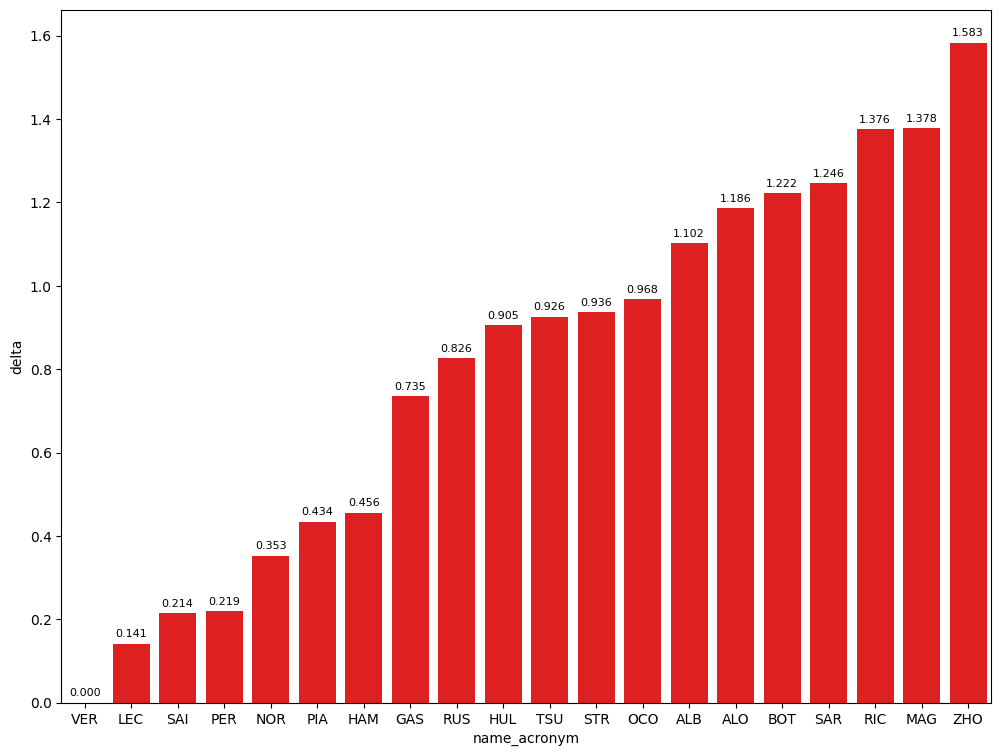

In [614]:
obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

#### Speed trap pace per driver

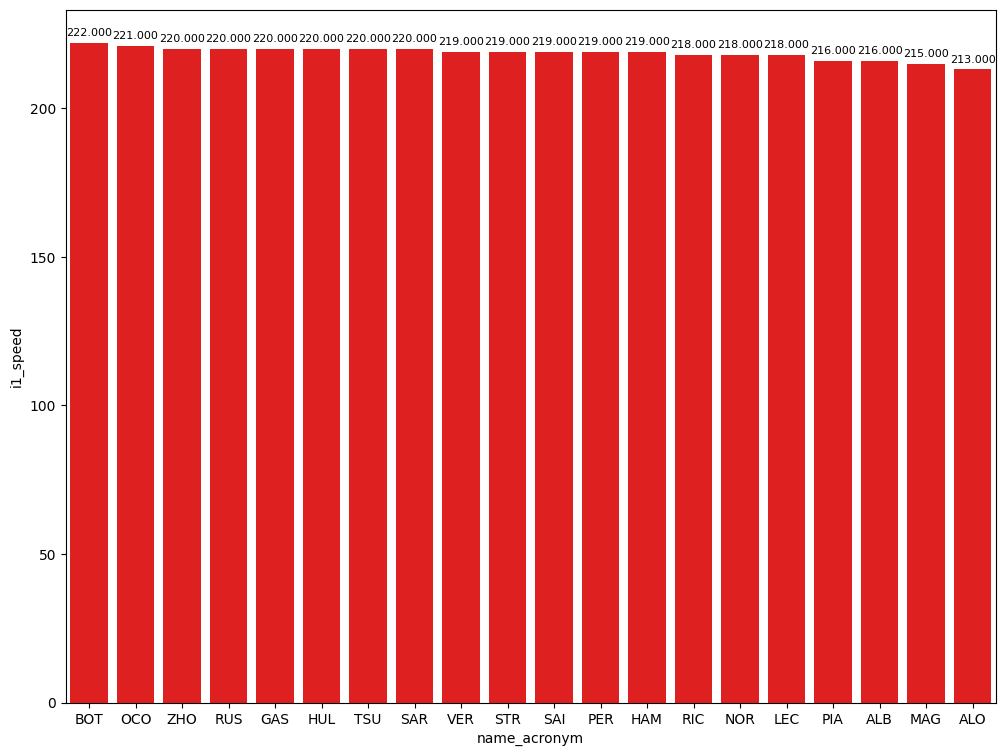

In [615]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("name_acronym","i1_speed",top_speed)

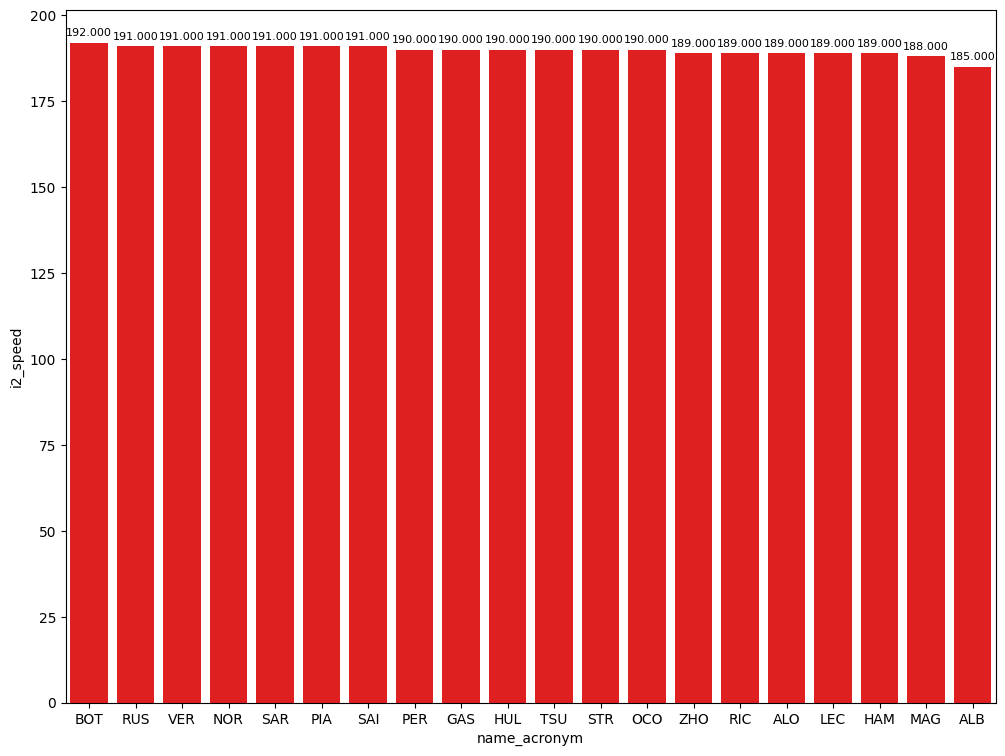

In [616]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("name_acronym","i2_speed",top_speed)

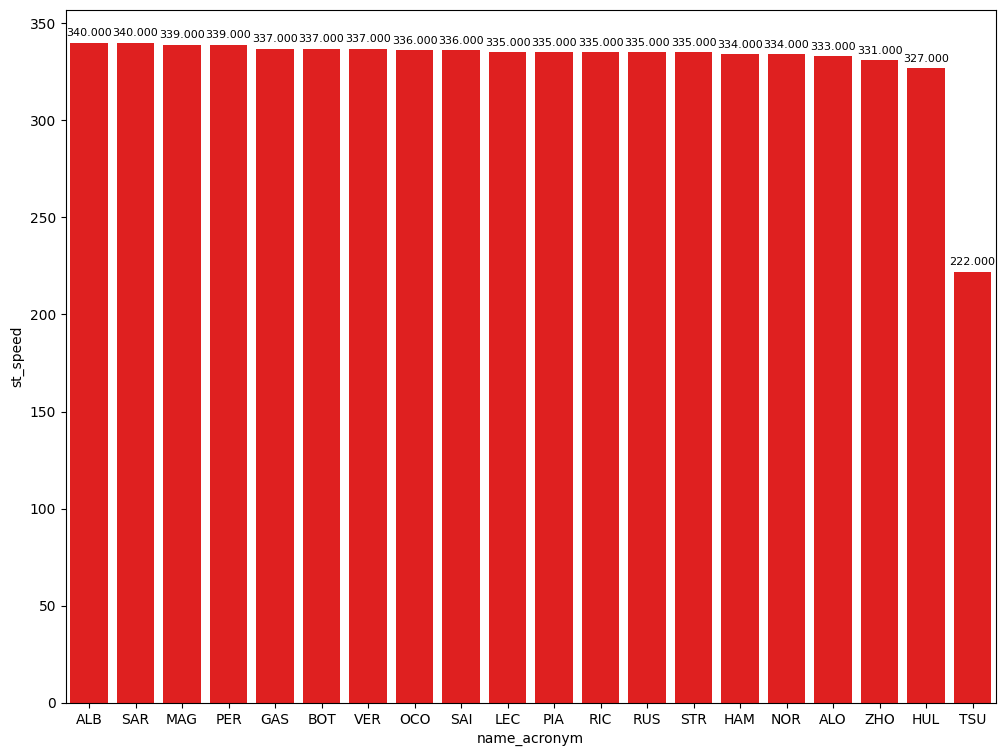

In [617]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("name_acronym","st_speed",top_speed)

### Speed trap pace per team

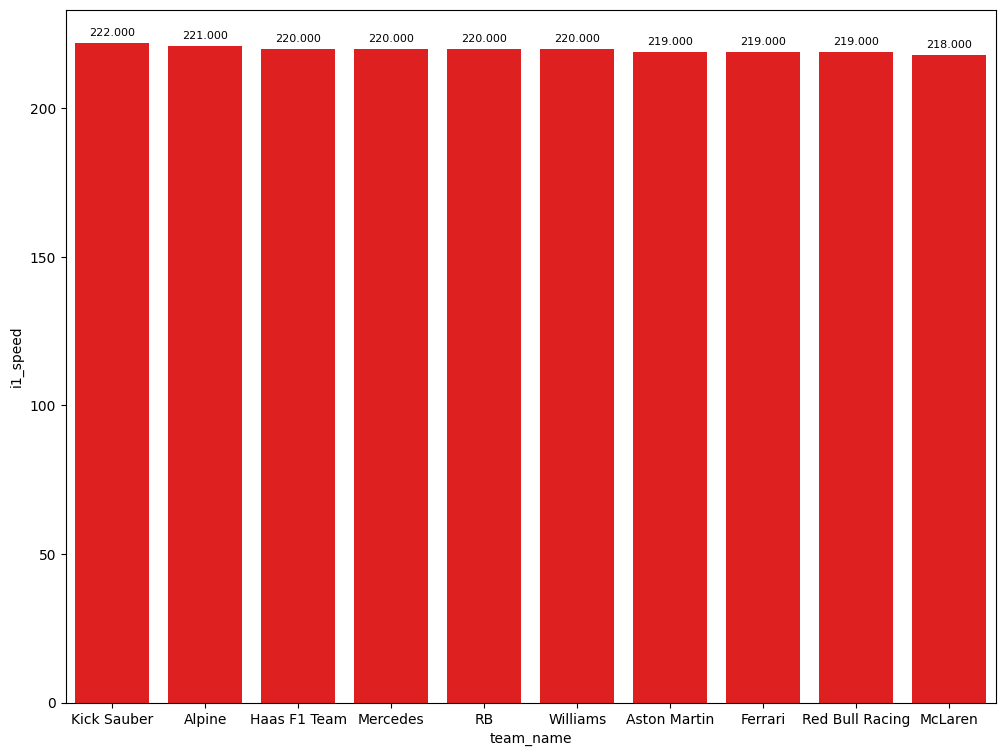

In [618]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("team_name","i1_speed",top_speed)

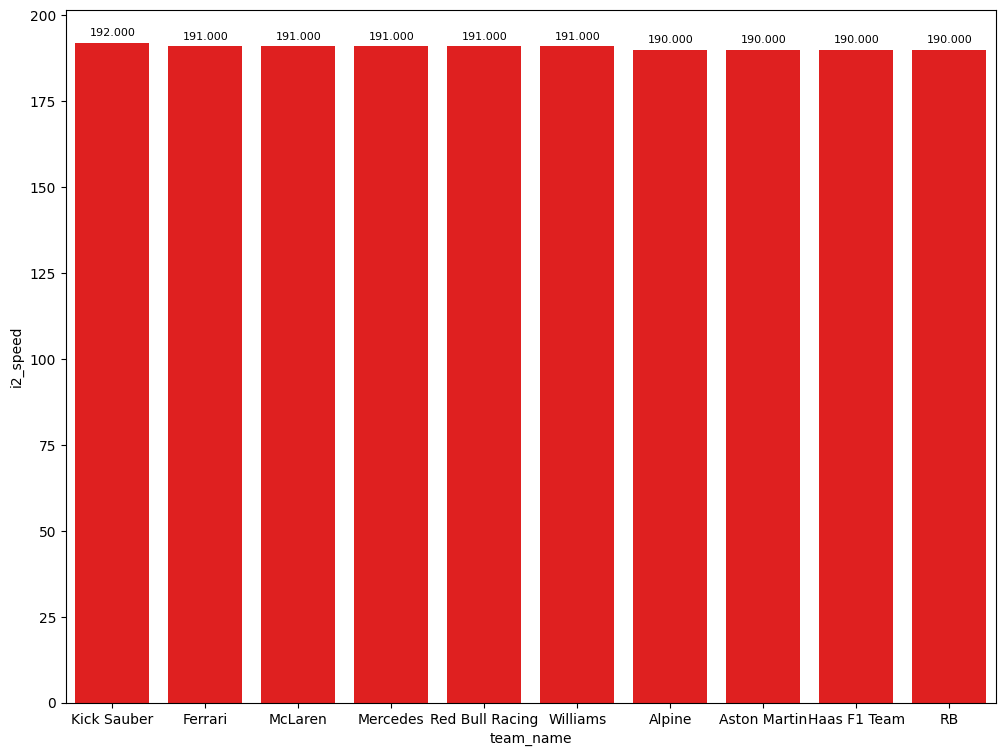

In [619]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("team_name","i2_speed",top_speed)

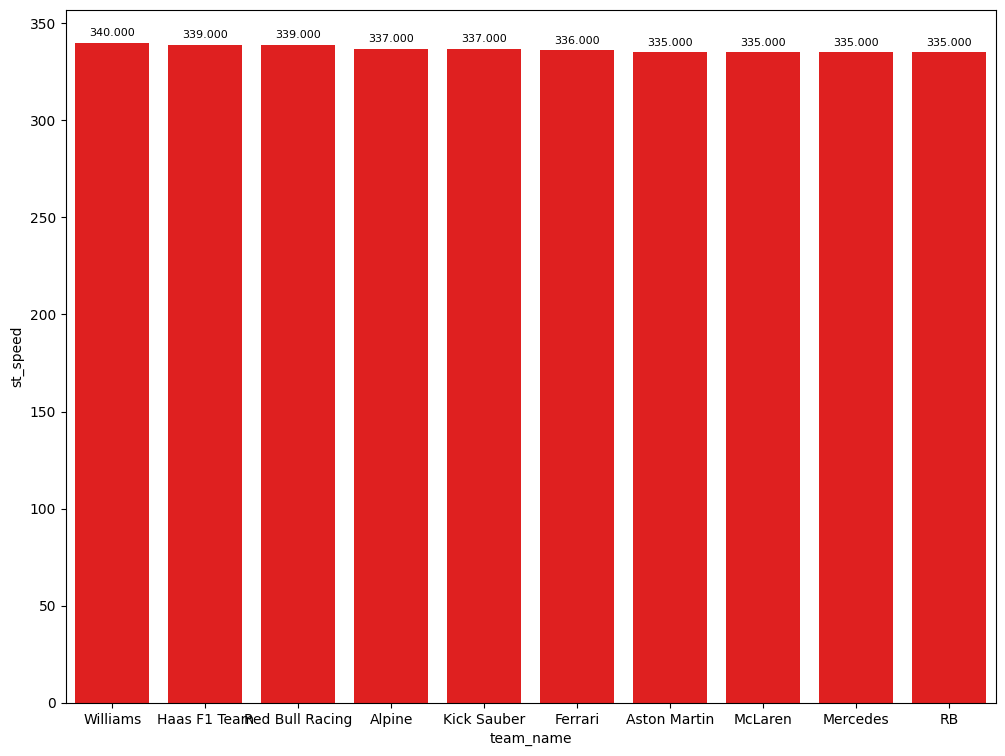

In [620]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("team_name","st_speed",top_speed)

In [621]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  \
0             1234           9498             20       221       188   
1             1234           9498             20       221       191   
2             1234           9498             20       215       191   
3             1234           9498             27       221       190   
4             1234           9498             27       221       191   
..             ...            ...            ...       ...       ...   
98            1234           9498              1       223       192   
99            1234           9498             77       223       192   
100           1234           9498             77       222       193   
101           1234           9498              2       220       191   
102           1234           9498              2       220       191   

     st_speed                        date_start  lap_duration  is_pit_out_lap  \
0         340  2024-05-04T20:02:00.544000+00:00        89.015           False   
1         339  2024-05-04T20:08:37.273000+00:00        88.729           False   
2         342  2024-05-04T20:16:26.991000+00:00        88.619           False   
3         341  2024-05-04T20:02:08.023000+00:00        88.945           False   
4         341  2024-05-04T20:08:07.102000+00:00        88.383           False   
..        ...                               ...           ...             ...   
98        337  2024-05-04T20:59:08.178000+00:00        87.430           False   
99        337  2024-05-04T20:07:44.251000+00:00        88.537           False   
100       345  2024-05-04T20:17:59.185000+00:00        88.463           False   
101       344  2024-05-04T20:08:20.215000+00:00        88.619           False   
102       340  2024-05-04T20:16:41.464000+00:00        88.487           False   

     duration_sector_1  ...  meeting_key_y  broadcast_name country_code  \
0               29.693  ...           1234     K MAGNUSSEN          DEN   
1               29.878  ...           1234     K MAGNUSSEN          DEN   
2               29.510  ...           1234     K MAGNUSSEN          DEN   
3               29.851  ...           1234    N HULKENBERG          GER   
4               29.581  ...           1234    N HULKENBERG          GER   
..                 ...  ...            ...             ...          ...   
98              28.783  ...           1234    M VERSTAPPEN          NED   
99              29.512  ...           1234        V BOTTAS          FIN   
100             29.470  ...           1234        V BOTTAS          FIN   
101             29.841  ...           1234      L SARGEANT          USA   
102             29.724  ...           1234      L SARGEANT          USA   

    first_name        full_name  \
0        Kevin  Kevin MAGNUSSEN   
1        Kevin  Kevin MAGNUSSEN   
2        Kevin  Kevin MAGNUSSEN   
3         Nico  Nico HULKENBERG   
4         Nico  Nico HULKENBERG   
..         ...              ...   
98         Max   Max VERSTAPPEN   
99    Valtteri  Valtteri BOTTAS   
100   Valtteri  Valtteri BOTTAS   
101      Logan   Logan SARGEANT   
102      Logan   Logan SARGEANT   

                                          headshot_url   last_name  \
0    https://media.formula1.com/d_driver_fallback_i...   Magnussen   
1    https://media.formula1.com/d_driver_fallback_i...   Magnussen   
2    https://media.formula1.com/d_driver_fallback_i...   Magnussen   
3    https://media.formula1.com/d_driver_fallback_i...  Hulkenberg   
4    https://media.formula1.com/d_driver_fallback_i...  Hulkenberg   
..                                                 ...         ...   
98   https://media.formula1.com/d_driver_fallback_i...  Verstappen   
99   https://media.formula1.com/d_driver_fallback_i...      Bottas   
100  https://media.formula1.com/d_driver_fallback_i...      Bottas   
101  https://media.formula1.com/d_driver_fallback_i...    Sargeant   
102  https://media.formula1.com/d_driver_fallback_i...    Sargeant   

    

In [622]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-05-04T20:25:01+00:00'"
maximumDateQ2 = "date_start <'2024-05-04T20:48:00+00:00' and date_start >'2024-05-04T20:25:01+00:00'"
maximumDateQ3 = "date_start >'2024-05-04T20:48:00+00:00'"

### Qualyfing 1

In [623]:
q1Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  \
94            1234           9498              1       219       191   
81            1234           9498             11       221       191   
70            1234           9498              4       222       192   
50            1234           9498             55       222       192   
17            1234           9498             10       222       190   
76            1234           9498             81       216       192   
63            1234           9498             16       218       189   
36            1234           9498             63       221       192   
21            1234           9498             44       219       191   
58            1234           9498             18       222       192   
12            1234           9498             31       222       192   
88            1234           9498             22       222       191   
29            1234           9498             23       221       190   
4             1234           9498             27       221       191   
45            1234           9498             14       217       191   
100           1234           9498             77       222       193   
102           1234           9498              2       220       191   
41            1234           9498              3       221       189   
2             1234           9498             20       215       191   
32            1234           9498             24       221       191   

     st_speed                        date_start  lap_duration  is_pit_out_lap  \
94        342  2024-05-04T20:16:19.564000+00:00        87.689           False   
81        341  2024-05-04T20:11:38.994000+00:00        87.772           False   
70        338  2024-05-04T20:16:07.109000+00:00        87.913           False   
50        339  2024-05-04T20:10:03.304000+00:00        87.937           False   
17        341  2024-05-04T20:17:52.624000+00:00        87.976           False   
76        336  2024-05-04T20:10:29.504000+00:00        88.032           False   
63        335  2024-05-04T20:16:00.409000+00:00        88.081           False   
36        336  2024-05-04T20:17:39.157000+00:00        88.159           False   
21        336  2024-05-04T20:09:23.923000+00:00        88.167           False   
58        343  2024-05-04T20:17:54.536000+00:00        88.177           False   
12        338  2024-05-04T20:16:55.781000+00:00        88.209           False   
88        334  2024-05-04T20:17:09.243000+00:00        88.324           False   
29        340  2024-05-04T20:16:48.211000+00:00        88.343           False   
4         341  2024-05-04T20:08:07.102000+00:00        88.383           False   
45        336  2024-05-04T20:09:04.764000+00:00        88.453           False   
100       345  2024-05-04T20:17:59.185000+00:00        88.463           False   
102       340  2024-05-04T20:16:41.464000+00:00        88.487           False   
41        336  2024-05-04T20:03:02.417000+00:00        88.617           False   
2         342  2024-05-04T20:16:26.991000+00:00        88.619           False   
32        331  2024-05-04T20:09:55.090000+00:00        88.824           False   

     duration_sector_1  ...  broadcast_name  country_code first_name  \
94              29.123  ...    M VERSTAPPEN           NED        Max   
81              29.314  ...         S PEREZ           MEX     Sergio   
70              29.259  ...        L NORRIS           GBR      Lando   
50              29.377  ...         C SAINZ           ESP     Carlos   
17              29.334  ...         P GASLY           FRA     Pierre   
76              29.275  ...       O PIASTRI           AUS      Oscar   
63              29.202  ...       C LECLERC           MON    Charles   
36              29.401  ...       G RUSSELL           GBR     George   
21              29.231  ...      L HAMILTON           GBR      Lewis   
58              29.445  ...        L STROLL           CAN      Lance  

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [624]:
#Reference
P15 = q1Data[14:15]
P15

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
45           1234           9498             14       217       191       336   

                          date_start  lap_duration  is_pit_out_lap  \
45  2024-05-04T20:09:04.764000+00:00        88.453           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
45             29.475  ...        F ALONSO           ESP   Fernando   

          full_name                                       headshot_url  \
45  Fernando ALONSO  https://media.formula1.com/d_driver_fallback_i...   

    last_name  team_colour     team_name name_acronym isFastestLap  
45     Alonso       229971  Aston Martin          ALO         True  

[1 rows x 28 columns]

In [625]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Fernando ALONSO Sector 1:  29.475 Sector 2:  33.86 Sector 3:  25.118


In [626]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             77         0.010               -0.005                0.028   
1              2         0.034                0.249               -0.124   
2              3         0.164                0.066               -0.078   
3             20         0.166                0.035               -0.080   
4             24         0.371                0.149                0.043   

   difference_sector_3 name_acronym  
0               -0.013          BOT  
1               -0.091          SAR  
2                0.176          RIC  
3                0.211          MAG  
4                0.179          ZHO

In [627]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
VER                      29.123
LEC                      29.202
HAM                      29.231
NOR                      29.259
PIA                      29.275
OCO                      29.306
PER                      29.314
GAS                      29.334
SAI                      29.377
RUS                      29.401
STR                      29.445
BOT                      29.470
ALO                      29.475
ALB                      29.498
MAG                      29.510
TSU                      29.512
RIC                      29.541
HUL                      29.581
ZHO                      29.624
SAR                      29.724

In [628]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
PER                      33.440
VER                      33.467
SAI                      33.571
NOR                      33.585
GAS                      33.605
TSU                      33.689
RUS                      33.705
SAR                      33.736
HUL                      33.748
OCO                      33.769
ALB                      33.774
PIA                      33.776
MAG                      33.780
RIC                      33.782
STR                      33.783
LEC                      33.796
ALO                      33.860
HAM                      33.887
BOT                      33.888
ZHO                      33.903

In [629]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
STR                      24.949
PIA                      24.981
SAI                      24.989
PER                      25.018
SAR                      25.027
GAS                      25.037
HAM                      25.049
RUS                      25.053
HUL                      25.054
NOR                      25.069
ALB                      25.071
LEC                      25.083
VER                      25.099
BOT                      25.105
ALO                      25.118
TSU                      25.123
OCO                      25.134
RIC                      25.294
ZHO                      25.297
MAG                      25.329

#### Qualyfing 2

In [630]:
q2Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
64           1234           9498             16       221       191       337   
96           1234           9498              1       220       191       338   
24           1234           9498             44       222       191       337   
77           1234           9498             81       219       191       336   
83           1234           9498             11       222       191       341   
71           1234           9498              4       218       191       338   
52           1234           9498             55       221       191       337   
38           1234           9498             63       222       191       337   
90           1234           9498             22       223       191       336   
6            1234           9498             27       223       191       342   
60           1234           9498             18       222       190       338   
18           1234           9498             10       220       191       338   
13           1234           9498             31       221       191       337   
30           1234           9498             23       220       190       340   
48           1234           9498             14       221       189       337   

                          date_start  lap_duration  is_pit_out_lap  \
64  2024-05-04T20:30:18.968000+00:00        87.533           False   
96  2024-05-04T20:39:12.306000+00:00        87.566           False   
24  2024-05-04T20:38:45.125000+00:00        87.697           False   
77  2024-05-04T20:29:55.523000+00:00        87.721           False   
83  2024-05-04T20:38:19.493000+00:00        87.839           False   
71  2024-05-04T20:29:47.412000+00:00        87.871           False   
52  2024-05-04T20:30:28.003000+00:00        87.941           False   
38  2024-05-04T20:38:59.066000+00:00        88.095           False   
90  2024-05-04T20:37:54.308000+00:00        88.167           False   
6   2024-05-04T20:31:09.985000+00:00        88.200           False   
60  2024-05-04T20:38:29.532000+00:00        88.222           False   
18  2024-05-04T20:31:00.442000+00:00        88.324           False   
13  2024-05-04T20:30:52.527000+00:00        88.371           False   
30  2024-05-04T20:39:50.471000+00:00        88.413           False   
48  2024-05-04T20:38:12.920000+00:00        88.427           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
64             29.020  ...       C LECLERC           MON    Charles   
96             28.906  ...    M VERSTAPPEN           NED        Max   
24             29.020  ...      L HAMILTON           GBR      Lewis   
77             29.144  ...       O PIASTRI           AUS      Oscar   
83             29.280  ...         S PEREZ           MEX     Sergio   
71             29.225  ...        L NORRIS           GBR      Lando   
52             29.223  ...         C SAINZ           ESP     Carlos   
38             29.296  ...       G RUSSELL           GBR     George   
90             29.299  ...       Y TSUNODA           JPN       Yuki   
6              29.281  ...    N HULKENBERG           GER       Nico   
60             29.271  ...        L STROLL           CAN      Lance   
18             29.434  ...         P GASLY           FRA     Pierre   
13             29.280  ...          E OCON           FRA    Esteban   
30             29.511  ...         A ALBON           THA  Alexander   
48             29.467  ...        F ALONSO           ESP   Fernando   

          full_name                                       headshot_url  \
64  Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
96   Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
24   Lewis HAMILTON  https://media.formula1.com/d_driver_fallback_i...   
77    Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
83     Sergio PEREZ  https://media.formula1.com/d_driver_fallback_i...   
71   

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [631]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Nico HULKENBERG Sector 1:  29.281 Sector 2:  33.891 Sector 3:  25.028


In [632]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             18         0.022               -0.010                0.068   
1             10         0.124                0.153               -0.023   
2             31         0.171               -0.001                0.057   
3             23         0.213                0.230               -0.056   
4             14         0.227                0.186               -0.059   

   difference_sector_3 name_acronym  
0               -0.036          STR  
1               -0.006          GAS  
2                0.115          OCO  
3                0.039          ALB  
4                0.100          ALO

#### Best sector per driver

In [633]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
VER                      28.906
HAM                      29.020
LEC                      29.020
PIA                      29.144
SAI                      29.223
NOR                      29.225
STR                      29.271
OCO                      29.280
PER                      29.280
HUL                      29.281
RUS                      29.296
TSU                      29.299
GAS                      29.434
ALO                      29.467
ALB                      29.511

In [634]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
LEC                      33.524
PIA                      33.530
VER                      33.608
HAM                      33.635
PER                      33.645
RUS                      33.678
NOR                      33.693
SAI                      33.757
TSU                      33.775
ALO                      33.832
ALB                      33.835
GAS                      33.868
HUL                      33.891
OCO                      33.948
STR                      33.959

In [635]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
PER                      24.914
NOR                      24.953
SAI                      24.961
LEC                      24.989
STR                      24.992
GAS                      25.022
HUL                      25.028
HAM                      25.042
PIA                      25.047
VER                      25.052
ALB                      25.067
TSU                      25.093
RUS                      25.121
ALO                      25.128
OCO                      25.143

#### Qualyfing 3

In [636]:
q3Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

meeting_key_x  session_key_x  driver_number  i1_speed  i2_speed  st_speed  \
97           1234           9498              1       223       192       337   
66           1234           9498             16       222       192       337   
54           1234           9498             55       223       193       338   
85           1234           9498             11       220       192       339   
74           1234           9498              4       223       193       336   
78           1234           9498             81       222       191       335   
39           1234           9498             63       224       191       335   
26           1234           9498             44       222       191       334   
9            1234           9498             27       221       193       340   
92           1234           9498             22       222       191       336   

                          date_start  lap_duration  is_pit_out_lap  \
97  2024-05-04T20:50:55.643000+00:00        87.241           False   
66  2024-05-04T20:51:11.151000+00:00        87.382           False   
54  2024-05-04T20:51:16.905000+00:00        87.455           False   
85  2024-05-04T20:58:47.936000+00:00        87.460           False   
74  2024-05-04T20:59:19.034000+00:00        87.594           False   
78  2024-05-04T20:51:29.963000+00:00        87.675           False   
39  2024-05-04T20:50:31.006000+00:00        88.067           False   
26  2024-05-04T20:59:49.407000+00:00        88.107           False   
9   2024-05-04T20:58:10.124000+00:00        88.146           False   
92  2024-05-04T20:58:26.064000+00:00        88.192           False   

    duration_sector_1  ...  broadcast_name  country_code first_name  \
97             28.867  ...    M VERSTAPPEN           NED        Max   
66             28.793  ...       C LECLERC           MON    Charles   
54             28.874  ...         C SAINZ           ESP     Carlos   
85             28.850  ...         S PEREZ           MEX     Sergio   
74             28.928  ...        L NORRIS           GBR      Lando   
78             28.963  ...       O PIASTRI           AUS      Oscar   
39             29.125  ...       G RUSSELL           GBR     George   
26             29.121  ...      L HAMILTON           GBR      Lewis   
9              29.410  ...    N HULKENBERG           GER       Nico   
92             29.270  ...       Y TSUNODA           JPN       Yuki   

          full_name                                       headshot_url  \
97   Max VERSTAPPEN  https://media.formula1.com/d_driver_fallback_i...   
66  Charles LECLERC  https://media.formula1.com/d_driver_fallback_i...   
54     Carlos SAINZ  https://media.formula1.com/d_driver_fallback_i...   
85     Sergio PEREZ  https://media.formula1.com/d_driver_fallback_i...   
74     Lando NORRIS  https://media.formula1.com/d_driver_fallback_i...   
78    Oscar PIASTRI  https://media.formula1.com/d_driver_fallback_i...   
39   George RUSSELL  https://media.formula1.com/d_driver_fallback_i...   
26   Lewis HAMILTON  https://media.formula1.com/d_driver_fallback_i...   
9   Nico HULKENBERG  https://media.formula1.com/d_driver_fallback_i...   
92     Yuki TSUNODA  https://media.formula1.com/d_driver_fallback_i...   

     last_name  team_colour        team_name name_acronym isFastestLap  
97  Verstappen       3671C6  Red Bull Racing          VER         True  
66     Leclerc       E80020          Ferrari          LEC         True  
54       Sainz       E80020          Ferrari          SAI         True  
85       Perez       3671C6  Red Bull Racing          PER         True  
74      Norris       FF8000          McLaren          NOR         True  
78     Piastri       FF8000          McLaren          PIA         True  
39     Russell       27F4D2         Mercedes          RUS         True  
26    Hamilton       27F4D2         Mercedes          HAM         True  
9   Hulkenberg       B6BABD     Haas F1 Team          HUL         True  
92     Tsunoda

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [637]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Max VERSTAPPEN Sector 1:  28.867 Sector 2:  33.499 Sector 3:  24.875


In [638]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             16         0.141               -0.074                0.141   
1             55         0.214                0.007                0.146   
2             11         0.219               -0.017                0.231   
3              4         0.353                0.061                0.217   
4             81         0.434                0.096                0.201   
5             63         0.826                0.258                0.358   
6             44         0.866                0.254                0.394   
7             27         0.905                0.543                0.335   
8             22         0.951                0.403                0.351   

   difference_sector_3 name_acronym  
0                0.074          LEC  
1                0.061          SAI  
2                0.005          PER  
3                0.075          NOR  
4                0.137          PIA  
5                0.210          RUS  
6                0.218          HAM  
7                0.027          HUL  
8                0.197          TSU

#### Best sector per driver

In [639]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
LEC                      28.793
PER                      28.850
VER                      28.867
SAI                      28.874
NOR                      28.928
PIA                      28.963
HAM                      29.121
RUS                      29.125
TSU                      29.270
HUL                      29.410

In [640]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
VER                      33.499
LEC                      33.640
SAI                      33.645
PIA                      33.700
NOR                      33.716
PER                      33.730
HUL                      33.834
TSU                      33.850
RUS                      33.857
HAM                      33.893

In [641]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
VER                      24.875
PER                      24.880
HUL                      24.902
SAI                      24.936
LEC                      24.949
NOR                      24.950
PIA                      25.012
TSU                      25.072
RUS                      25.085
HAM                      25.093

### Best lap of the session

In [642]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

duration_sector_1
name_acronym                   
VER                      28.783
LEC                      28.793
PER                      28.850
SAI                      28.874
NOR                      28.928
PIA                      28.930
HAM                      29.020
RUS                      29.125
TSU                      29.270
STR                      29.271
OCO                      29.280
HUL                      29.281
GAS                      29.334
ALO                      29.467
BOT                      29.470
ALB                      29.498
MAG                      29.510
RIC                      29.525
ZHO                      29.624
SAR                      29.724

In [643]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

duration_sector_2
name_acronym                   
PER                      33.440
VER                      33.467
LEC                      33.524
PIA                      33.530
SAI                      33.571
NOR                      33.585
GAS                      33.605
HAM                      33.635
RUS                      33.678
TSU                      33.689
MAG                      33.725
RIC                      33.727
SAR                      33.736
HUL                      33.748
OCO                      33.769
ALB                      33.774
ALO                      33.778
STR                      33.783
BOT                      33.849
ZHO                      33.903

In [644]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

duration_sector_3
name_acronym                   
PER                      24.852
VER                      24.875
HUL                      24.902
SAI                      24.936
SAR                      24.944
STR                      24.949
LEC                      24.949
NOR                      24.950
PIA                      24.981
RUS                      25.020
GAS                      25.022
HAM                      25.022
OCO                      25.065
ALB                      25.067
TSU                      25.072
BOT                      25.105
ALO                      25.118
MAG                      25.126
ZHO                      25.196
RIC                      25.248